In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd
import matplotlib as m
from scipy.special import logsumexp
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

# TDMA Solver

In [15]:

def solver_TDMA(a,b,c,d):
    '''b---> diagonal numpy array
        a--> lower triangle
        c--> upper triangle
        d--> matrix at right'''
    n=b.shape[0]
    ac,bc,cc,dc=map(np.array,(a,b,c,d)) #creating copy of elements
    # FoRWARD elimination
    for i in range(1,n):
        m=ac[i-1]/bc[i-1]
        bc[i]=bc[i]-m*cc[i-1]
        dc[i]=dc[i]-m*dc[i-1]
    #Backward substitution
    x=np.zeros((n,))
    for i in range(n-1,-1,-1):
        if (i==(n-1)):
            x[n-1]=dc[n-1]/bc[n-1]
        else:
            x[i]=(dc[i]-cc[i]*x[i+1])/bc[i]

    return x

# Project -5 

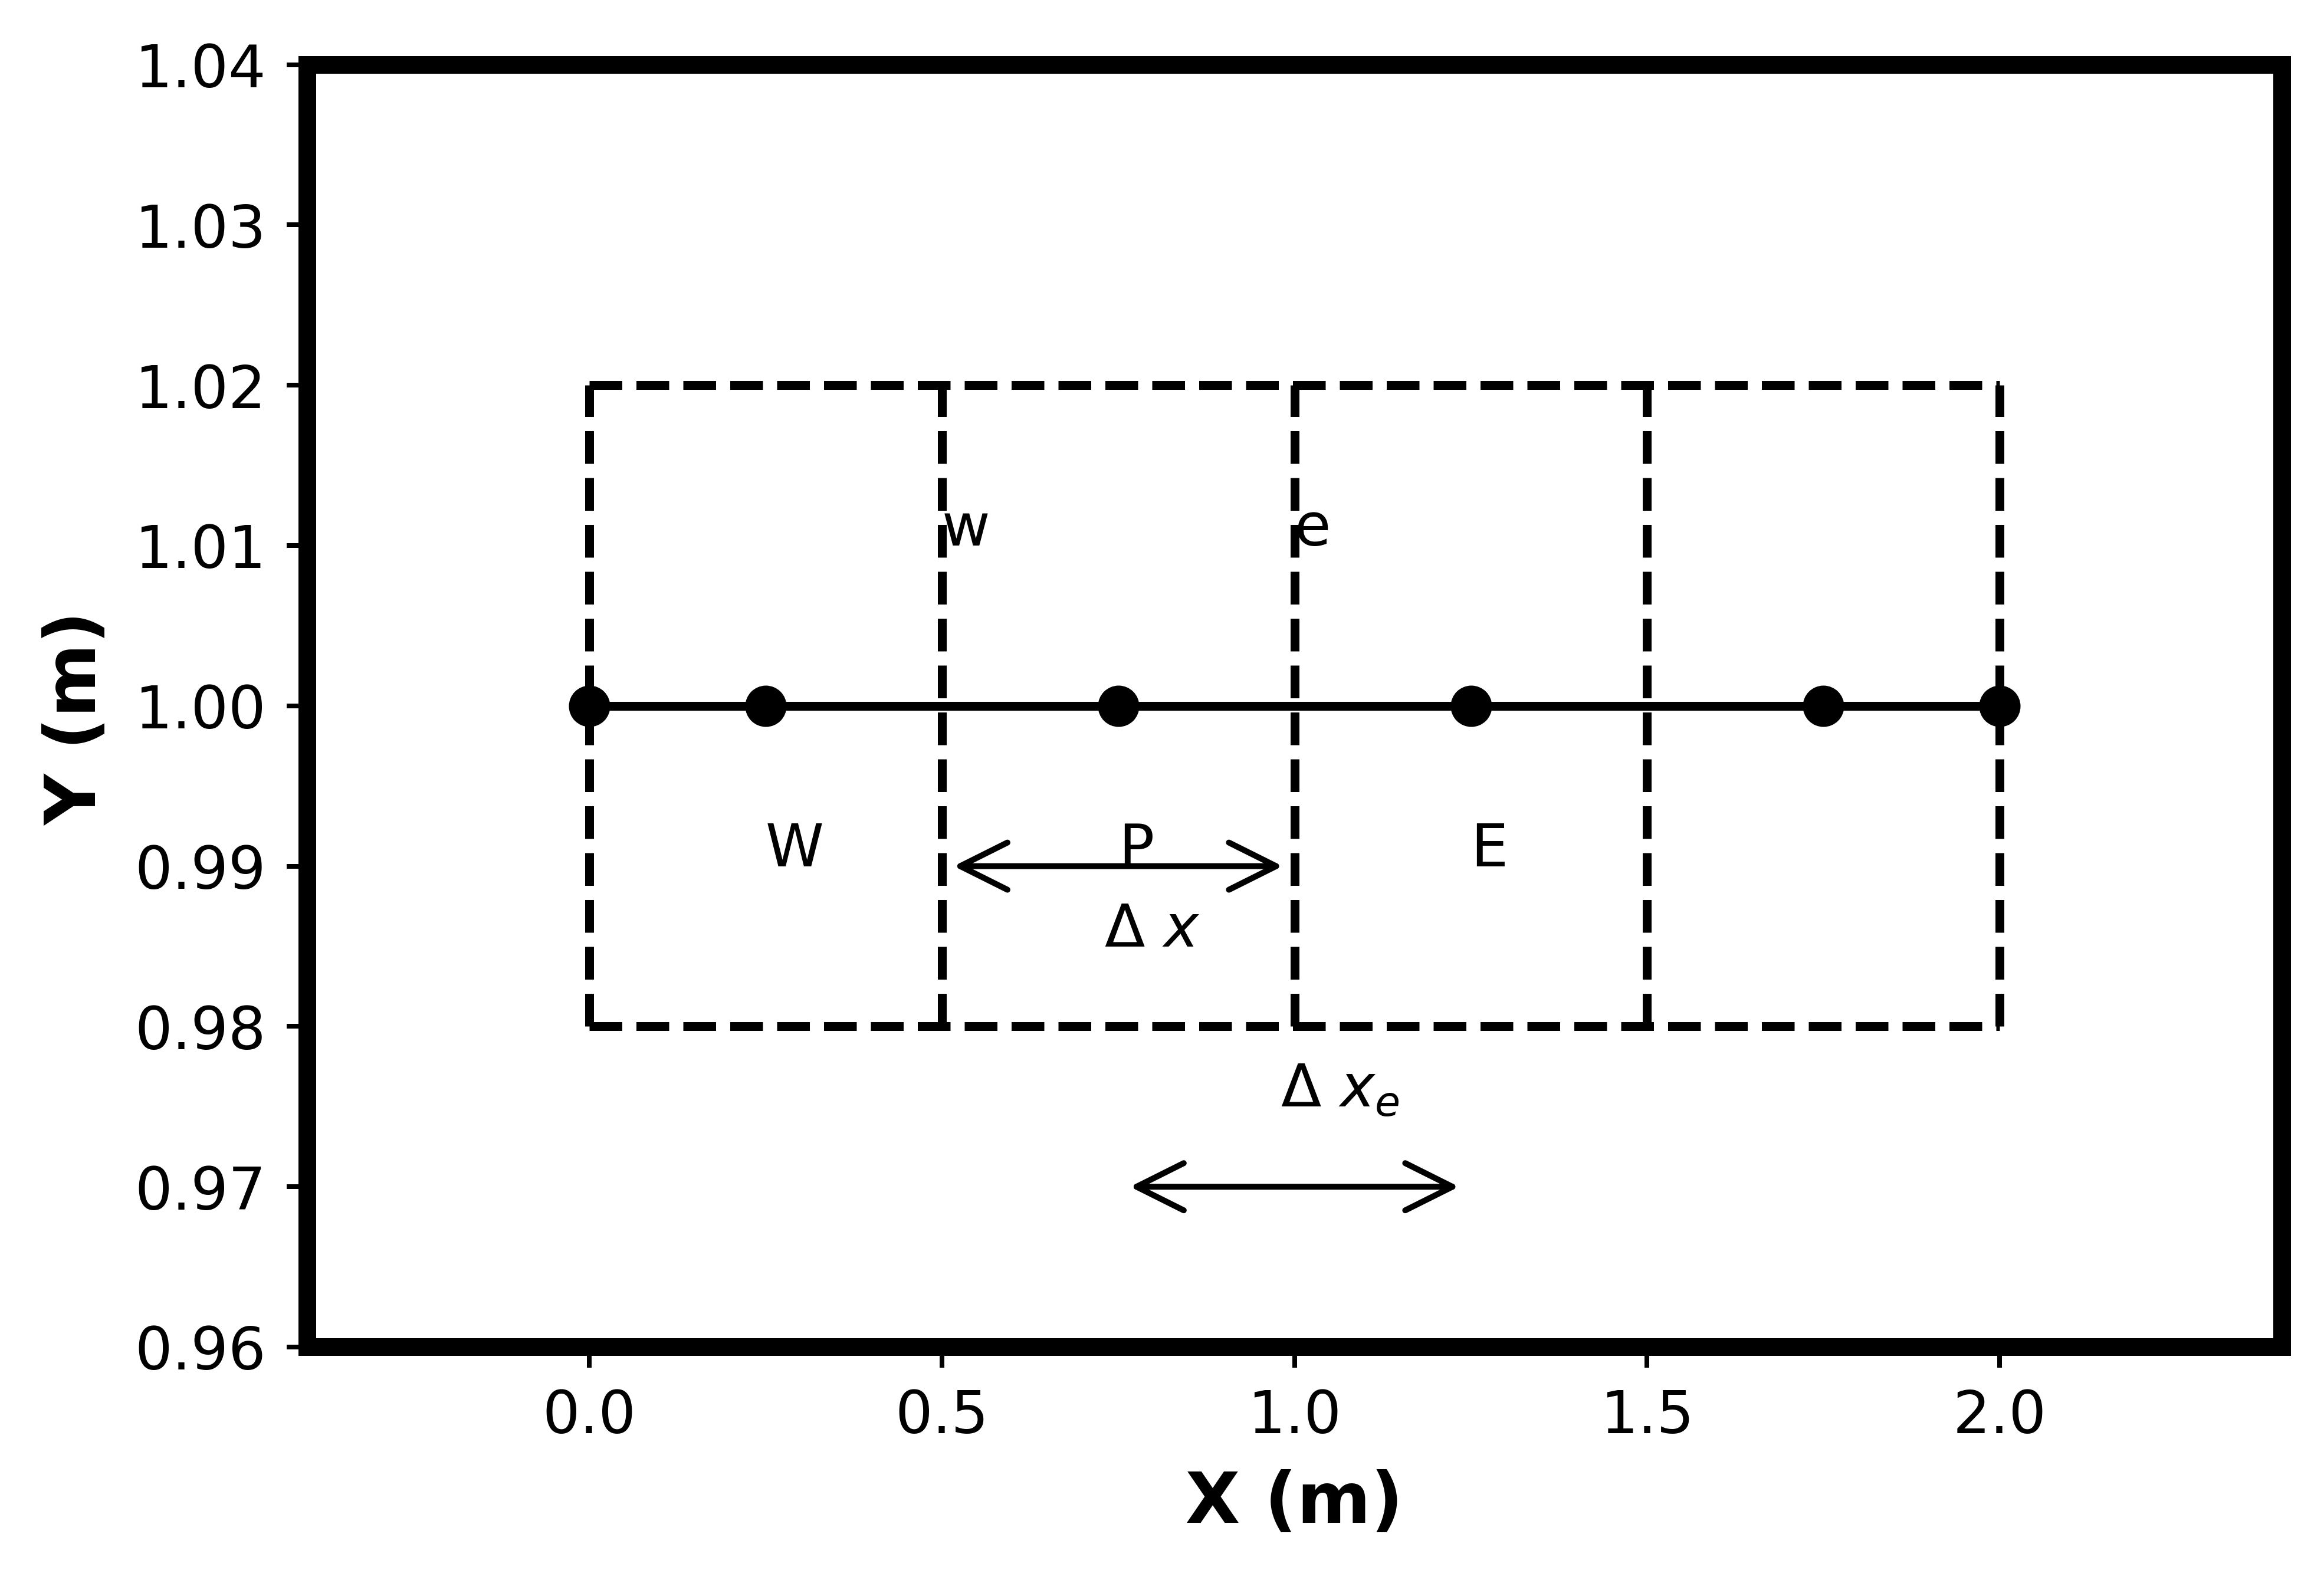

In [2]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
x,y = np.meshgrid([0,.25,.75,1.25,1.75,2],[1,1,1,1,1,1])
plt.ylim(0.96,1.04)
plt.plot([0,.25,.75,1.25,1.75,2],[1,1,1,1,1,1],marker='o',color='black')
plt.plot([0,.25,.75,1.25,1.75,2],[1.02,1.02,1.02,1.02,1.02,1.02],linestyle='--',color='black')
plt.plot([0,.25,.75,1.25,1.75,2],0.98*np.ones((6,)),linestyle='--',color='black')
plt.plot(np.zeros((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot(2*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((.25+.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((1.25+.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((1.25+1.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.xlim(-0.4,2.4)

plt.text(1.25,.99,'E')
plt.text(0.25,.99,'W')
plt.text(.75,.99,'P')
plt.text(1,1.01,'e')
plt.text(0.5,1.01,'w')
plt.text(.98,0.975,'$ \u0394 $ $x_e$')
plt.text(0.73,.985,'$ \Delta $ $x $')


arrow = arrow = patches.FancyArrowPatch((0.75, 0.97), (1.25, 0.97), arrowstyle='<->', mutation_scale=20)
plt.gca().add_patch(arrow)
arrow1 = patches.FancyArrowPatch((0.5, 0.99), (1, 0.99), arrowstyle='<->', mutation_scale=20)
plt.gca().add_patch(arrow1)

In [10]:
# material properties
k_cond=1
hPl2kA =4
# 1 grid point at CV centre
n=25 # number of grid points
dx= 1/(n-2)
xc=np.zeros((n,))
xc[0]=0
for i in range(1,n-1):
    if (i== 1):
        xc[i]=dx/2
    else:
        xc[i]=xc[i-1]+dx
xc[n-1]=xc[n-2]+dx/2

'''
no. of CV = n-2
control volume thickness = L / (n-2)
no. of faces = n-1 
aE defined for each face
aW = aE [i-1]
'''
T=np.zeros((n,))
T[0]=1 # BC fixed at left

# assigning aE and aP
aE = np.zeros((n-1,))
aP=np.zeros((n,))

for i in range(0,n-1):
    if (i == 0 or i ==(n-2)):
        aE[i]= 2/dx
    else:
        aE[i]=1/dx
aE[n-2]=0 # as at end dT/dx =0 
for i in range(1,n-1):
    aP[i]=aE[i]+aE[i-1]+hPl2kA*dx

# iterative solver
conv= 1e-6
error=1
T_old=T.copy()
while (error > conv):
    for i in range(1,n-1):
        T[i] = aE[i]*T[i+1] + aE[i-1] *T[i-1]
        T[i] = T[i]/aP[i]
    T[n-1]=T[n-2] #BC
    error= max(abs(T-T_old))
    T_old = T.copy()

T_analy = np.cosh((np.linspace(0,1,22)-1)*np.sqrt(hPl2kA))/np.cosh(np.sqrt(hPl2kA))

In [11]:
abs(2*(T[0]-T[1])/dx - 2*np.tanh(2))/(2*np.tanh(2)) *100 

0.09138118276458052

In [19]:
dx

0.043478260869565216

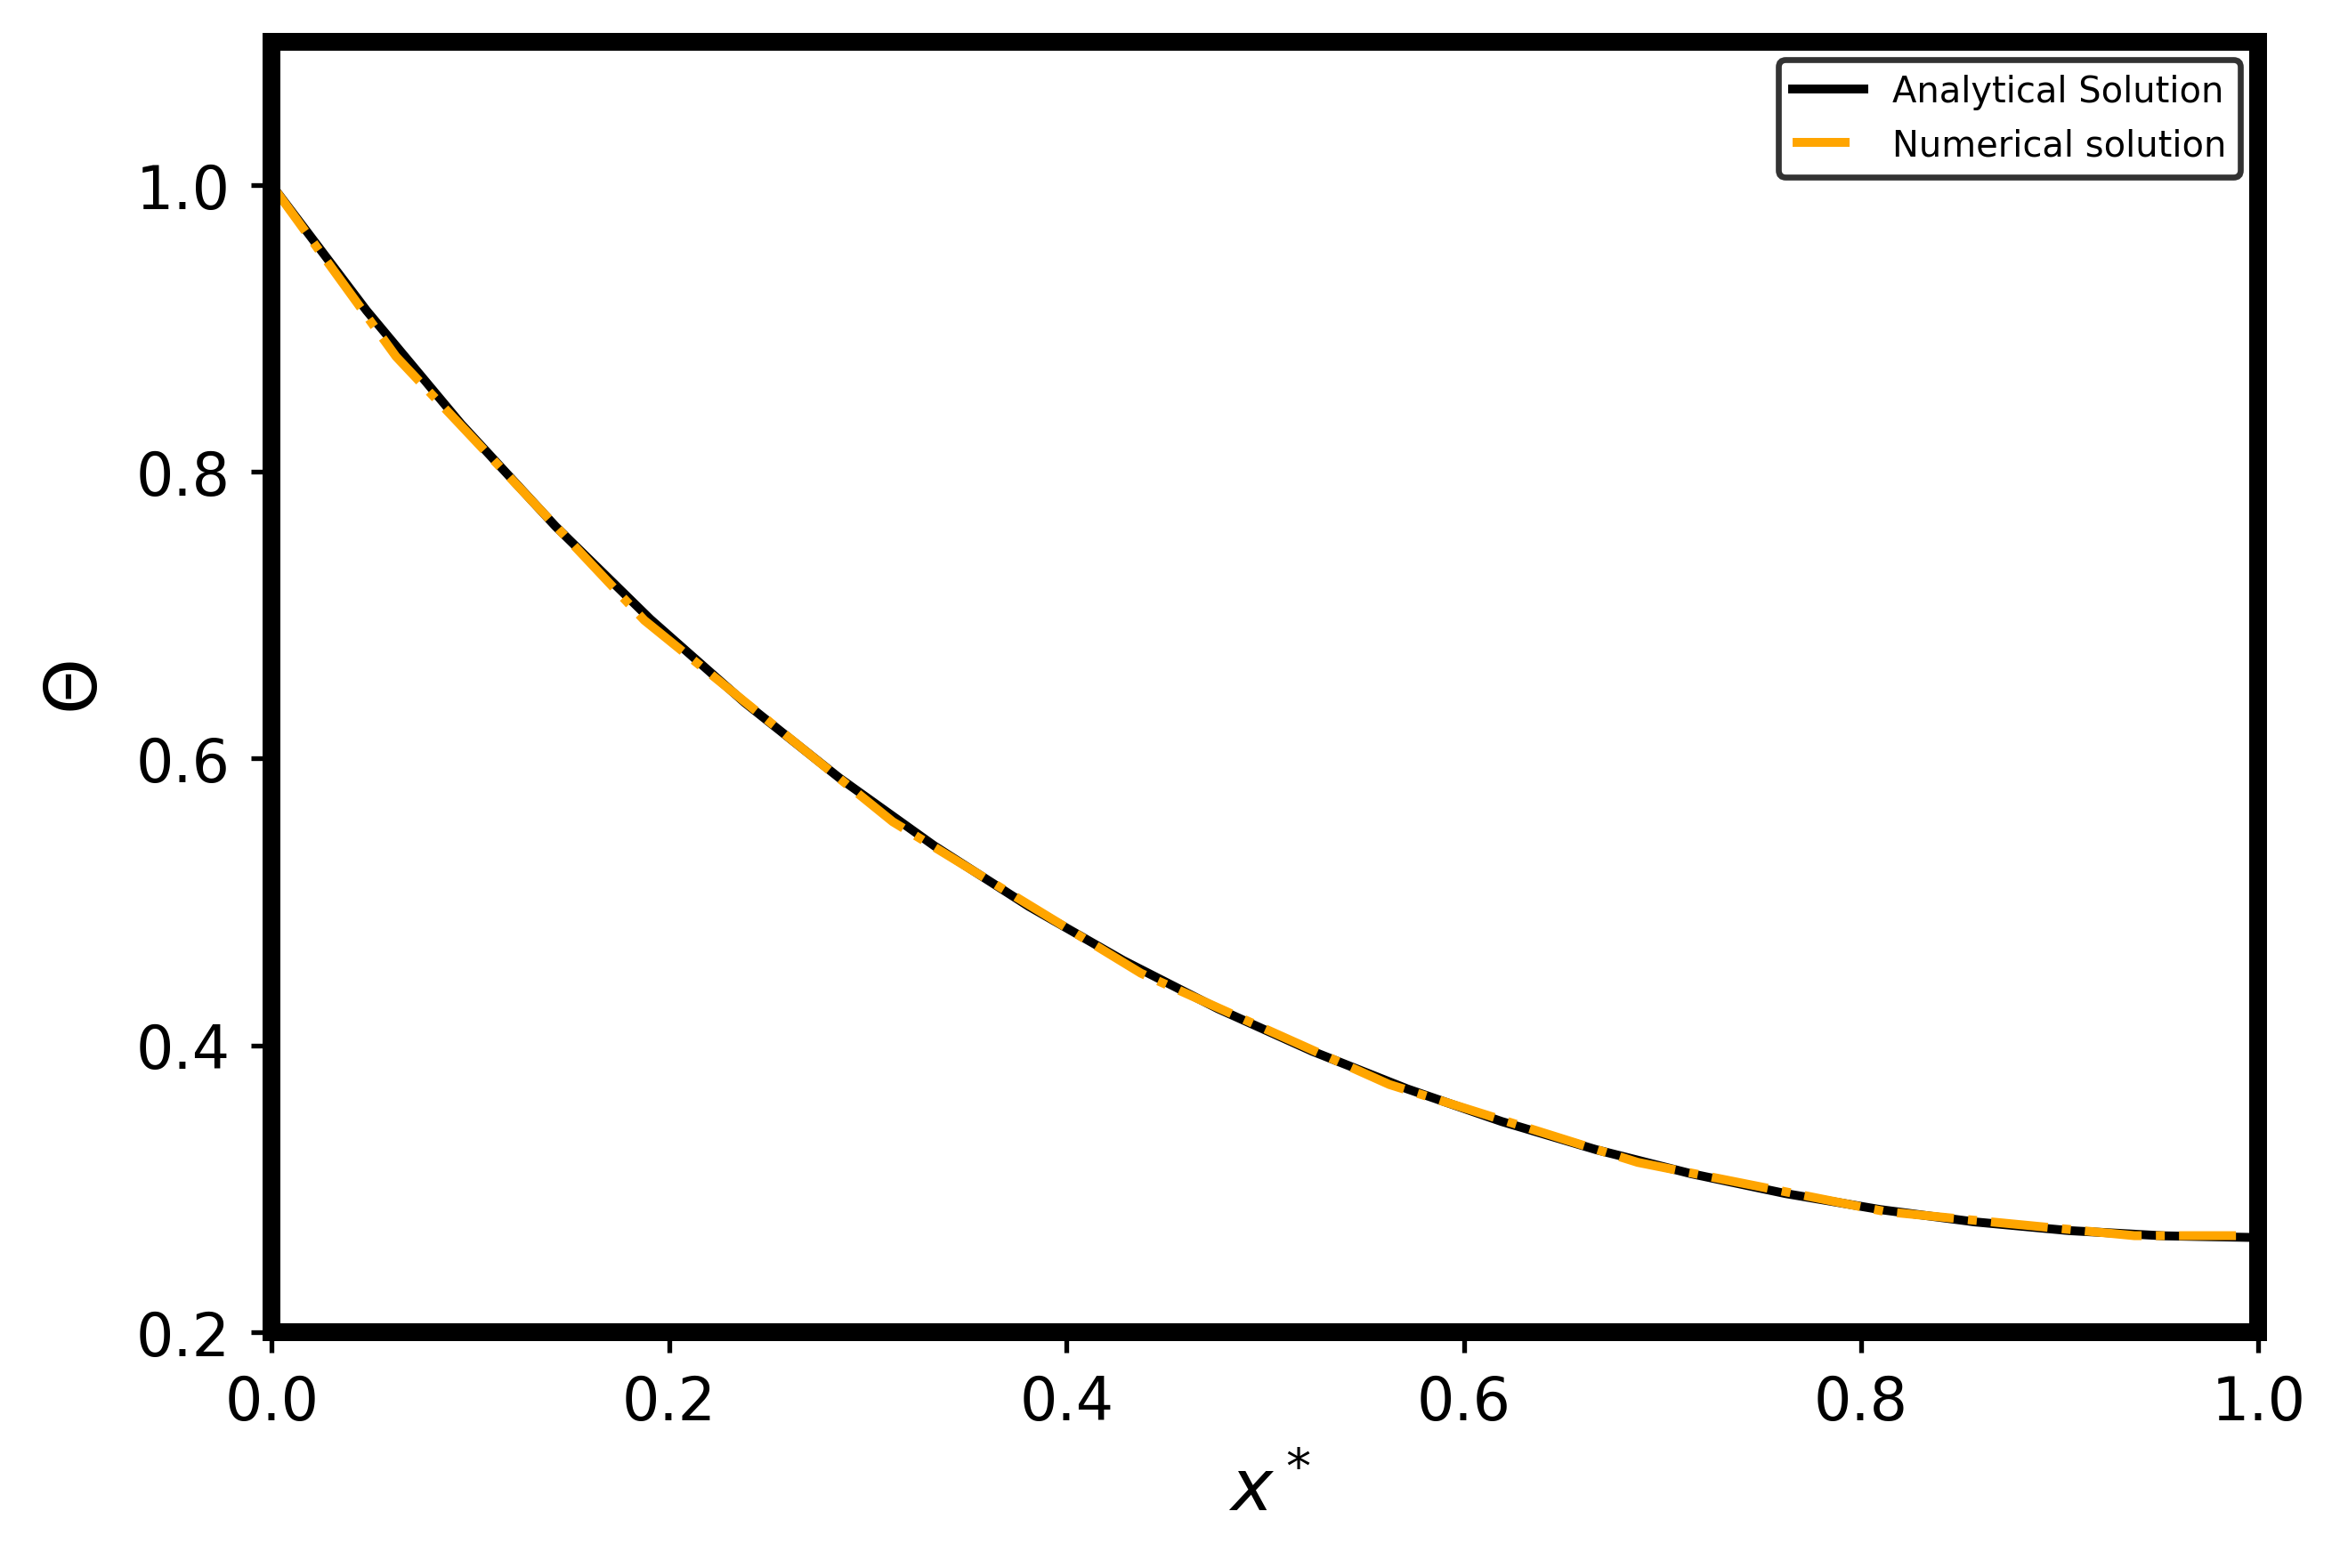

In [9]:
plt.figure(dpi=480)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' $x^*$ ',fontsize=12,fontweight='bold')
plt.ylabel('$\Theta$',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=1)
plt.ylim(bottom=0.2,top=1.1)
plt.plot(np.linspace(0,1,22),T_analy,label='Analytical Solution',color='black')
plt.plot(xc,T,label='Numerical solution',linestyle='-.',color='orange')
plt.legend(edgecolor='black',loc='upper right',fontsize=6)

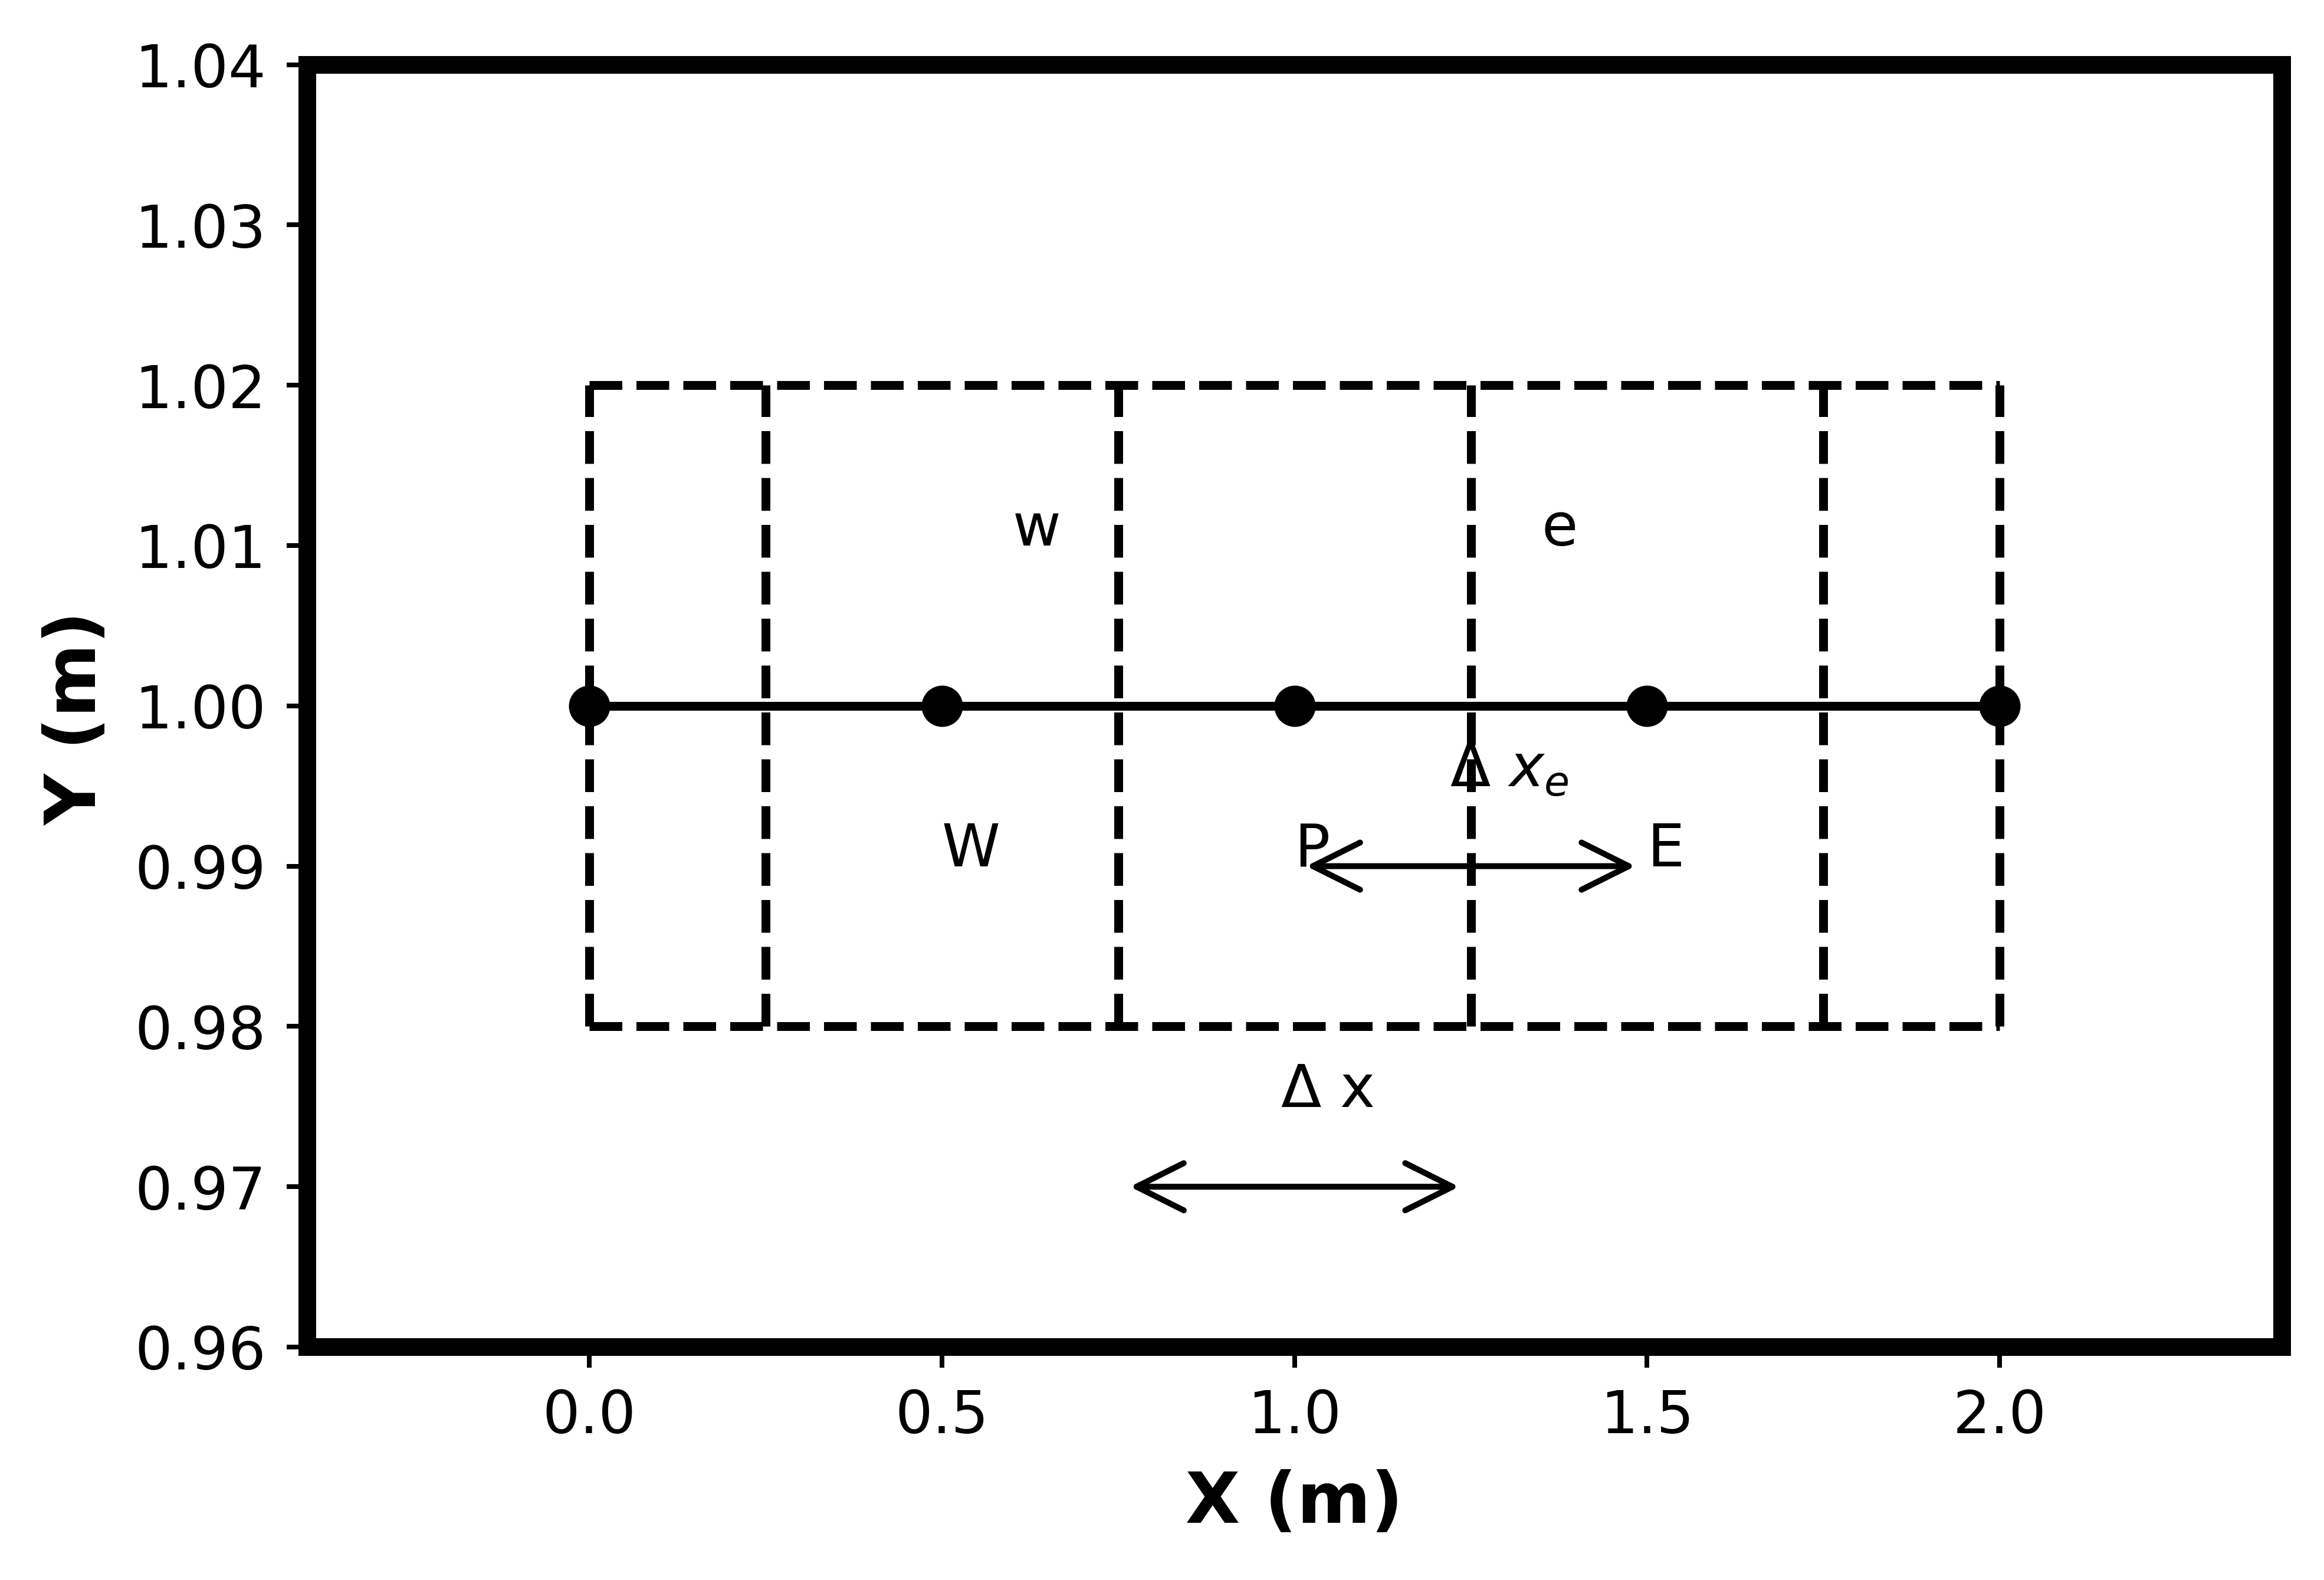

In [6]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
x,y = np.meshgrid([0,.5,1,1.5,2],[1,1,1,1,1])
plt.ylim(0.96,1.04)
plt.plot([0,.5,1,1.5,2],[1,1,1,1,1],marker='o',color='black')
plt.plot([0,.5,1,1.5,2],[1.02,1.02,1.02,1.02,1.02],linestyle='--',color='black')
plt.plot([0,.5,1,1.5,2],0.98*np.ones((5,)),linestyle='--',color='black')

plt.plot(np.zeros((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot(2*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((0+.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((1.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((2.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((3.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')

plt.xlim(-0.4,2.4)
plt.text(1.5,.99,'E')
plt.text(1,.99,'P')
plt.text(.5,.99,'W')
plt.text(1.35,1.01,'e')
plt.text(0.6,1.01,'w')
plt.text(.98,0.975,'$ \u0394 $ x')
plt.text(1.22,.995,'$ \Delta $ $x_e$')


arrow = arrow = patches.FancyArrowPatch((0.75, 0.97), (1.25, 0.97), arrowstyle='<->', mutation_scale=20)
plt.gca().add_patch(arrow)
arrow1 = patches.FancyArrowPatch((1, 0.99), (1.5, 0.99), arrowstyle='<->', mutation_scale=20)
plt.gca().add_patch(arrow1)




In [16]:
#uniform mesh
hPl2kA=4
n=24
dxe=1/(n-1) # distance between two grid points --> for uniform spacing dxe =dx 
T=np.zeros((n,))
aP=np.zeros((n,))
aE=np.zeros((n+1,))
T[0]=1 # BC
for i in range(0,n+1):
    if(i==0 or i==n):
        aE[i]=0
    else:
        aE[i]=1/dxe

for i in range(1,n):
    aP[i]=aE[i+1]+aE[i]+hPl2kA*dxe
T_old=T.copy()
error=1
conv=1e-6
while error > conv:
    for i in range(1,n-1):
        T[i]=aE[i+1]*T[i+1] +aE[i]* T[i-1]
        T[i]=T[i]/aP[i]
    T[n-1]=aE[n-1]*T[n-2]/(aE[n-1]+ hPl2kA *dxe *0.5)
    error=max(abs(T-T_old))
    T_old=T.copy()


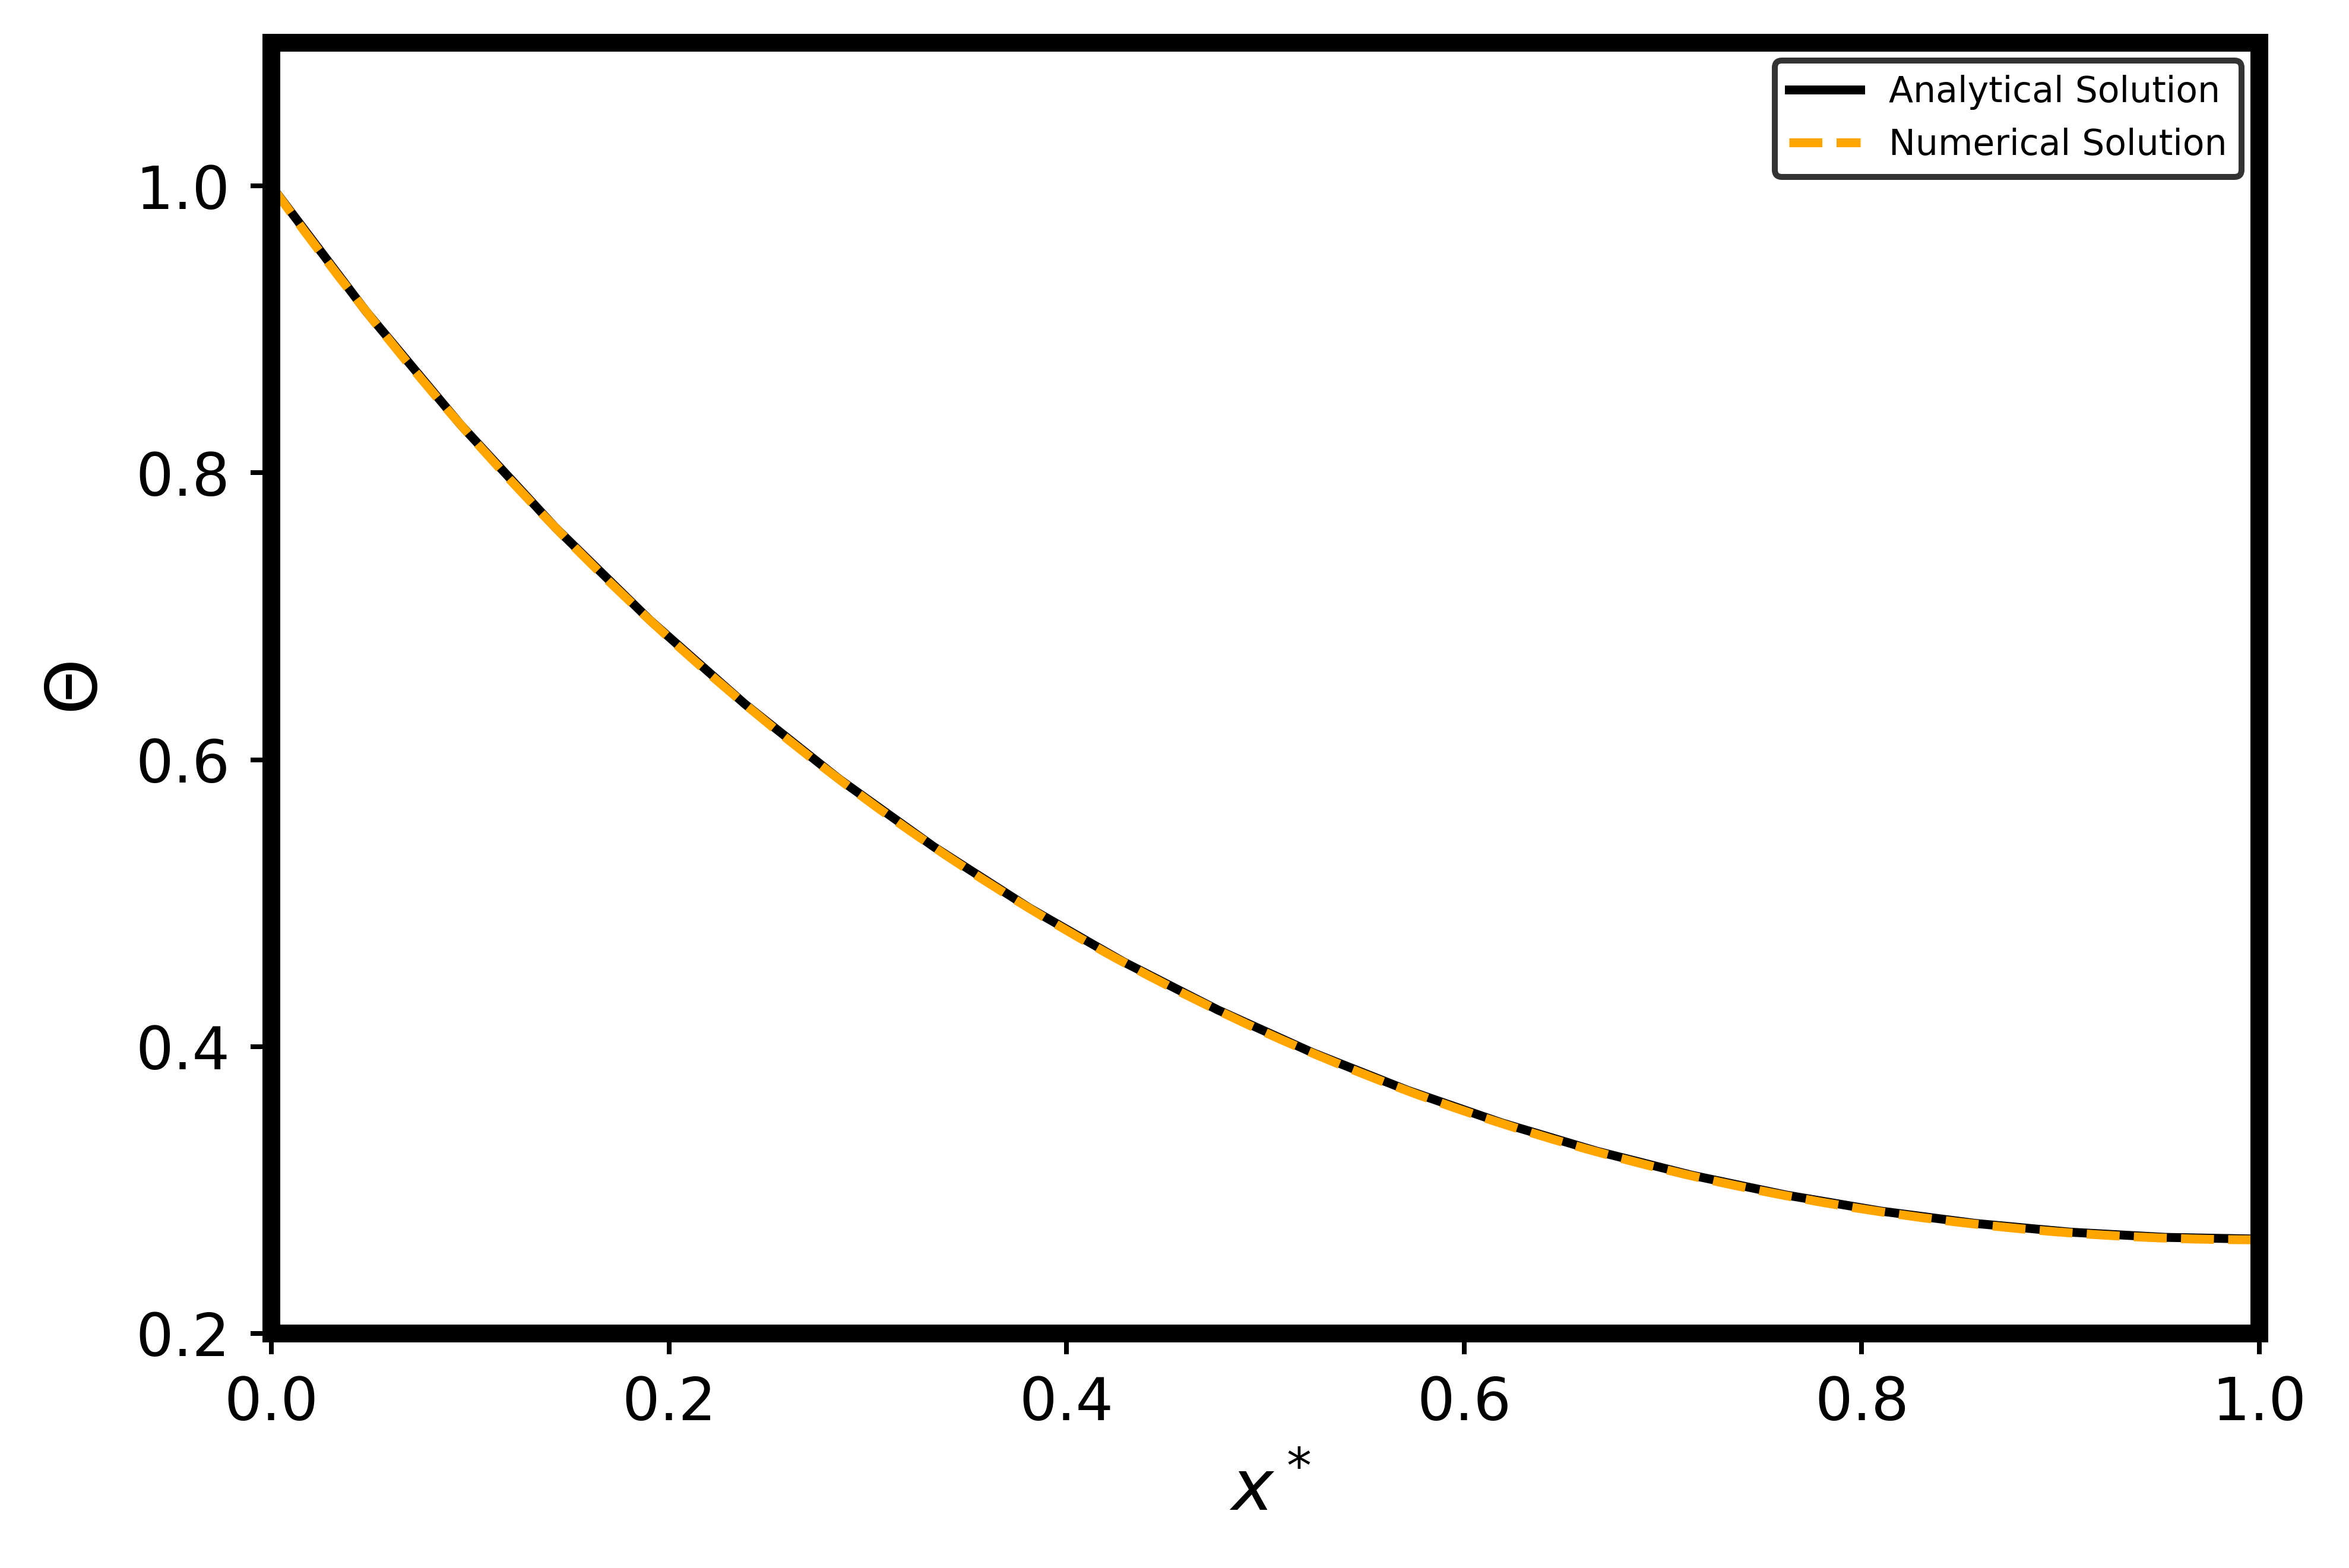

In [37]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' $x^*$ ',fontsize=12,fontweight='bold')
plt.ylabel('$\Theta$',fontsize=12,fontweight='bold')
plt.xlim(left=0,right=1)
plt.ylim(bottom=0.2,top=1.1)
plt.plot(np.linspace(0,1,22),T_analy,label='Analytical Solution',color='black')
plt.plot(np.linspace(0,1,n),T,label='Numerical Solution',color='orange',linestyle='--')

plt.legend(edgecolor='black',loc='upper right',fontsize=6)

In [17]:
gradientwall = (T[1]-T[0])/dxe - hPl2kA*dxe/2
error= abs(gradientwall) - 2*np.tanh(2)
ratio =error/ (2*np.tanh(2))
ratio =ratio * 100
ratio

0.09733491556646376

In [18]:
dxe

0.043478260869565216

C:\Users\nikhi\AppData\Local\Temp\ipykernel_21536\1237562753.py:26: MatplotlibDeprecationWarning: Passing argument *collection* of unexpected type FancyArrowPatch to add_collection which only accepts <class 'matplotlib.collections.Collection'> is deprecated since 3.5 and will become an error two minor releases later.
  plt.gca().add_collection(p1)


AttributeError: 'FancyArrowPatch' object has no attribute 'get_datalim'

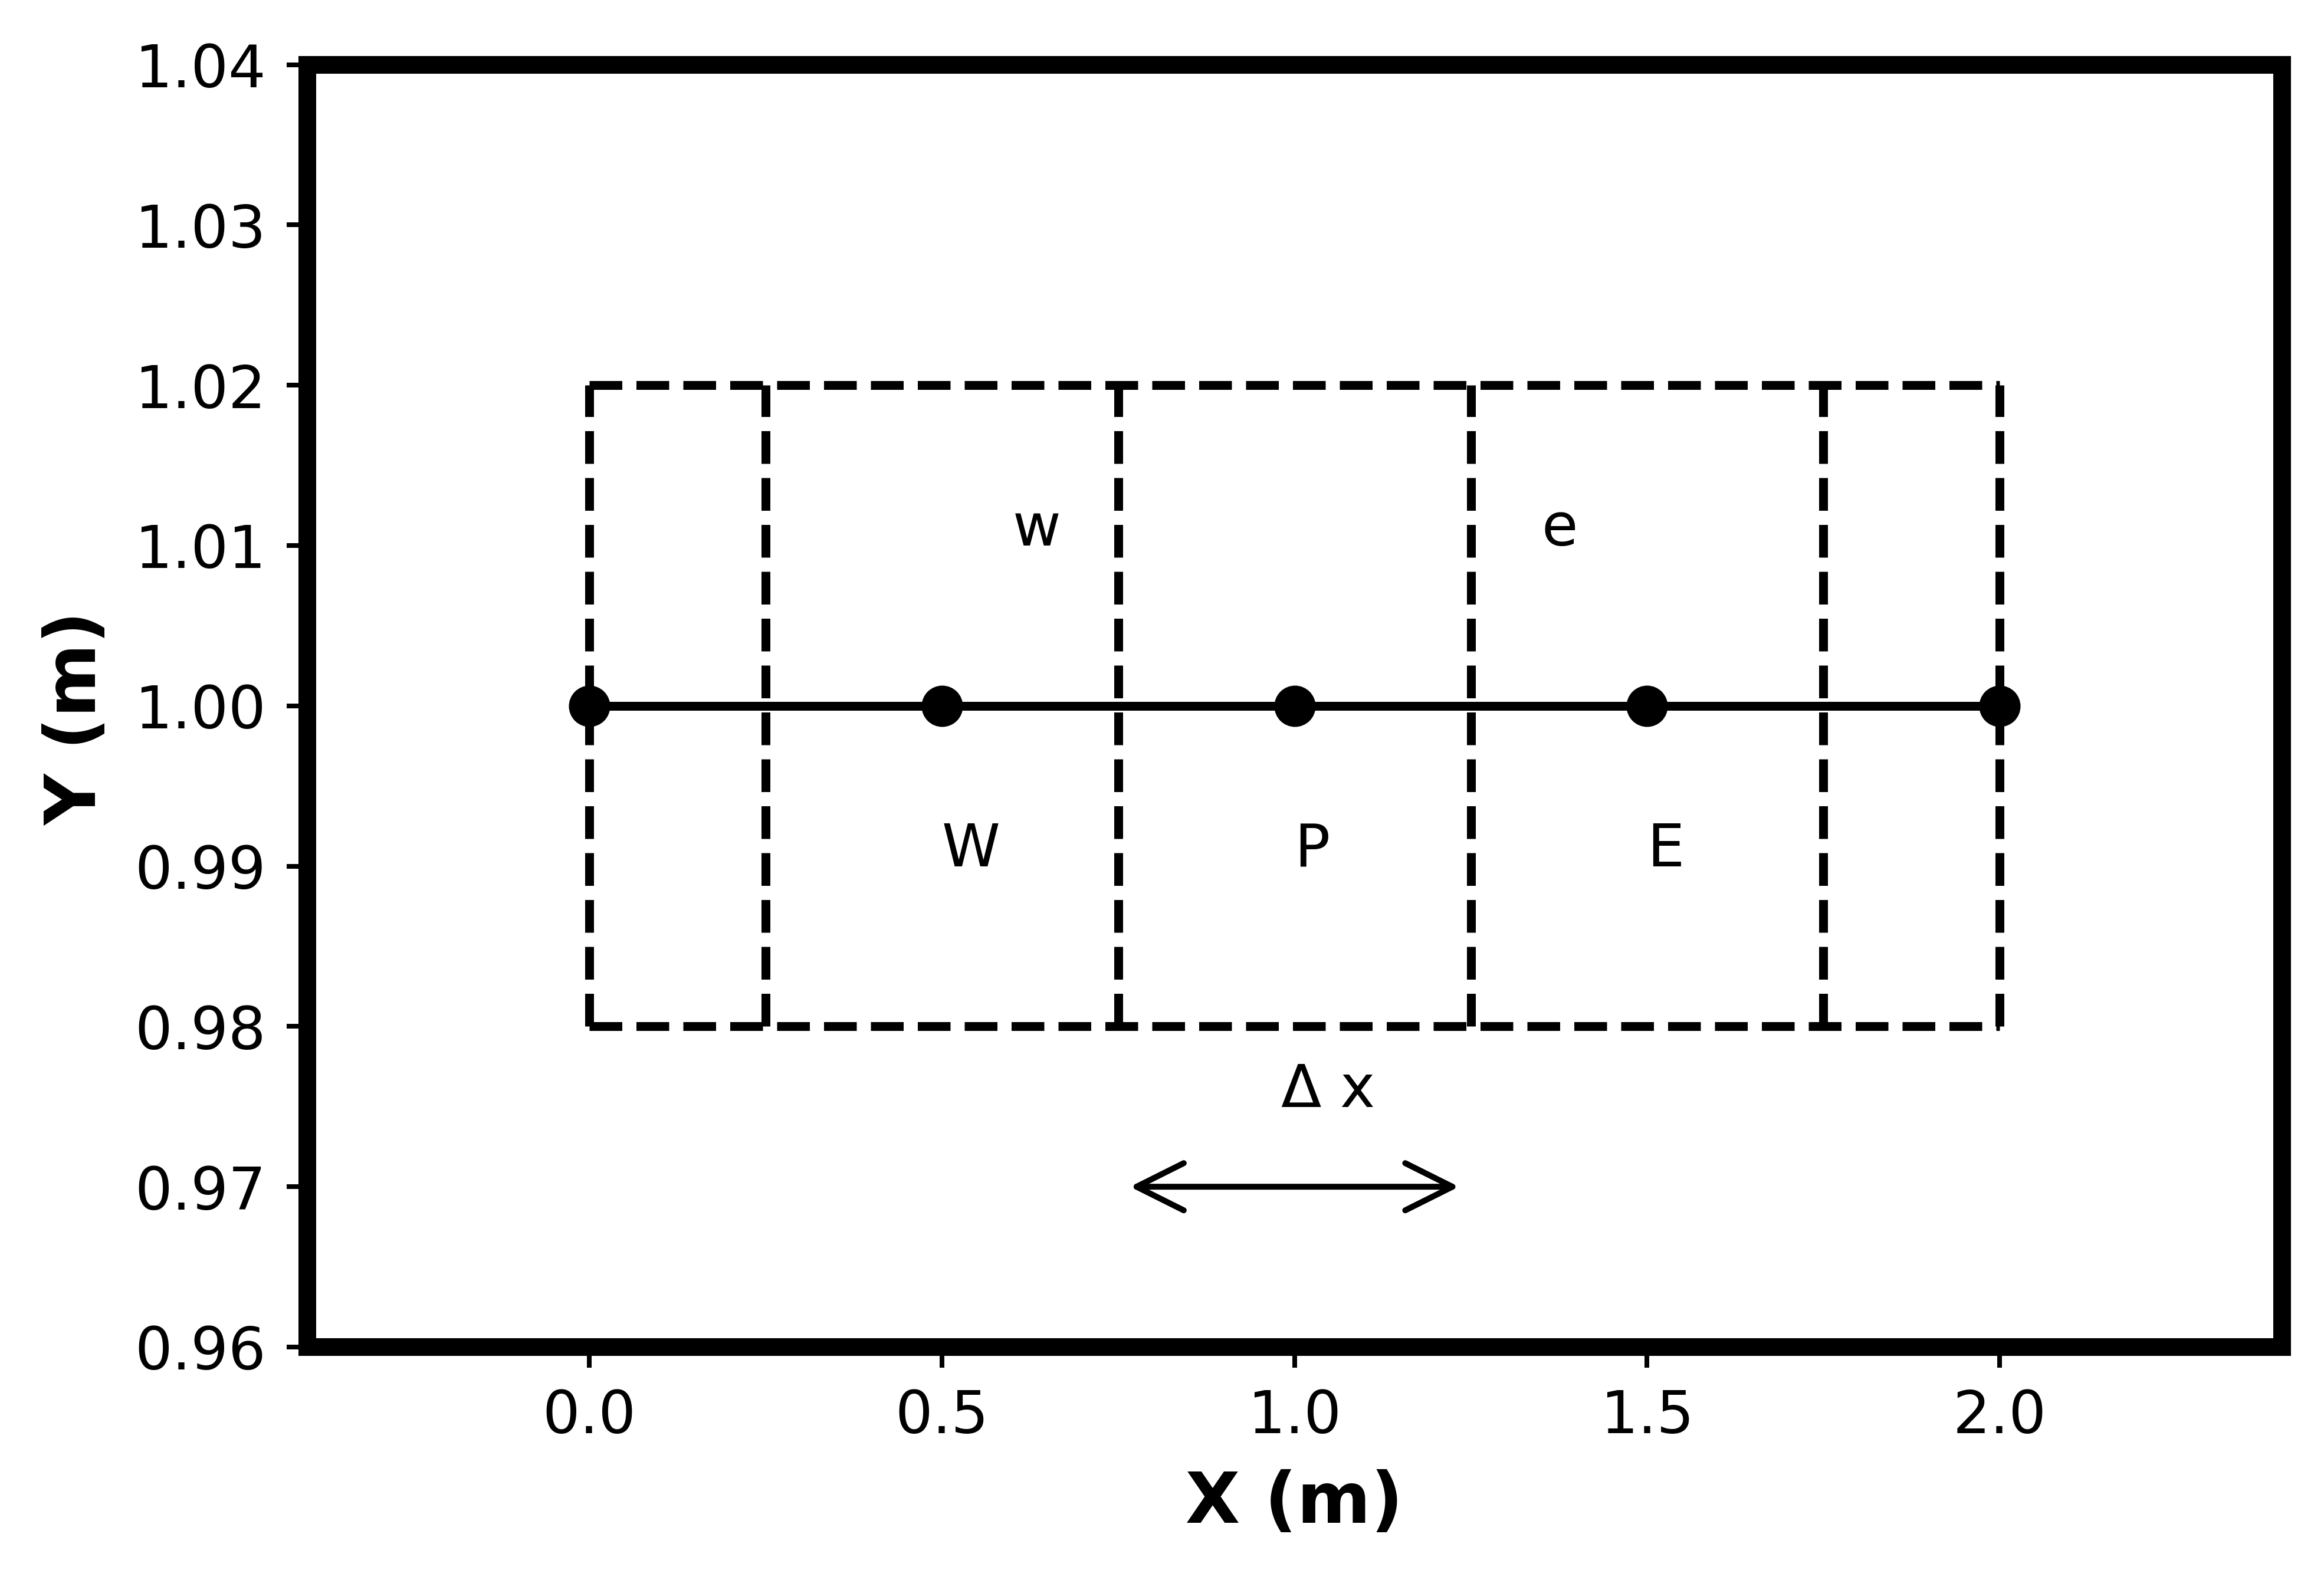

In [ ]:

plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
x,y = np.meshgrid([0,.5,1,1.5,2],[1,1,1,1,1])
plt.ylim(0.96,1.04)
plt.plot([0,.5,1,1.5,2],[1,1,1,1,1],marker='o',color='black')
plt.plot([0,.5,1,1.5,2],[1.02,1.02,1.02,1.02,1.02],linestyle='--',color='black')
plt.plot([0,.5,1,1.5,2],0.98*np.ones((5,)),linestyle='--',color='black')

plt.plot(np.zeros((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot(2*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((0+.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((1.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((2.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((3.5)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')

plt.xlim(-0.4,2.4)
plt.text(1.5,.99,'E')
plt.text(1,.99,'P')
plt.text(.5,.99,'W')
plt.text(1.35,1.01,'e')
plt.text(0.6,1.01,'w')
plt.text(.98,0.975,'$ \u0394 $ x')
p1=patches.FancyArrowPatch((0.75, 0.97), (1.25, 0.97), arrowstyle='<->', mutation_scale=20)
plt.gca().add_collection(p1)


In [9]:
import copy

In [28]:
x_old=10
conv=1e-4
error=1
iter=0
while (error > conv):
    x=x_old - x_old *(x_old -2.5 * math.log(x_old)-5.5)/(x_old-2.5)
    x=round(x,4)
    error= abs(x - x_old)
    x_old= copy.deepcopy(x)
    iter= iter+1
    print(iter,x)


1 11.6753
2 11.6351
3 11.6351


# Project 6

In [2]:
a=8
b=4
c=9
d=3

In [3]:
c_stream= (-1)*(a+b+c+d)/4
rho = a+1
gamma = b+1
Sc= c
Sp=2*(d+1)

In [4]:
def face_interpolation(Pe,scheme):
    if scheme=="UPWIND":
        AP=1
    if scheme == "CDS":
        AP= 1- 0.5 * abs(Pe)
    if scheme == "HYBRID":
        AP=max(0,1-0.5*abs(Pe))
    if scheme == "POWER_LAW":
        AP=max(0,pow(1-0.1*abs(Pe),5))
    return AP
    

In [5]:
scheme="POWER_LAW"
length=1
height=1
imax=50 # maximum number of grid points in x direction
jmax=50
dx=length/(imax-2)
dy=height/(jmax-2)

# creating face coordinates
xface=np.zeros((imax-1,))
yface=np.zeros((jmax-1,))
for i in range(0,imax-1):
    xface[i]=i*dx
for i in range(0,jmax-1):
    yface[i]=i*dy
# defining dxe and dyn 
dxe=np.zeros((imax-1,))
for i in range(0,imax-1):
    if (i==0 or i== (imax-2)):
        dxe[i]=dx/2
    else:
        dxe[i]=dx
dyn=np.zeros((jmax-1,))
for i in range(0,jmax-1):
    if (i==0 or i== (jmax-2)):
        dyn[i]=dy/2
    else:
        dyn[i]=dy

# defining grid points position
x =np.zeros((imax,))
y=np.zeros((jmax,))
x[0]=0
y[0]=0
for i in range(1,imax):
    x[i]=x[i-1]+dxe[i-1]
for i in range(1,jmax):
    y[i]=y[i-1]+dyn[i-1]

#u,v defined at faces
u=np.zeros((imax-1,jmax))
v=np.zeros((imax,jmax-1))

#velocity field calculation
for i in range(0,imax-1):
    for j in range(0,jmax):
        u[i,j]=c_stream*xface[i]
for i in range(0,imax):
    for j in range(0,jmax-1):
        v[i][j]=-c_stream*yface[j]

# defining phi --> main variable to be solved
phi=np.zeros((imax,jmax))

# BC
phi[:,0]=1 # bottom
phi[:,jmax-1]=0 # top
phi[imax-1,:]=0 # right
phi[0,:]=1 # left

#defining aE and aN matrixes
aE=np.zeros((imax-1,jmax))
aN=np.zeros((imax,jmax-1))

for i in range(0,imax-1):
    for j in range(1,jmax-1):
        aE[i,j]= (gamma*dy/dxe[i])*face_interpolation(rho*u[i,j]*dxe[i]/gamma , scheme) + max(0,-rho*u[i,j]*dy)
        #aW=aE[i-1,j]+rho*u[i-1,j]*dy
for i in range(1,imax-1):
    for j in range(0,jmax-1):
        aN[i,j]= (gamma*dx/dyn[j])*face_interpolation(rho*v[i,j]*dyn[j]/gamma , scheme) + max(0,-rho*v[i,j]*dx)
        #aS=aN[i,j-1]+ rho*v[i,j-1]*dx

#define aP term
aP=np.zeros((imax,jmax))
for i in range(1,imax-1):
    for j in range(1,jmax-1):
        aP[i,j]=aE[i,j]+aE[i-1,j]+rho*u[i-1,j]*dy + aN[i,j]+aN[i,j-1]+rho*v[i,j-1]*dx
        #source term need to be added
        aP[i,j]=aP[i,j]+Sp*dx*dy

convergence =1e-5
error=1
phi_old=phi.copy()
while(error>convergence):
    for i in range(1,imax-1):
        for j in range(1,jmax-1):
            phi[i,j]=(aE[i,j]*phi[i+1,j] + (aE[i-1,j]+rho*u[i-1,j]*dy)*phi[i-1,j] + aN[i,j]*phi[i,j+1] + (aN[i,j-1]+rho*v[i,j-1]*dx)*phi[i,j-1] + Sc*dx*dy)/aP[i,j]
            phi[i,j]=1.5*phi[i,j]+(1-1.5)*phi_old[i,j]
    error = np.amax(np.abs(phi-phi_old))
    phi_old=phi.copy()


In [10]:
error

9.87423060228032e-06

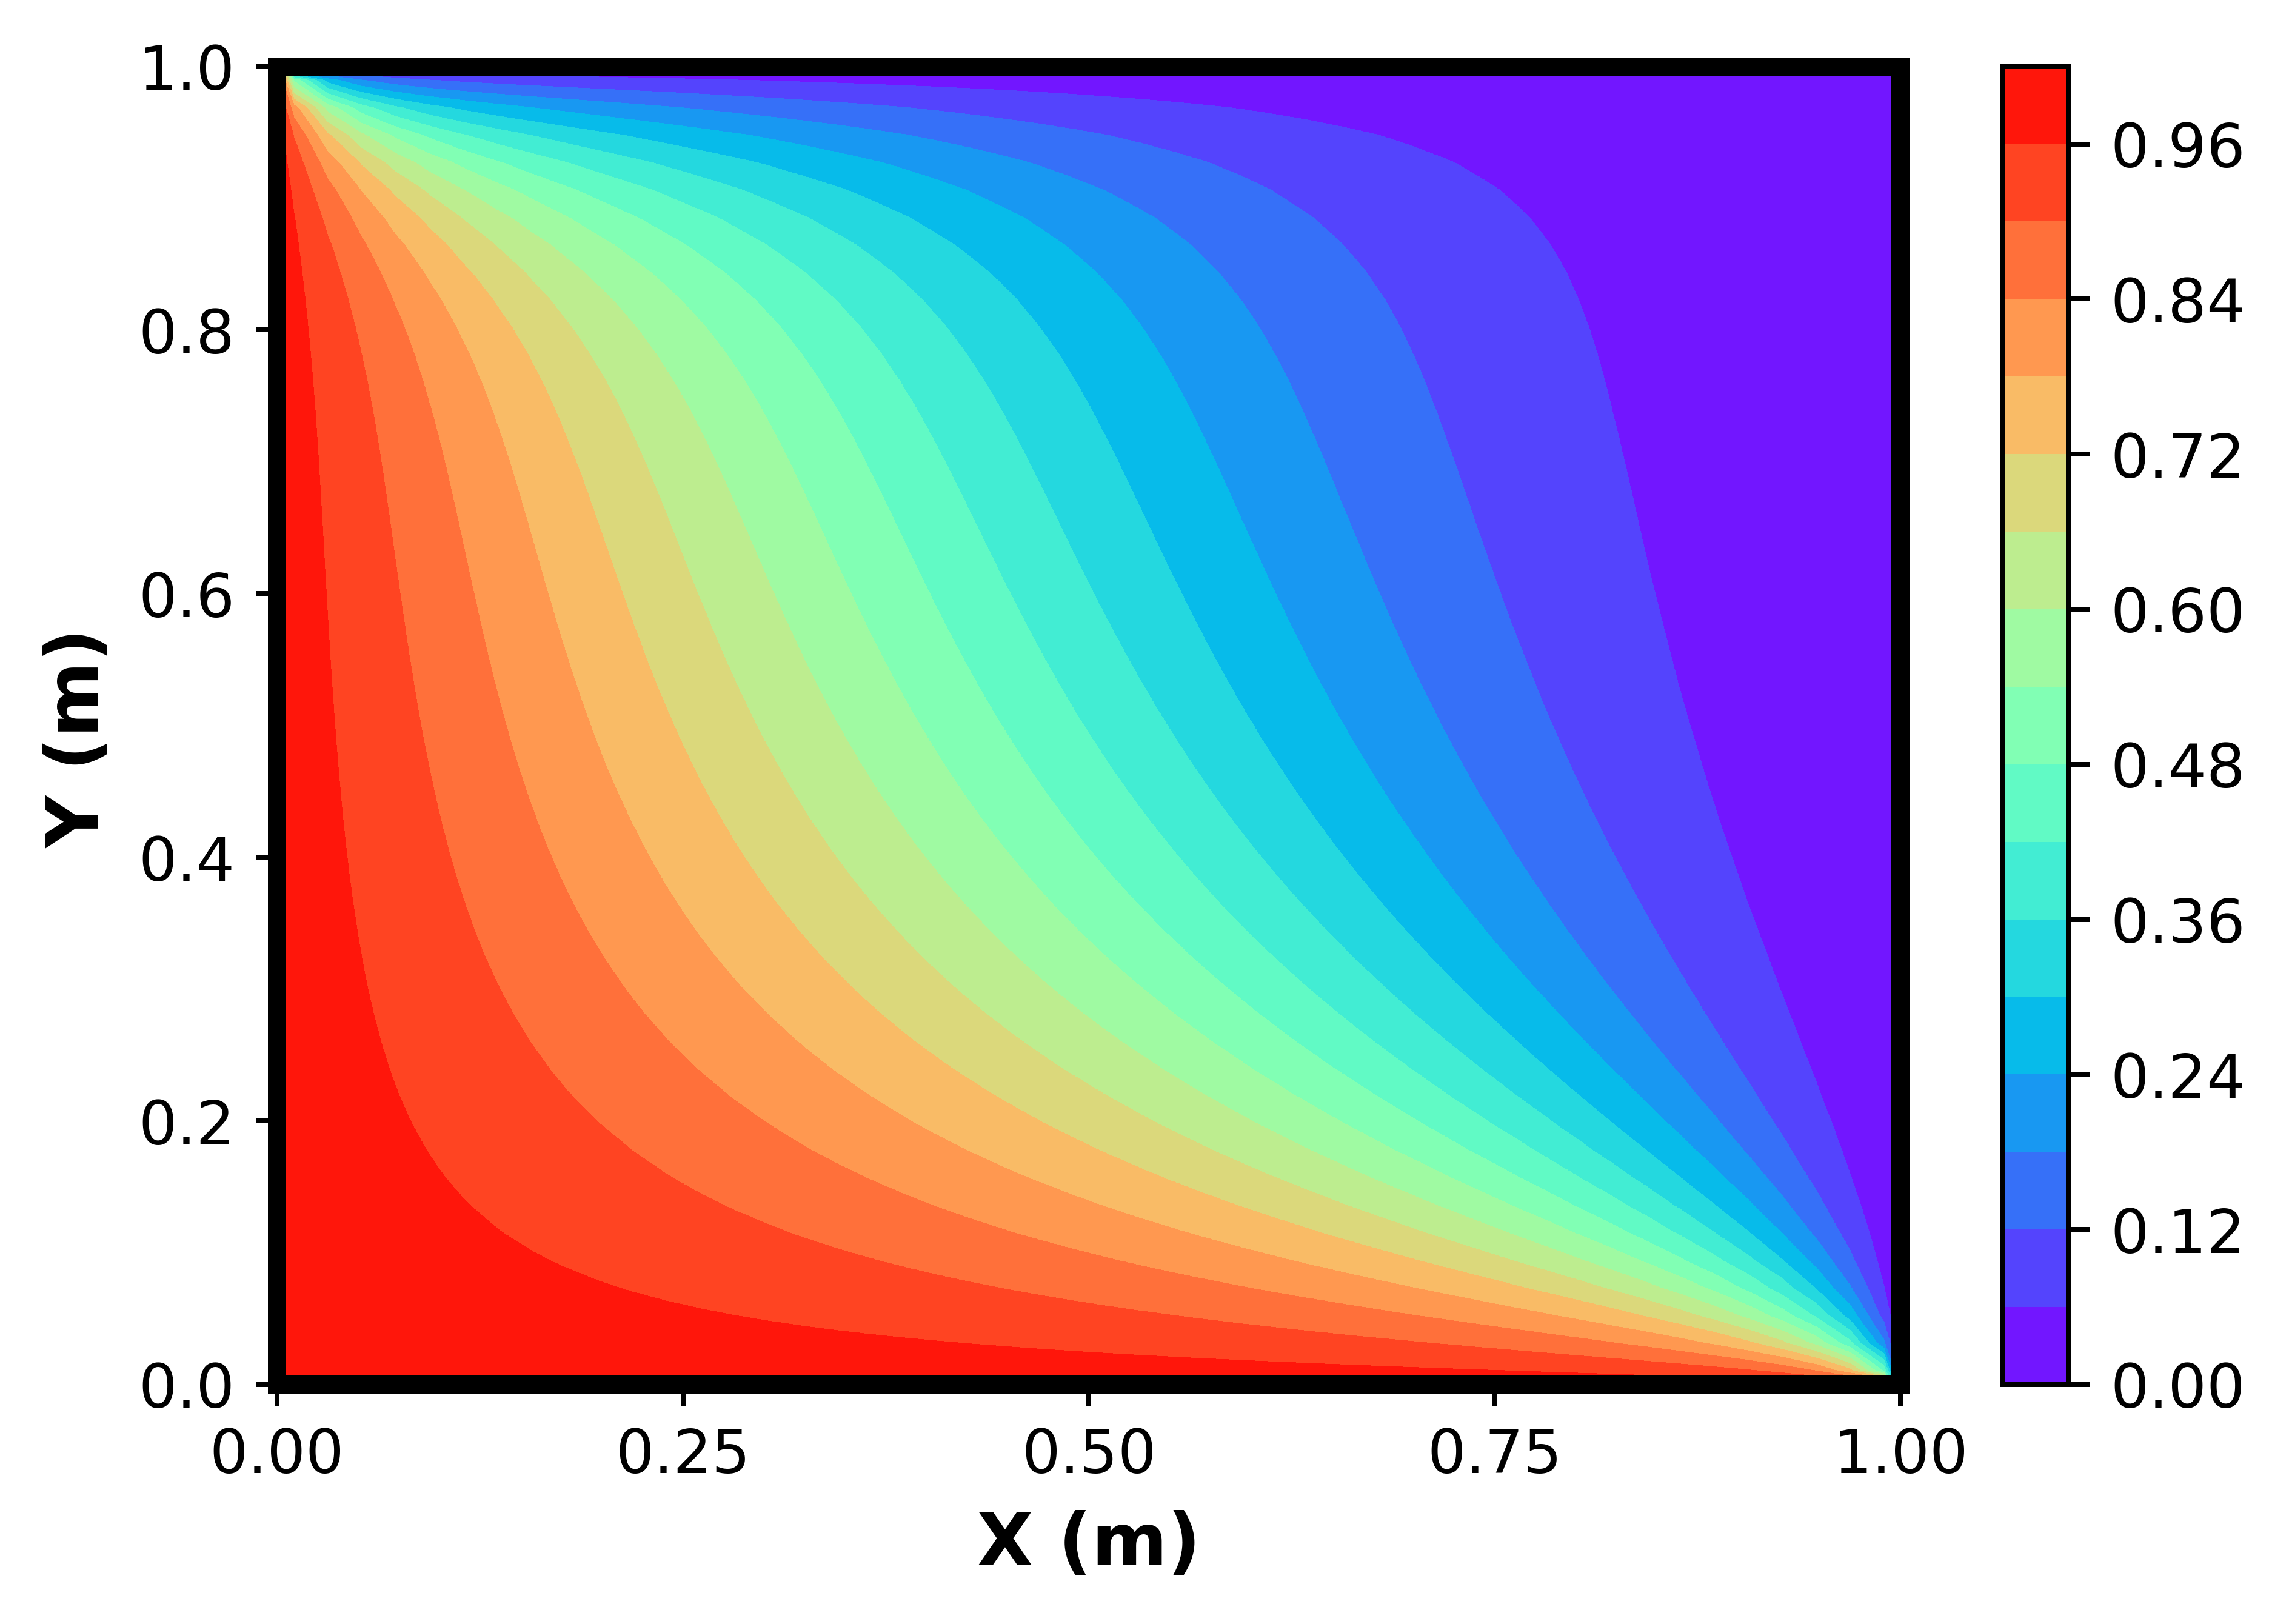

In [6]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,length,5))
lx,ly = np.meshgrid(x, y)
plt.contourf(ly,lx,phi, 16, alpha=1, cmap='rainbow')
plt.colorbar()

In [36]:
def plot_scheme(scheme,imax,jmax,length,height,c_stream,rho,gamma,Sc,Sp):
    '''
    input -- > scheme, imax,jmax,length,height
    '''
    dx=length/(imax-2)
    dy=height/(jmax-2)

    # creating face coordinates
    xface=np.zeros((imax-1,))
    yface=np.zeros((jmax-1,))
    for i in range(0,imax-1):
        xface[i]=i*dx
    for i in range(0,jmax-1):
        yface[i]=i*dy
    # defining dxe and dyn 
    dxe=np.zeros((imax-1,))
    for i in range(0,imax-1):
        if (i==0 or i== (imax-2)):
            dxe[i]=dx/2
        else:
            dxe[i]=dx
    dyn=np.zeros((jmax-1,))
    for i in range(0,jmax-1):
        if (i==0 or i== (jmax-2)):
            dyn[i]=dy/2
        else:
            dyn[i]=dy

    # defining grid points position
    x =np.zeros((imax,))
    y=np.zeros((jmax,))
    x[0]=0
    y[0]=0
    for i in range(1,imax):
        x[i]=x[i-1]+dxe[i-1]
    for i in range(1,jmax):
        y[i]=y[i-1]+dyn[i-1]

    #u,v defined at faces
    u=np.zeros((imax-1,jmax))
    v=np.zeros((imax,jmax-1))

    #velocity field calculation
    for i in range(0,imax-1):
        for j in range(0,jmax):
            u[i,j]=c_stream*xface[i]
    for i in range(0,imax):
        for j in range(0,jmax-1):
            v[i][j]=-c_stream*yface[j]

    # defining phi --> main variable to be solved
    phi=np.zeros((imax,jmax))

    # BC
    phi[:,0]=1 # bottom
    phi[:,jmax-1]=0 # top
    phi[imax-1,:]=0 # right
    phi[0,:]=1 # left

    #defining aE and aN matrixes
    aE=np.zeros((imax-1,jmax))
    aN=np.zeros((imax,jmax-1))

    for i in range(0,imax-1):
        for j in range(1,jmax-1):
            aE[i,j]= (gamma*dy/dxe[i])*face_interpolation(rho*u[i,j]*dxe[i]/gamma , scheme) + max(0,-rho*u[i,j]*dy)
            #aW=aE[i-1,j]+rho*u[i-1,j]*dy
    for i in range(1,imax-1):
        for j in range(0,jmax-1):
            aN[i,j]= (gamma*dx/dyn[j])*face_interpolation(rho*v[i,j]*dyn[j]/gamma , scheme) + max(0,-rho*v[i,j]*dx)
            #aS=aN[i,j-1]+ rho*v[i,j-1]*dx

    #define aP term
    aP=np.zeros((imax,jmax))
    for i in range(1,imax-1):
        for j in range(1,jmax-1):
            aP[i,j]=aE[i,j]+aE[i-1,j]+rho*u[i-1,j]*dy + aN[i,j]+aN[i,j-1]+rho*v[i,j-1]*dx
            #source term need to be added
            aP[i,j]=aP[i,j]+Sp*dx*dy

    convergence =1e-5
    error=1
    phi_old=phi.copy()
    while(error>convergence):
        for i in range(1,imax-1):
            for j in range(1,jmax-1):
                phi[i,j]=(aE[i,j]*phi[i+1,j] + (aE[i-1,j]+rho*u[i-1,j]*dy)*phi[i-1,j] + aN[i,j]*phi[i,j+1] + (aN[i,j-1]+rho*v[i,j-1]*dx)*phi[i,j-1] + Sc*dx*dy)/aP[i,j]
                phi[i,j]=1.5*phi[i,j]+(1-1.5)*phi_old[i,j]
        error = np.amax(np.abs(phi-phi_old))
        phi_old=phi.copy()
    
    #Plotting
    plt.figure(dpi=720)
    plt.setp(plt.axes().spines.values(), linewidth=3)
    plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
    plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
    plt.xticks(np.linspace(0,length,5))
    lx,ly = np.meshgrid(y,x)
    plt.contourf(ly,lx,phi, 15, alpha=1, cmap='rainbow')
    plt.colorbar()
    return phi,x,y

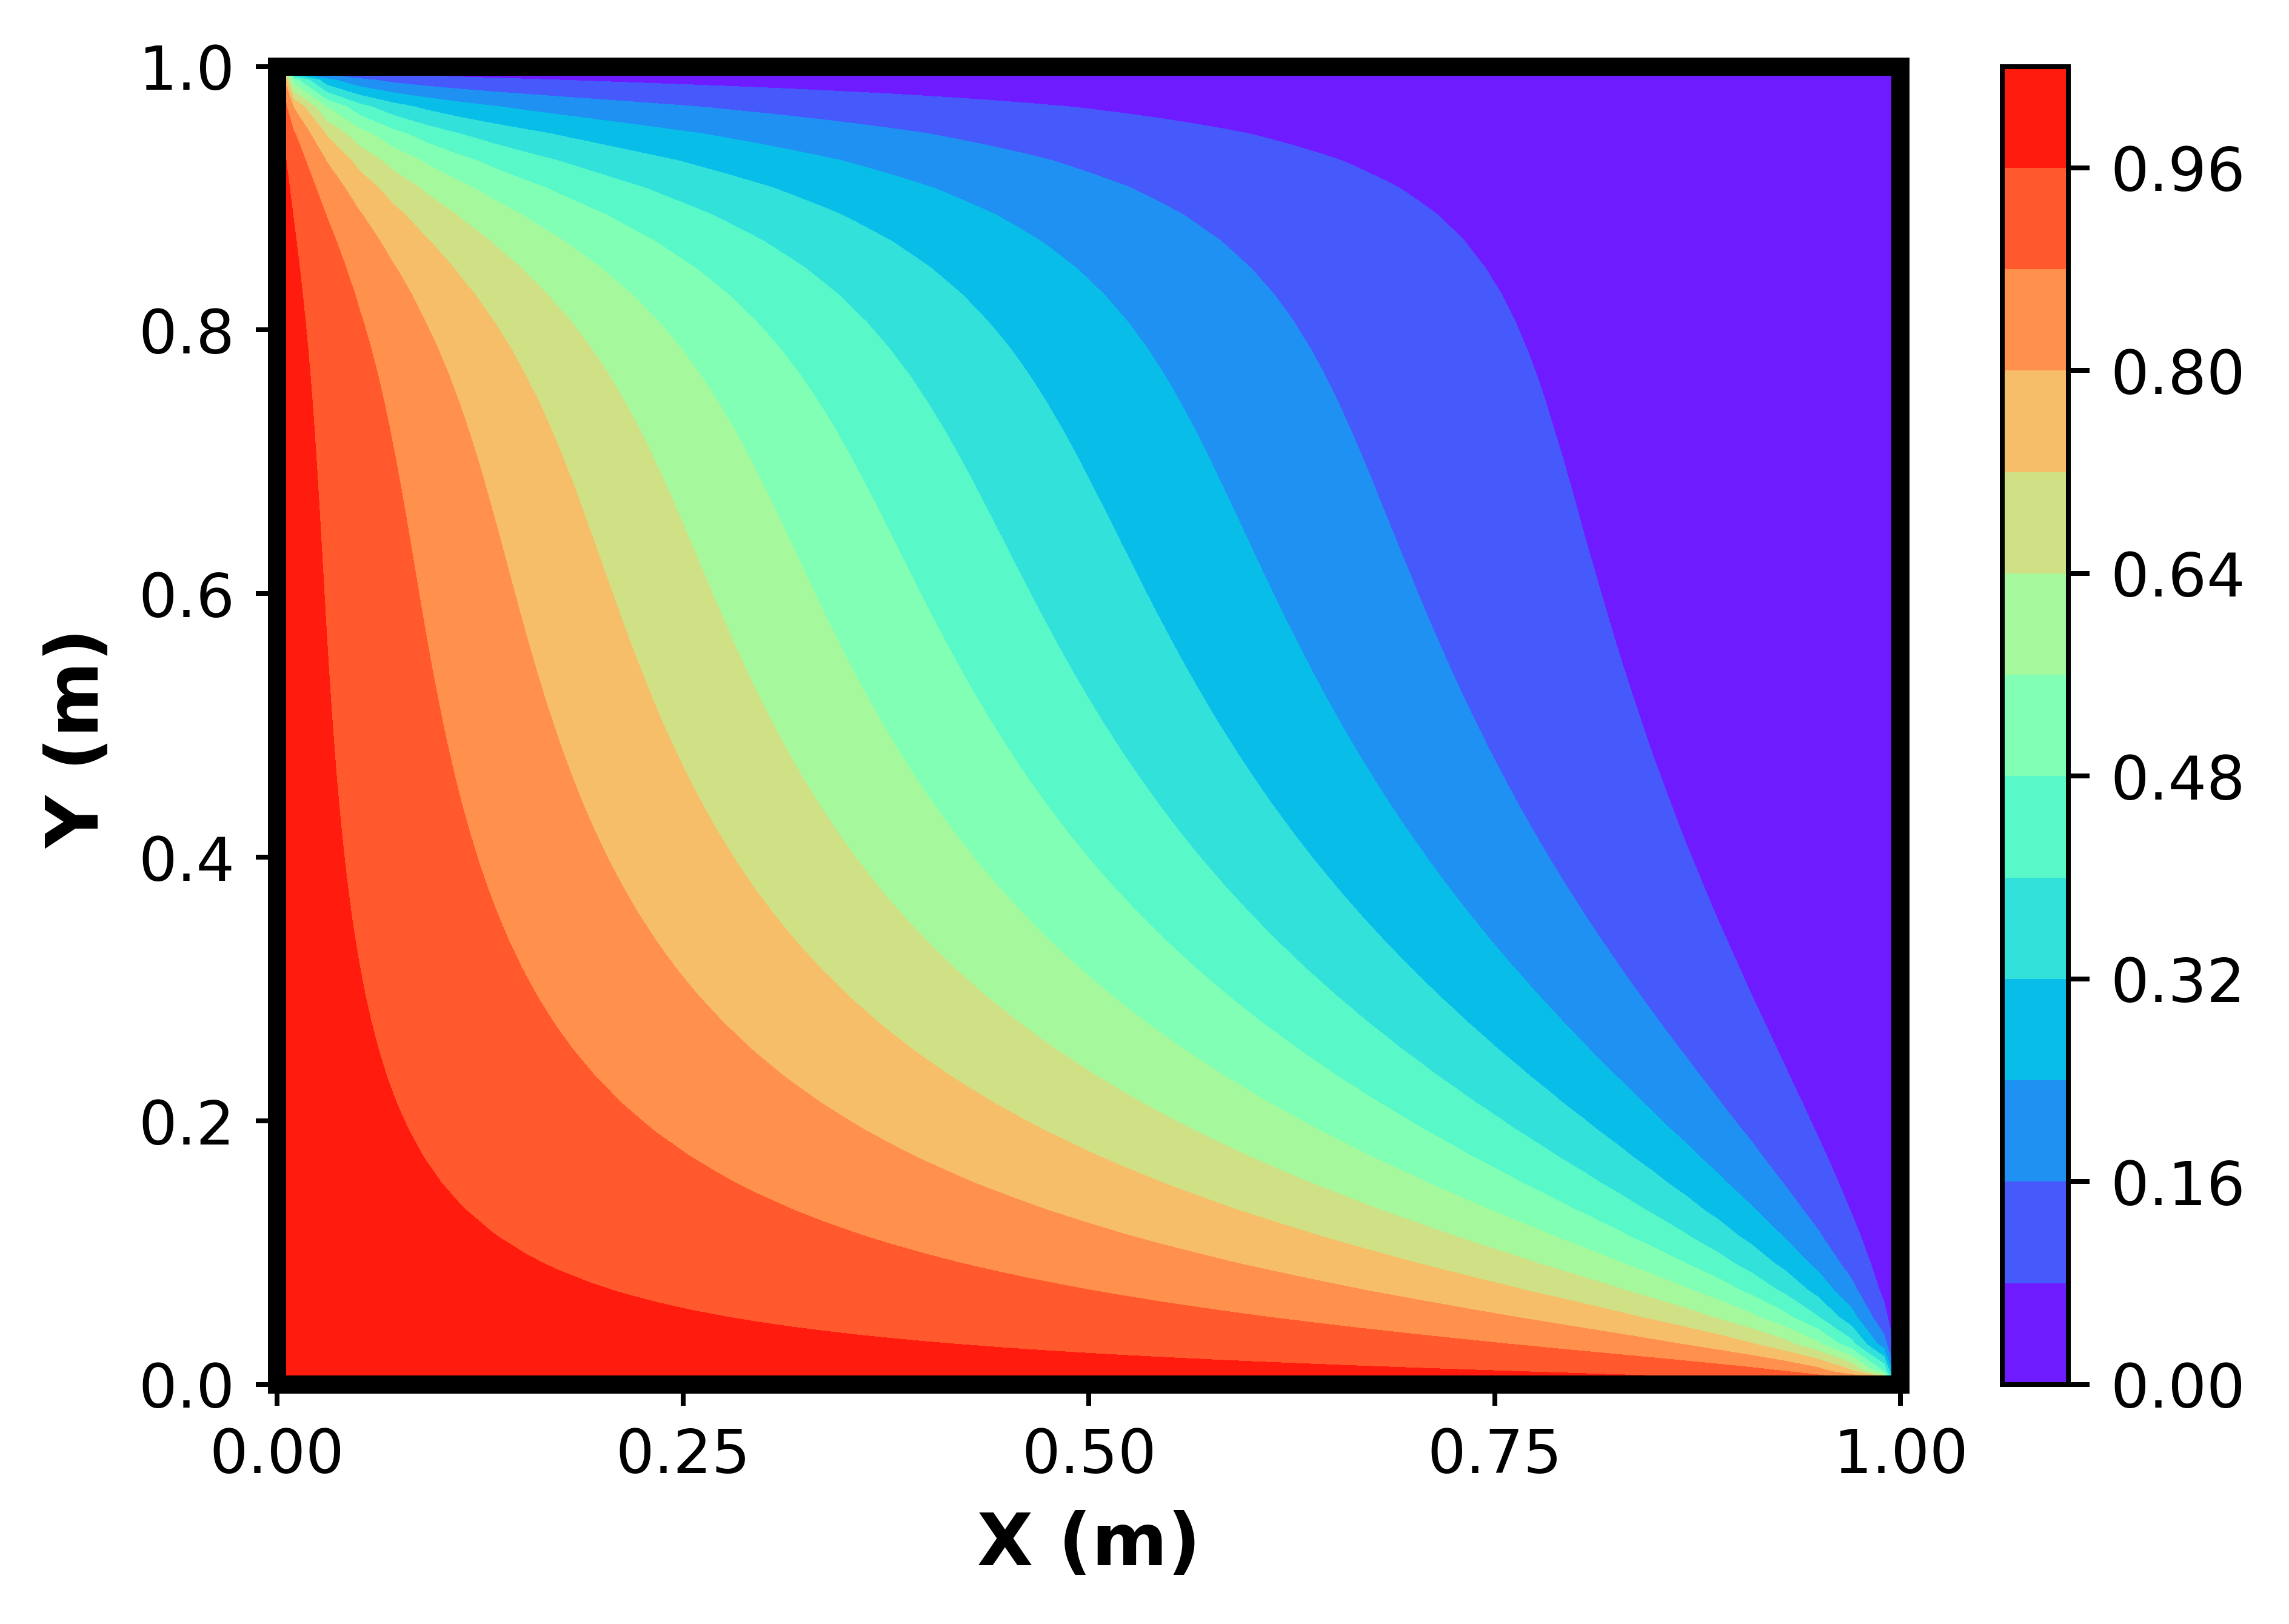

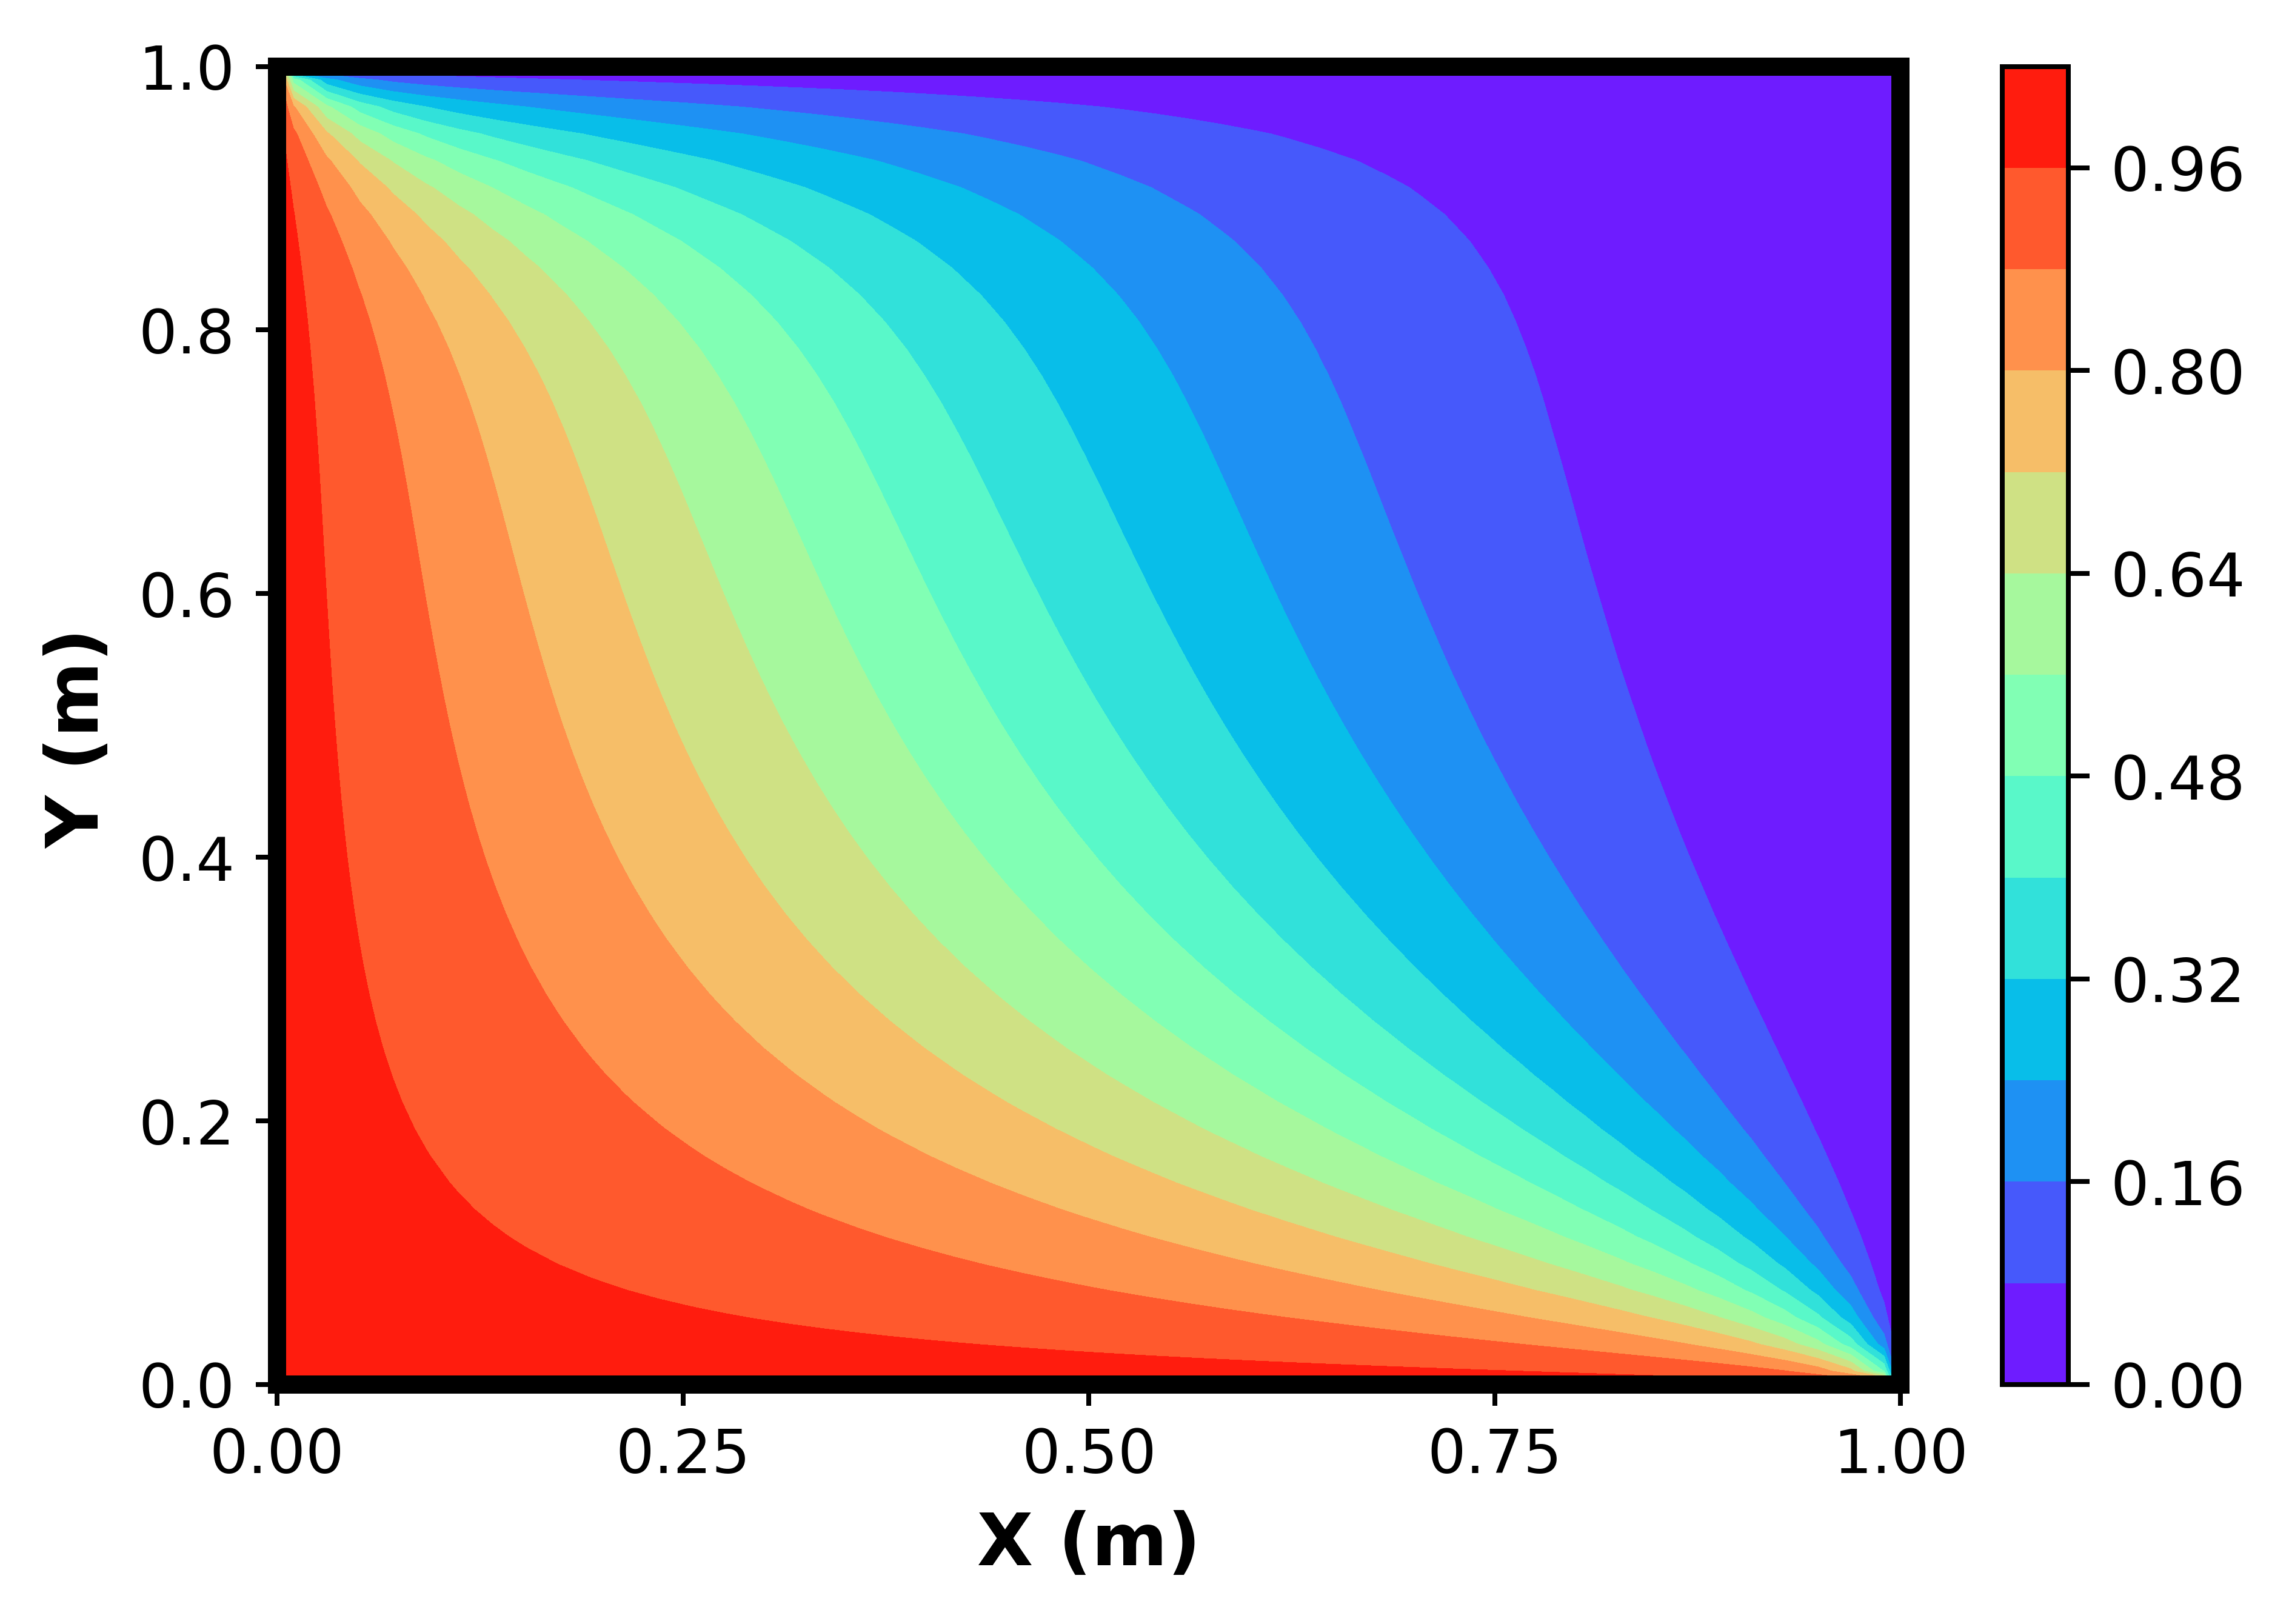

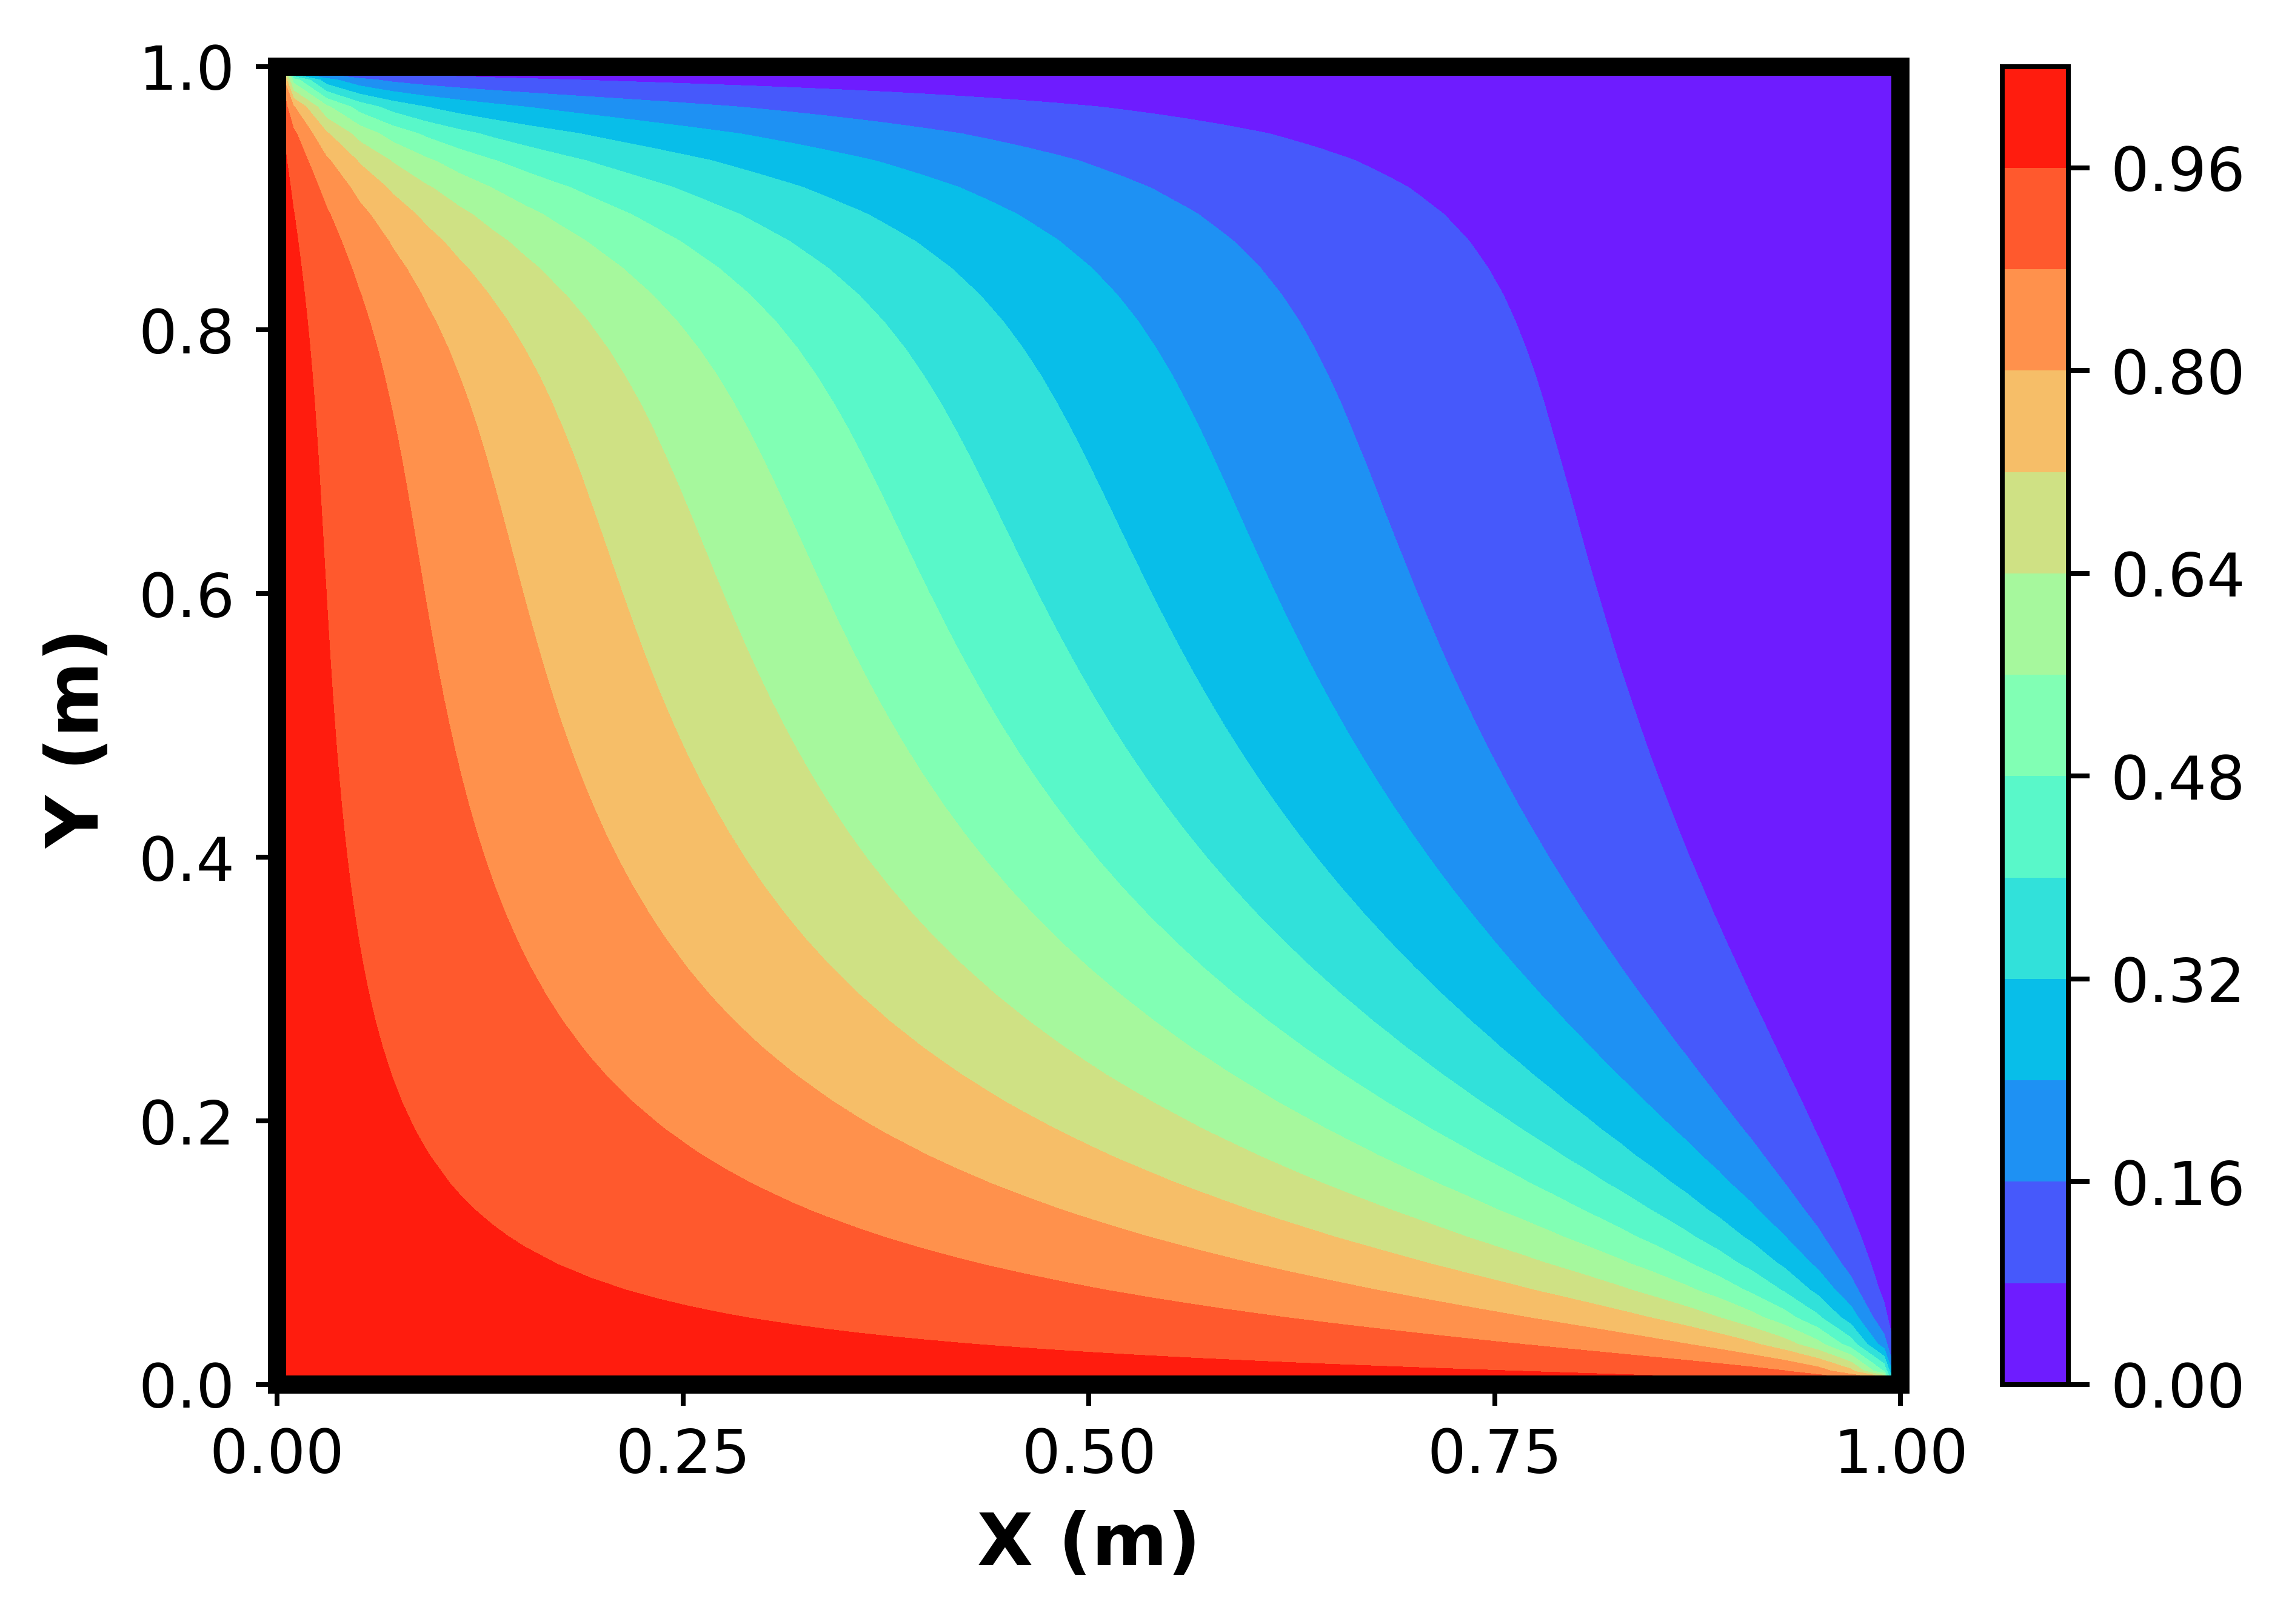

In [84]:
n=51
phi,x,y= plot_scheme('UPWIND',n,n,1,1,c_stream,rho,gamma,Sc,Sp)
phi1,x1,y1= plot_scheme('HYBRID',n,n,1,1,c_stream,rho,gamma,Sc,Sp)
phi2,x2,y2 = plot_scheme('POWER_LAW',n,n,1,1,c_stream,rho,gamma,Sc,Sp)

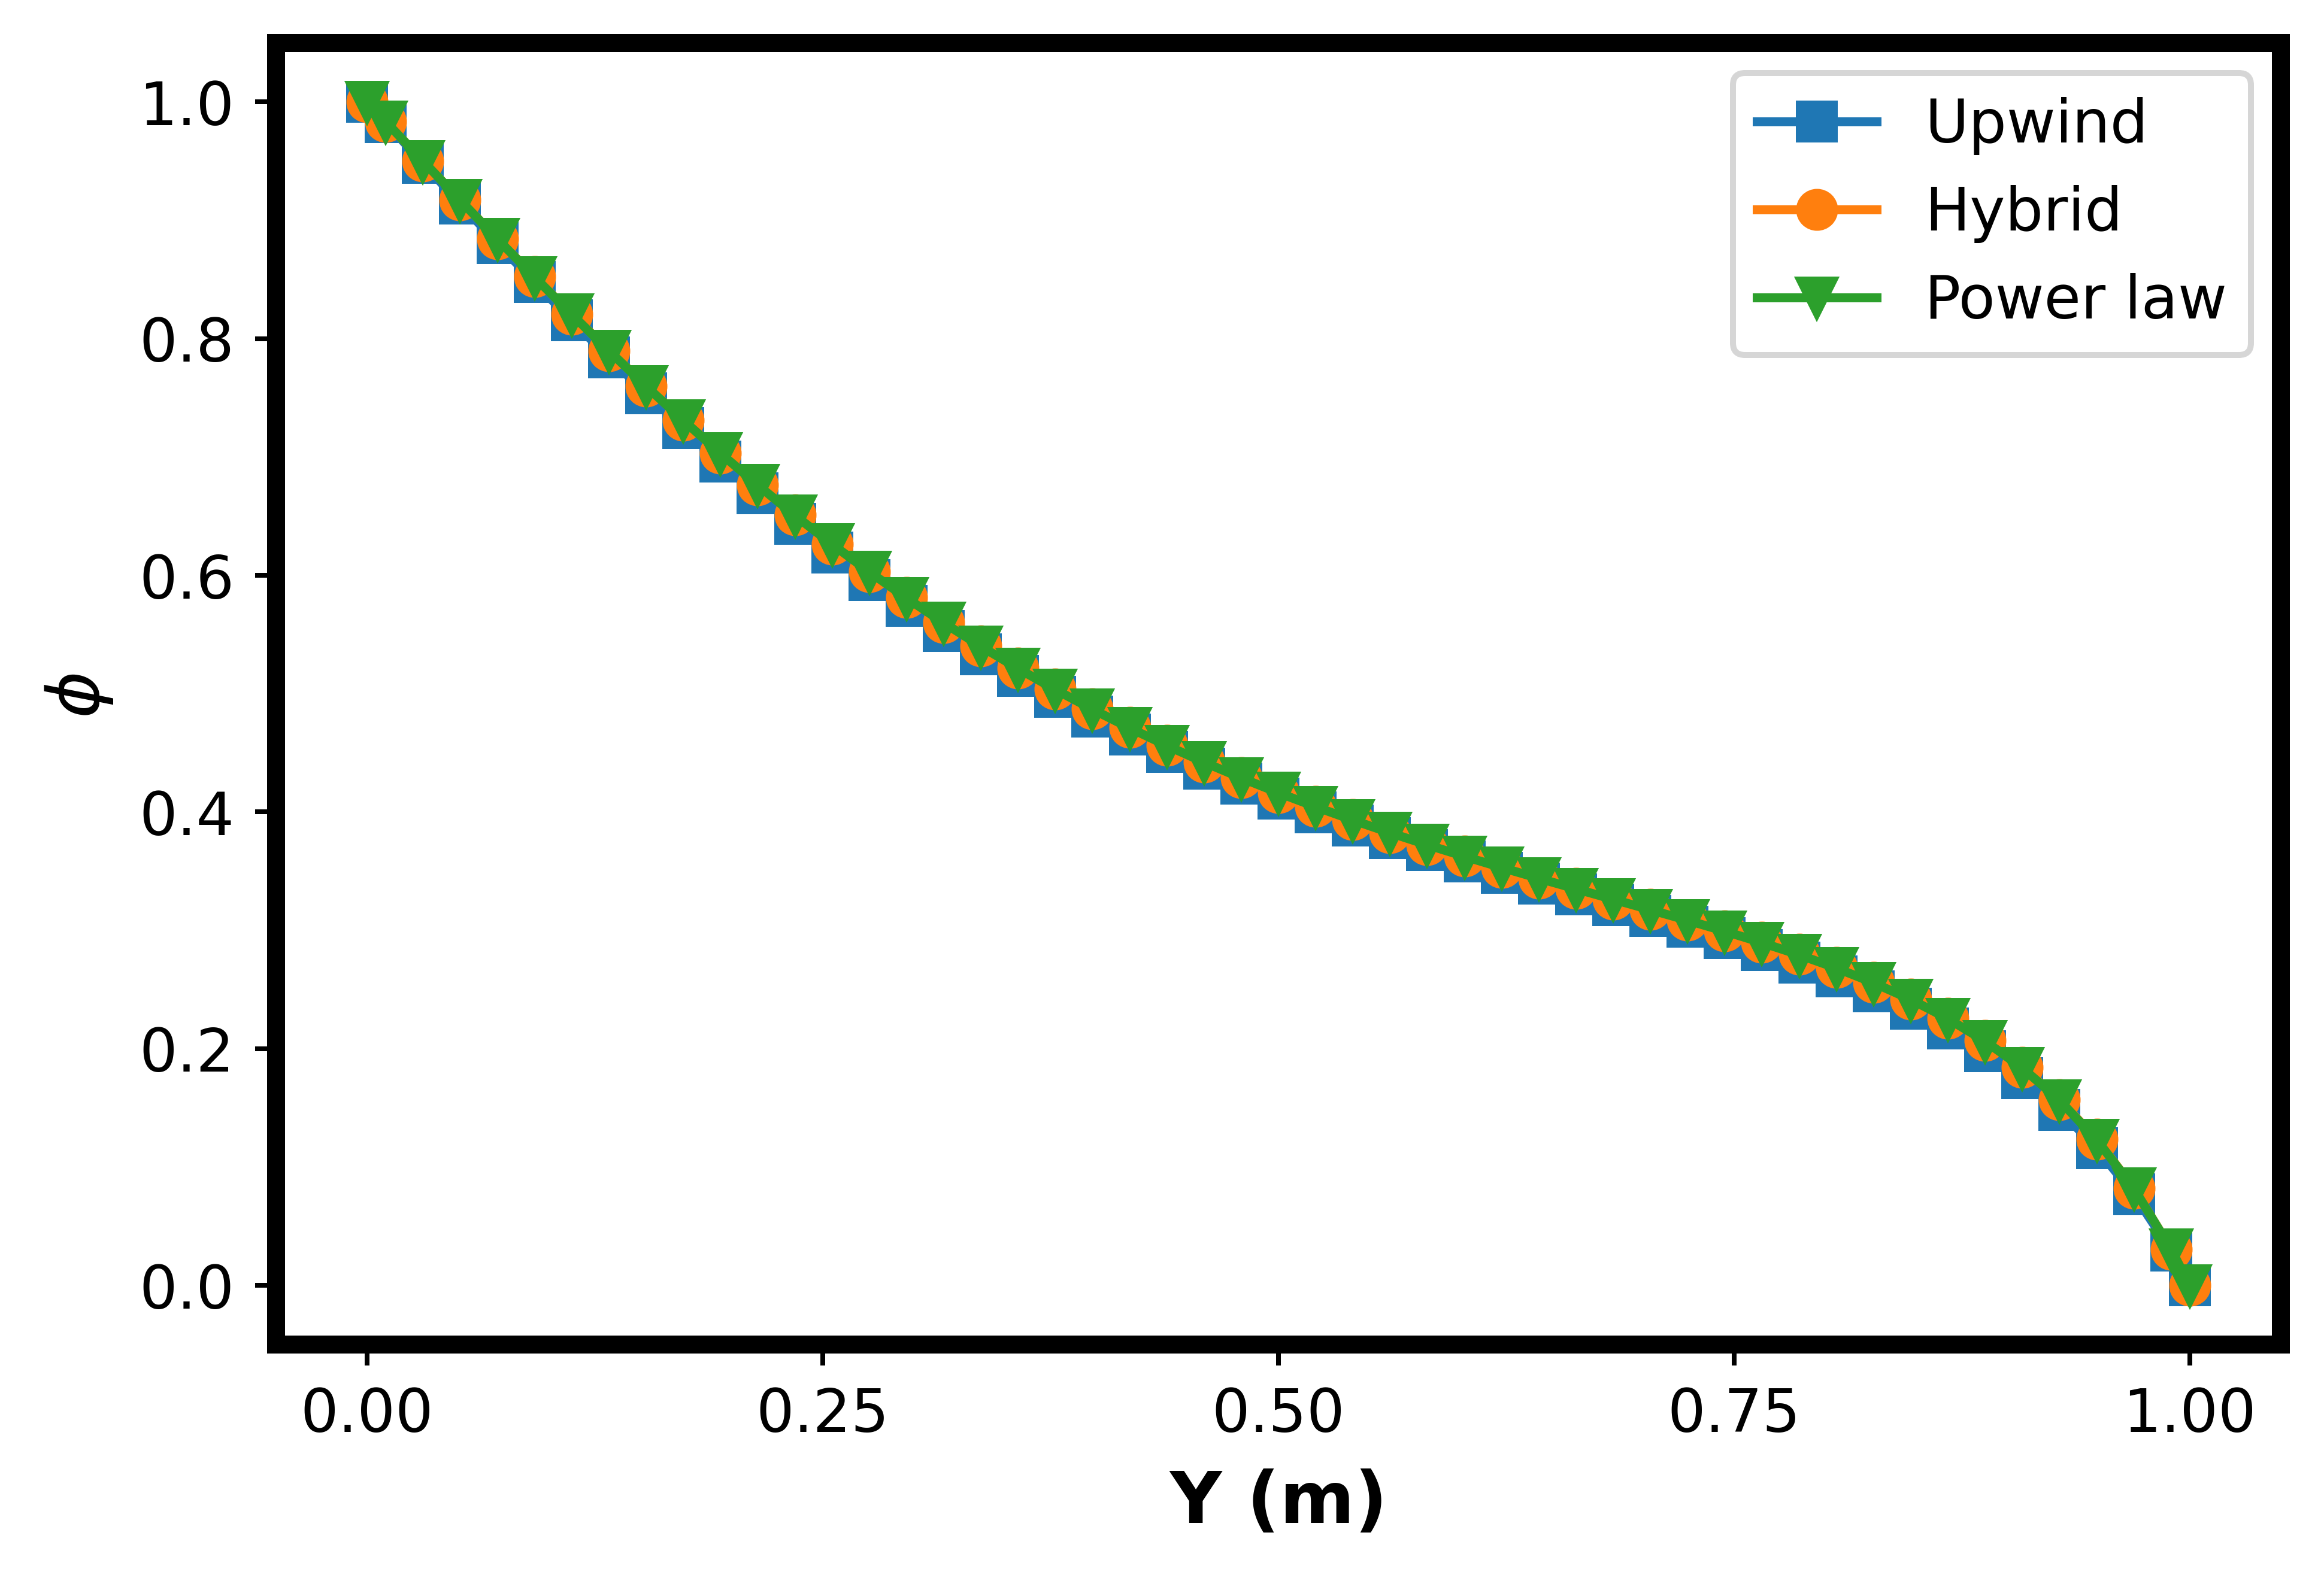

In [85]:
plt.figure(dpi=720)
y=(n-1)/2
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' Y (m) ',fontsize=12,fontweight='bold')
plt.ylabel('$\phi$ ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,1,5))
plt.plot(x,phi[int(y),:],label='Upwind',marker='s')
plt.plot(x1,phi1[int(y),:],label='Hybrid',marker = 'o')
plt.plot(x2,phi2[int(y),:],label='Power law',marker='v')
plt.legend()

In [61]:
int(y)

5

In [13]:
xx,yy=np.meshgrid(np.linspace(0,1,5),np.linspace(0,1,8))
xx

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

"    \nplt.plot([0,.25,.75,1.25,1.75,2],[1.02,1.02,1.02,1.02,1.02,1.02],linestyle='--',color='black')\nplt.plot([0,.25,.75,1.25,1.75,2],0.98*np.ones((6,)),linestyle='--',color='black')\nplt.plot(np.zeros((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')\nplt.plot(2*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')\nplt.plot((.25+.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')\nplt.plot((1.25+.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')\nplt.plot((1.25+1.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')\nplt.xlim(-0.4,2.4)\n\nplt.text(1.25,.99,'E')\nplt.text(0.25,.99,'W')\nplt.text(.75,.99,'P')\nplt.text(1,1.01,'e')\nplt.text(0.5,1.01,'w')\nplt.text(.98,0.975,'$ Δ $ $x_e$')\nplt.text(0.73,.985,'$ \\Delta $ $x $')\n\n\narrow = arrow = patches.FancyArrowPatch((0.75, 0.97), (1.25, 0.97), arrowstyle='<->', mutation_scale=20)\nplt.gca().add_patch(arrow)\narrow1 = patches.Fa

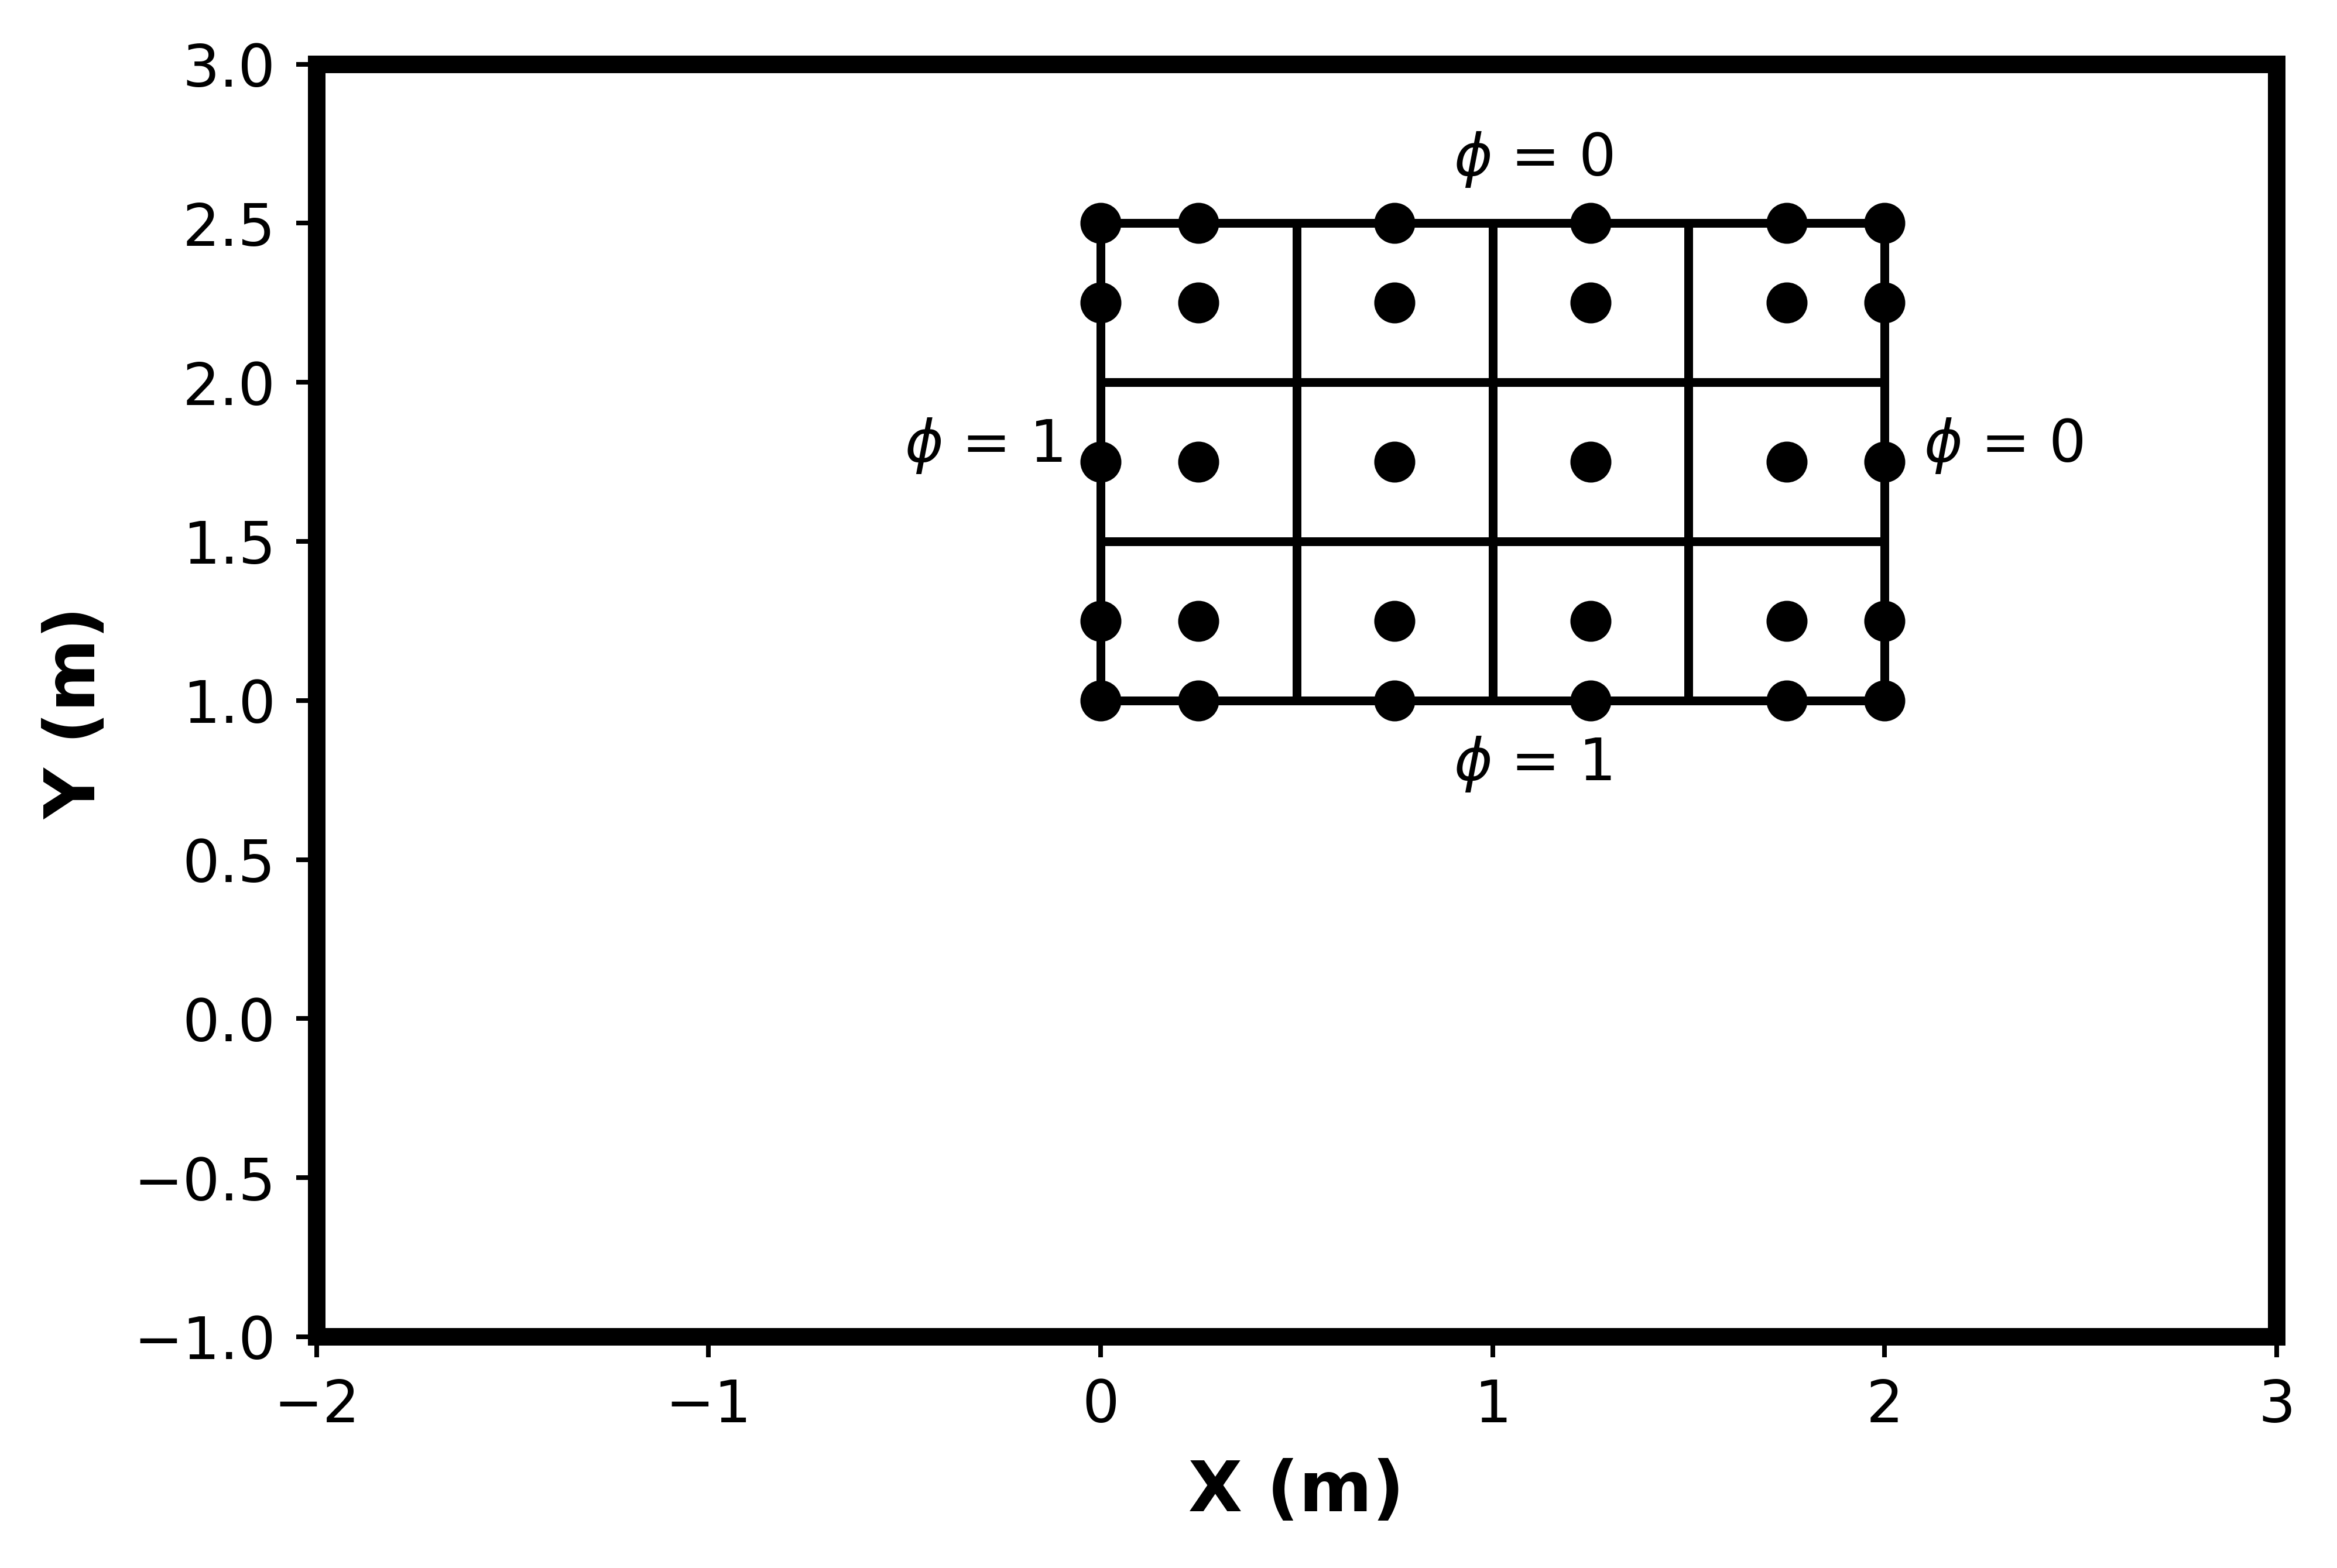

In [31]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
x,y = np.meshgrid([0,.25,.75,1.25,1.75,2],[1,1,1,1,1,1])
dy=0
for i in range(0,5):
    plt.scatter([0,.25,.75,1.25,1.75,2],[1+dy,1+dy,1+dy,1+dy,1+dy,1+dy],marker='o',color='black')
    if (i==0):
     dy=dy+0.25
    elif(i==3):
        dy=dy+0.25
    else:
        dy=dy+0.5
plt.plot([0,.25,.75,1.25,1.75,2],[1,1,1,1,1,1],color='black')
plt.plot([0,.25,.75,1.25,1.75,2],[1+dy-.5,1+dy-.5,1+dy-.5,1+dy-.5,1+dy-.5,1+dy-.5],color='black')
plt.plot([0,0,0,0,0],[1,1.25,1.75,2.25,2.5],color='black')
plt.plot([2,2,2,2,2],[1,1.25,1.75,2.25,2.5],color='black')
plt.plot([0,.25,.75,1.25,1.75,2],[2,2,2,2,2,2],color='black')
plt.plot([0,.25,.75,1.25,1.75,2],[1.5,1.5,1.5,1.5,1.5,1.5],color='black')
dy=0.5
for i in range(0,3):
    plt.plot([0+dy,0+dy,0+dy,0+dy,0+dy],[1,1.25,1.75,2.25,2.5],color='black')
    dy=dy+0.5

plt.xlim(-2,3)
plt.ylim(-1,3)
plt.text(.90,.75,'$\phi $ = 1')
plt.text(.90,2.65,'$\phi $ = 0')
plt.text(2.1,1.75,'$\phi $ = 0')
plt.text(-0.5,1.75,'$\phi $ = 1')
'''    
plt.plot([0,.25,.75,1.25,1.75,2],[1.02,1.02,1.02,1.02,1.02,1.02],linestyle='--',color='black')
plt.plot([0,.25,.75,1.25,1.75,2],0.98*np.ones((6,)),linestyle='--',color='black')
plt.plot(np.zeros((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot(2*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((.25+.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((1.25+.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.plot((1.25+1.75)*0.5*np.ones((8,)),np.linspace(0.98,1.02,8),linestyle='--',color='black')
plt.xlim(-0.4,2.4)

plt.text(1.25,.99,'E')
plt.text(0.25,.99,'W')
plt.text(.75,.99,'P')
plt.text(1,1.01,'e')
plt.text(0.5,1.01,'w')
plt.text(.98,0.975,'$ \u0394 $ $x_e$')
plt.text(0.73,.985,'$ \Delta $ $x $')


arrow = arrow = patches.FancyArrowPatch((0.75, 0.97), (1.25, 0.97), arrowstyle='<->', mutation_scale=20)
plt.gca().add_patch(arrow)
arrow1 = patches.FancyArrowPatch((0.5, 0.99), (1, 0.99), arrowstyle='<->', mutation_scale=20)
plt.gca().add_patch(arrow1)
'''

# ENDSEM

## Ques 1

In [2]:
# radial limits of shell
r_min=1
r_max=3
# number of CV in thetaa and radial direction
n_cv_theta= 50 # number of nodes in theta direction will be similar to it
n_cv_r=20 # num of nodes in radial direction = CV in radial +2 --> need to incorporate the Boundary nodes
d_theta=2*np.pi/n_cv_theta
dr=(r_max - r_min)/n_cv_r
r_face=r_min*np.ones((n_cv_r+1,)) # in r direction for rn and rs
r_points=r_min*np.ones((n_cv_r+2,)) # for re and rw
for i in range(1,n_cv_r+1):
    r_face[i]=r_face[i-1]+dr
for i in range(1,n_cv_r+2):
    if ( i ==1 or i== (n_cv_r+1)):
        x=dr/2
    else:
        x=dr
    r_points[i]=r_points[i-1]+x
r_theta=np.zeros((n_cv_theta,))
for i in range(0,n_cv_theta):
    if ( i ==0 or i== (n_cv_theta-1)):
        x=d_theta/2
    else:
        x=d_theta
    r_theta[i]=r_theta[i-1]+x
#defining aE aand aN
aE=np.zeros((n_cv_theta,n_cv_r+2))
aN=np.zeros((n_cv_theta,n_cv_r+1))
for j in range(1,n_cv_r+2):
    for i in range(0,n_cv_theta):
        aE[i,j]=dr/(r_points[j]*d_theta)

for i in range(0,n_cv_theta):
    for j in range(0,n_cv_r+1):
        aN[i,j]=r_face[j]*d_theta/(r_points[j+1]-r_points[j])

#defining aP
aP=np.zeros((n_cv_theta,n_cv_r+2))
for i in range(0,n_cv_theta):
    for j in range(1,n_cv_r+1):
        aP[i,j]=aE[i,j]+aE[i-1,j]+aN[i,j]+aN[i,j-1]

#Define matrix fro temperature
T_r_min=35
T_r_max=125
T=np.ones((n_cv_theta,n_cv_r+2))
T[:,0]=T_r_min
T[:,n_cv_r+1]=T_r_max
Told=T.copy()

error=1
convg=1e-7
iter=0
while (error>convg):
    for i in range(0,n_cv_theta):
        for j in range(1,n_cv_r+1):
            if(i==0):
                T[i,j]=(1/aP[i,j])*(aE[i+1,j]*T[i+1,j]+aE[i,j]*T[n_cv_theta-1,j]+aN[i,j]*T[i,j+1]+aN[i,j-1]*T[i,j-1])
            elif(i==(n_cv_theta-1)):
                T[i,j]=(1/aP[i,j])*(aE[0,j]*T[0,j]+aE[i,j]*T[i-1,j]+aN[i,j]*T[i,j+1]+aN[i,j-1]*T[i,j-1])
            else:
                T[i,j]=(1/aP[i,j])*(aE[i+1,j]*T[i+1,j]+aE[i,j]*T[i-1,j]+aN[i,j]*T[i,j+1]+aN[i,j-1]*T[i,j-1])
    error = np.amax(np.abs(T-Told))
    Told=T.copy()
    iter=iter+1


In [45]:
T

array([[100.        ,  95.67364733,  87.56173611,  79.92699621,
         72.71640861,  65.88532573,  59.39579711,  53.21529376,
         47.3157225 ,  41.67265444,  36.2647143 ,  31.07309184,
         26.08114723,  21.2740895 ,  16.63871243,  12.16317596,
         10.        ],
       [100.        ,  95.67364733,  87.56173611,  79.92699621,
         72.71640862,  65.88532574,  59.39579711,  53.21529377,
         47.3157225 ,  41.67265444,  36.2647143 ,  31.07309184,
         26.08114723,  21.2740895 ,  16.63871243,  12.16317596,
         10.        ],
       [100.        ,  95.67364733,  87.56173611,  79.92699621,
         72.71640862,  65.88532574,  59.39579711,  53.21529377,
         47.31572251,  41.67265444,  36.2647143 ,  31.07309185,
         26.08114724,  21.27408951,  16.63871243,  12.16317596,
         10.        ],
       [100.        ,  95.67364733,  87.56173611,  79.92699621,
         72.71640862,  65.88532574,  59.39579712,  53.21529377,
         47.31572251,  41.67265445,

In [3]:
#analytical
r_analytical=np.linspace(r_min,r_max,100)
Tanaly=np.ones((100,))
for i in range(0,100):
    Tanaly[i] = T_r_min +(T_r_max-T_r_min)*math.log(r_analytical[i]/r_min)/math.log(r_max/r_min)
    

In [5]:
Tanaly

array([100.        ,  95.74248567,  87.62468286,  79.98468208,
        72.7693507 ,  65.93395391,  59.44047319,  53.25632568,
        47.35337494,  41.70715695,  36.29626763,  31.10187283,
        26.10731269,  21.29777939,  16.66005233,  12.18227916,
        10.        ])

In [6]:
r_points

array([10.        , 10.33333333, 11.        , 11.66666667, 12.33333333,
       13.        , 13.66666667, 14.33333333, 15.        , 15.66666667,
       16.33333333, 17.        , 17.66666667, 18.33333333, 19.        ,
       19.66666667, 20.        ])

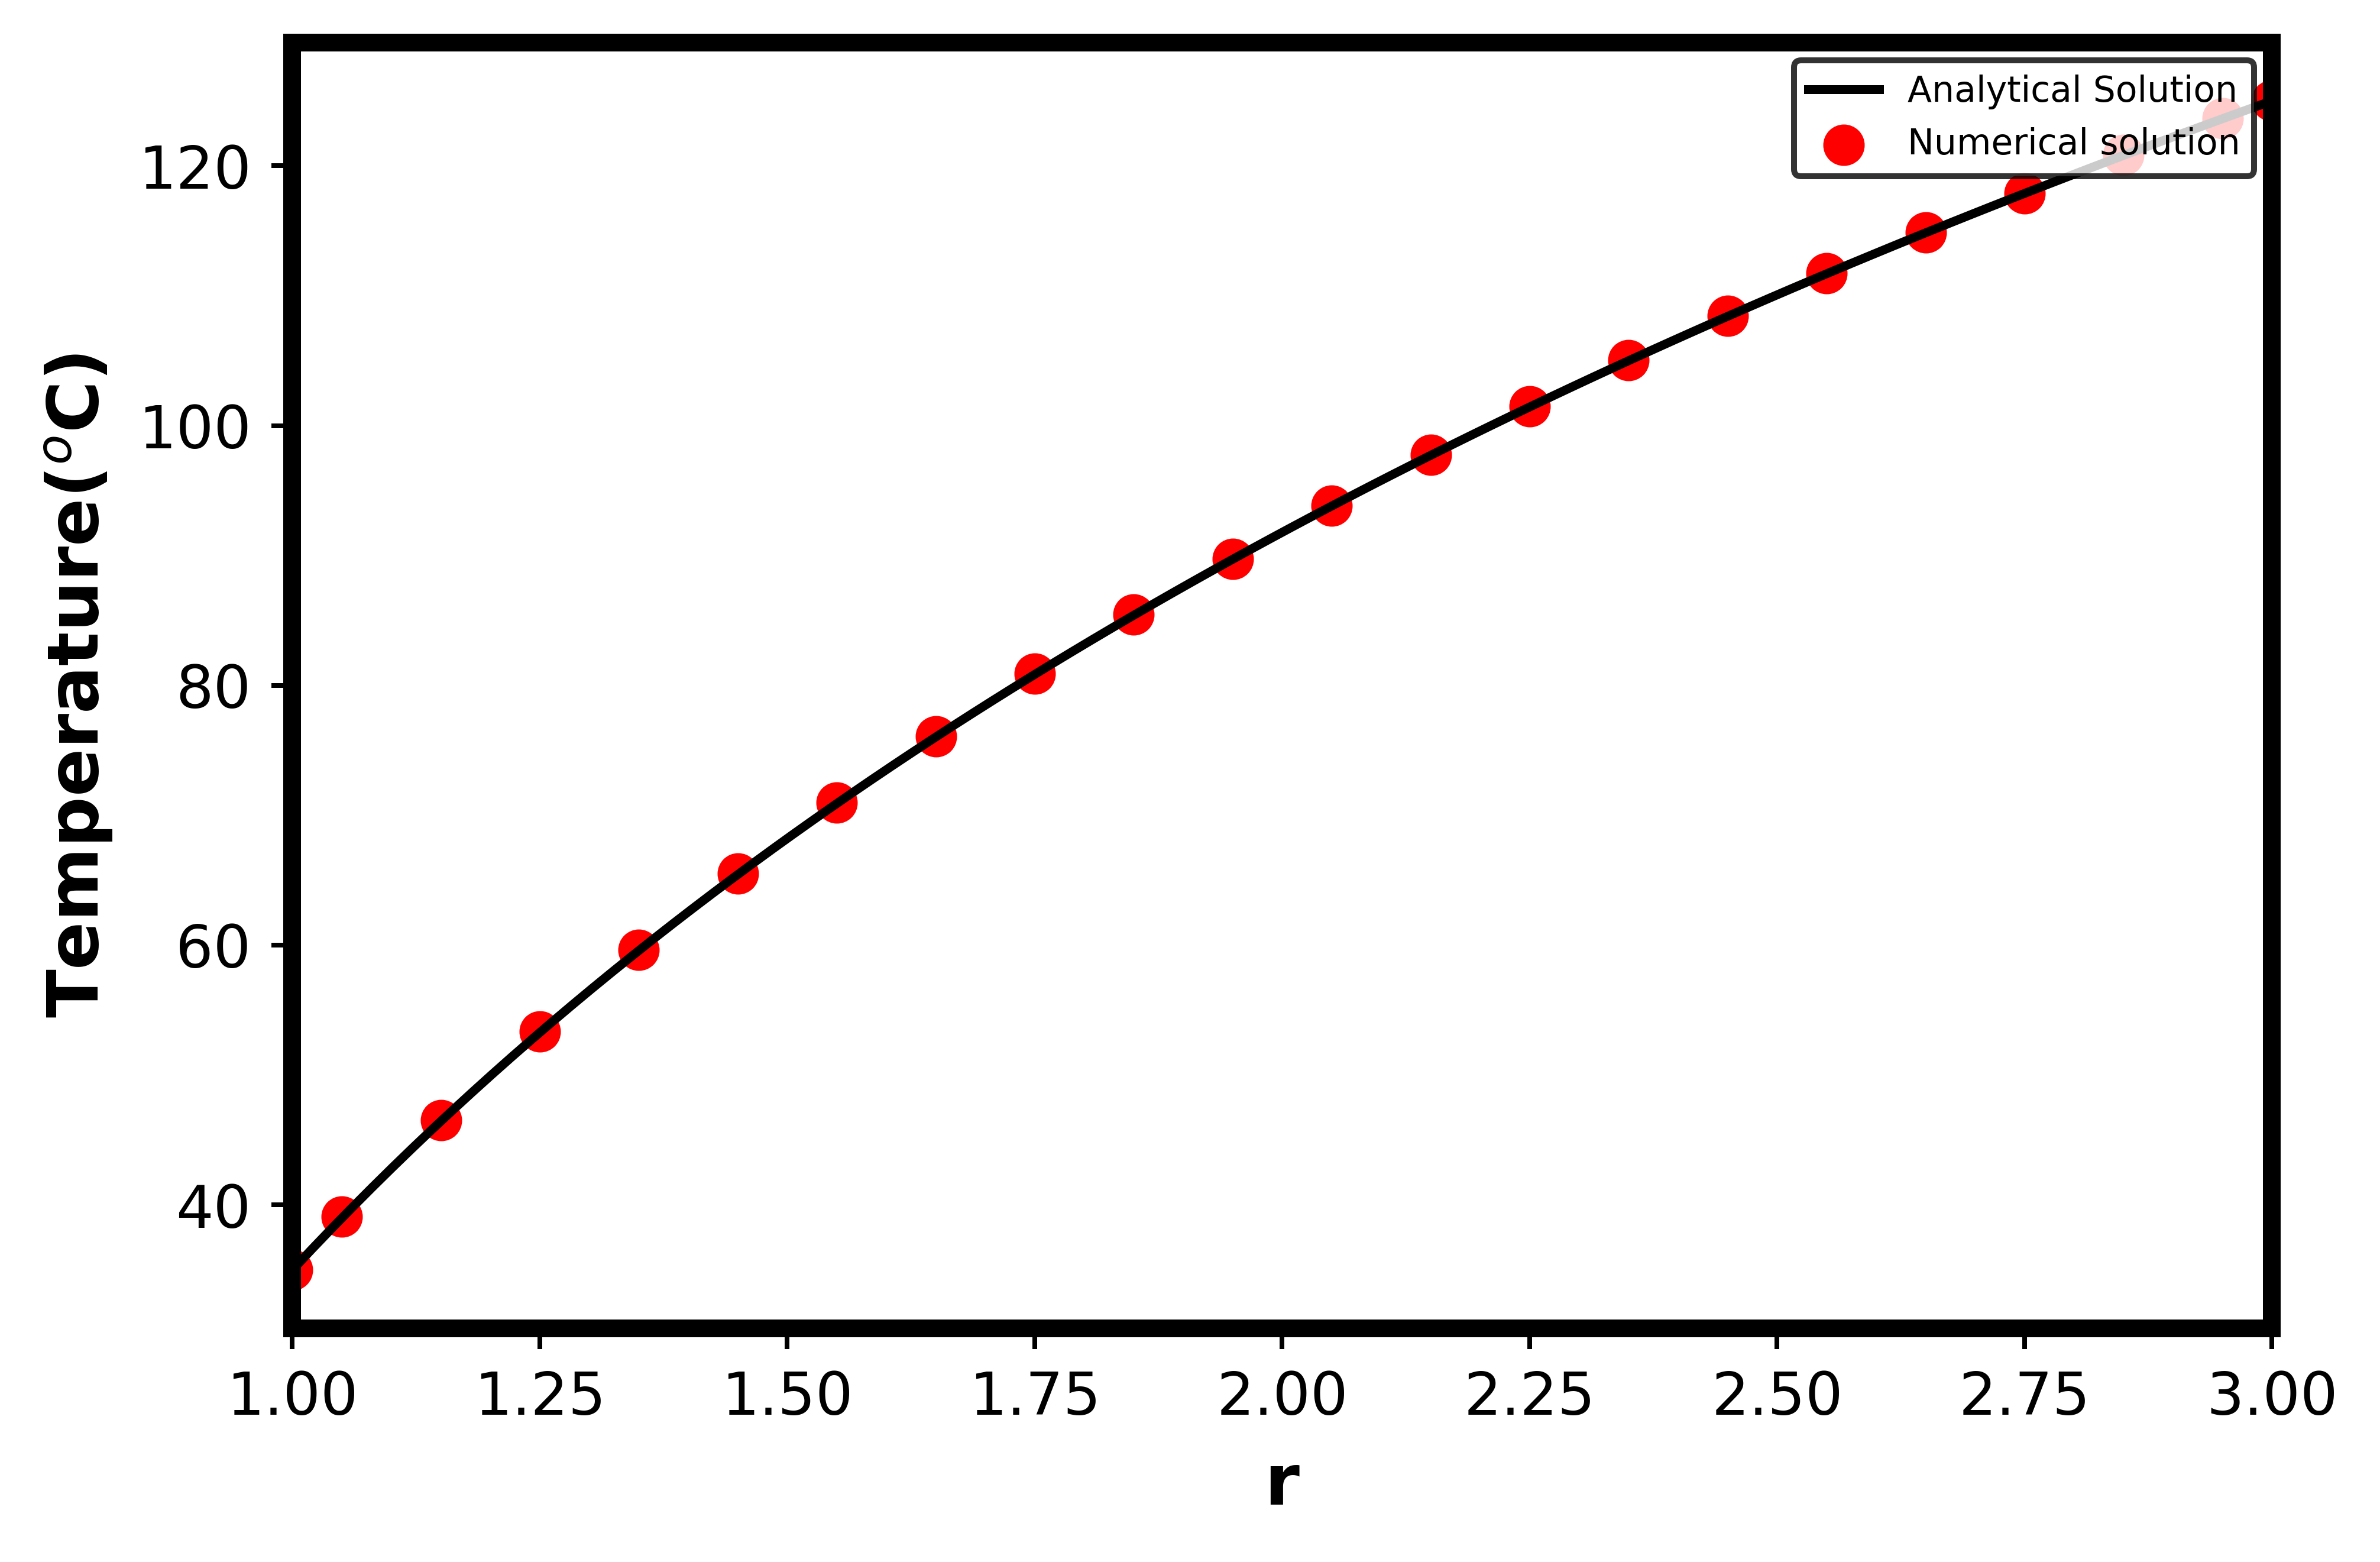

In [4]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' r ',fontsize=12,fontweight='bold')
plt.ylabel('Temperature($^o$C)',fontsize=12,fontweight='bold')
plt.xlim(left=r_min,right=r_max)
#plt.ylim(top=max(T_r_min,T_r_max)+2,bottom=min(T_r_min,T_r_max)-2)
plt.plot(r_analytical,Tanaly,label='Analytical Solution',color='black')
plt.scatter(r_points,T[2,:],label='Numerical solution',color='red',marker='o')
plt.legend(edgecolor='black',loc='upper right',fontsize=6)

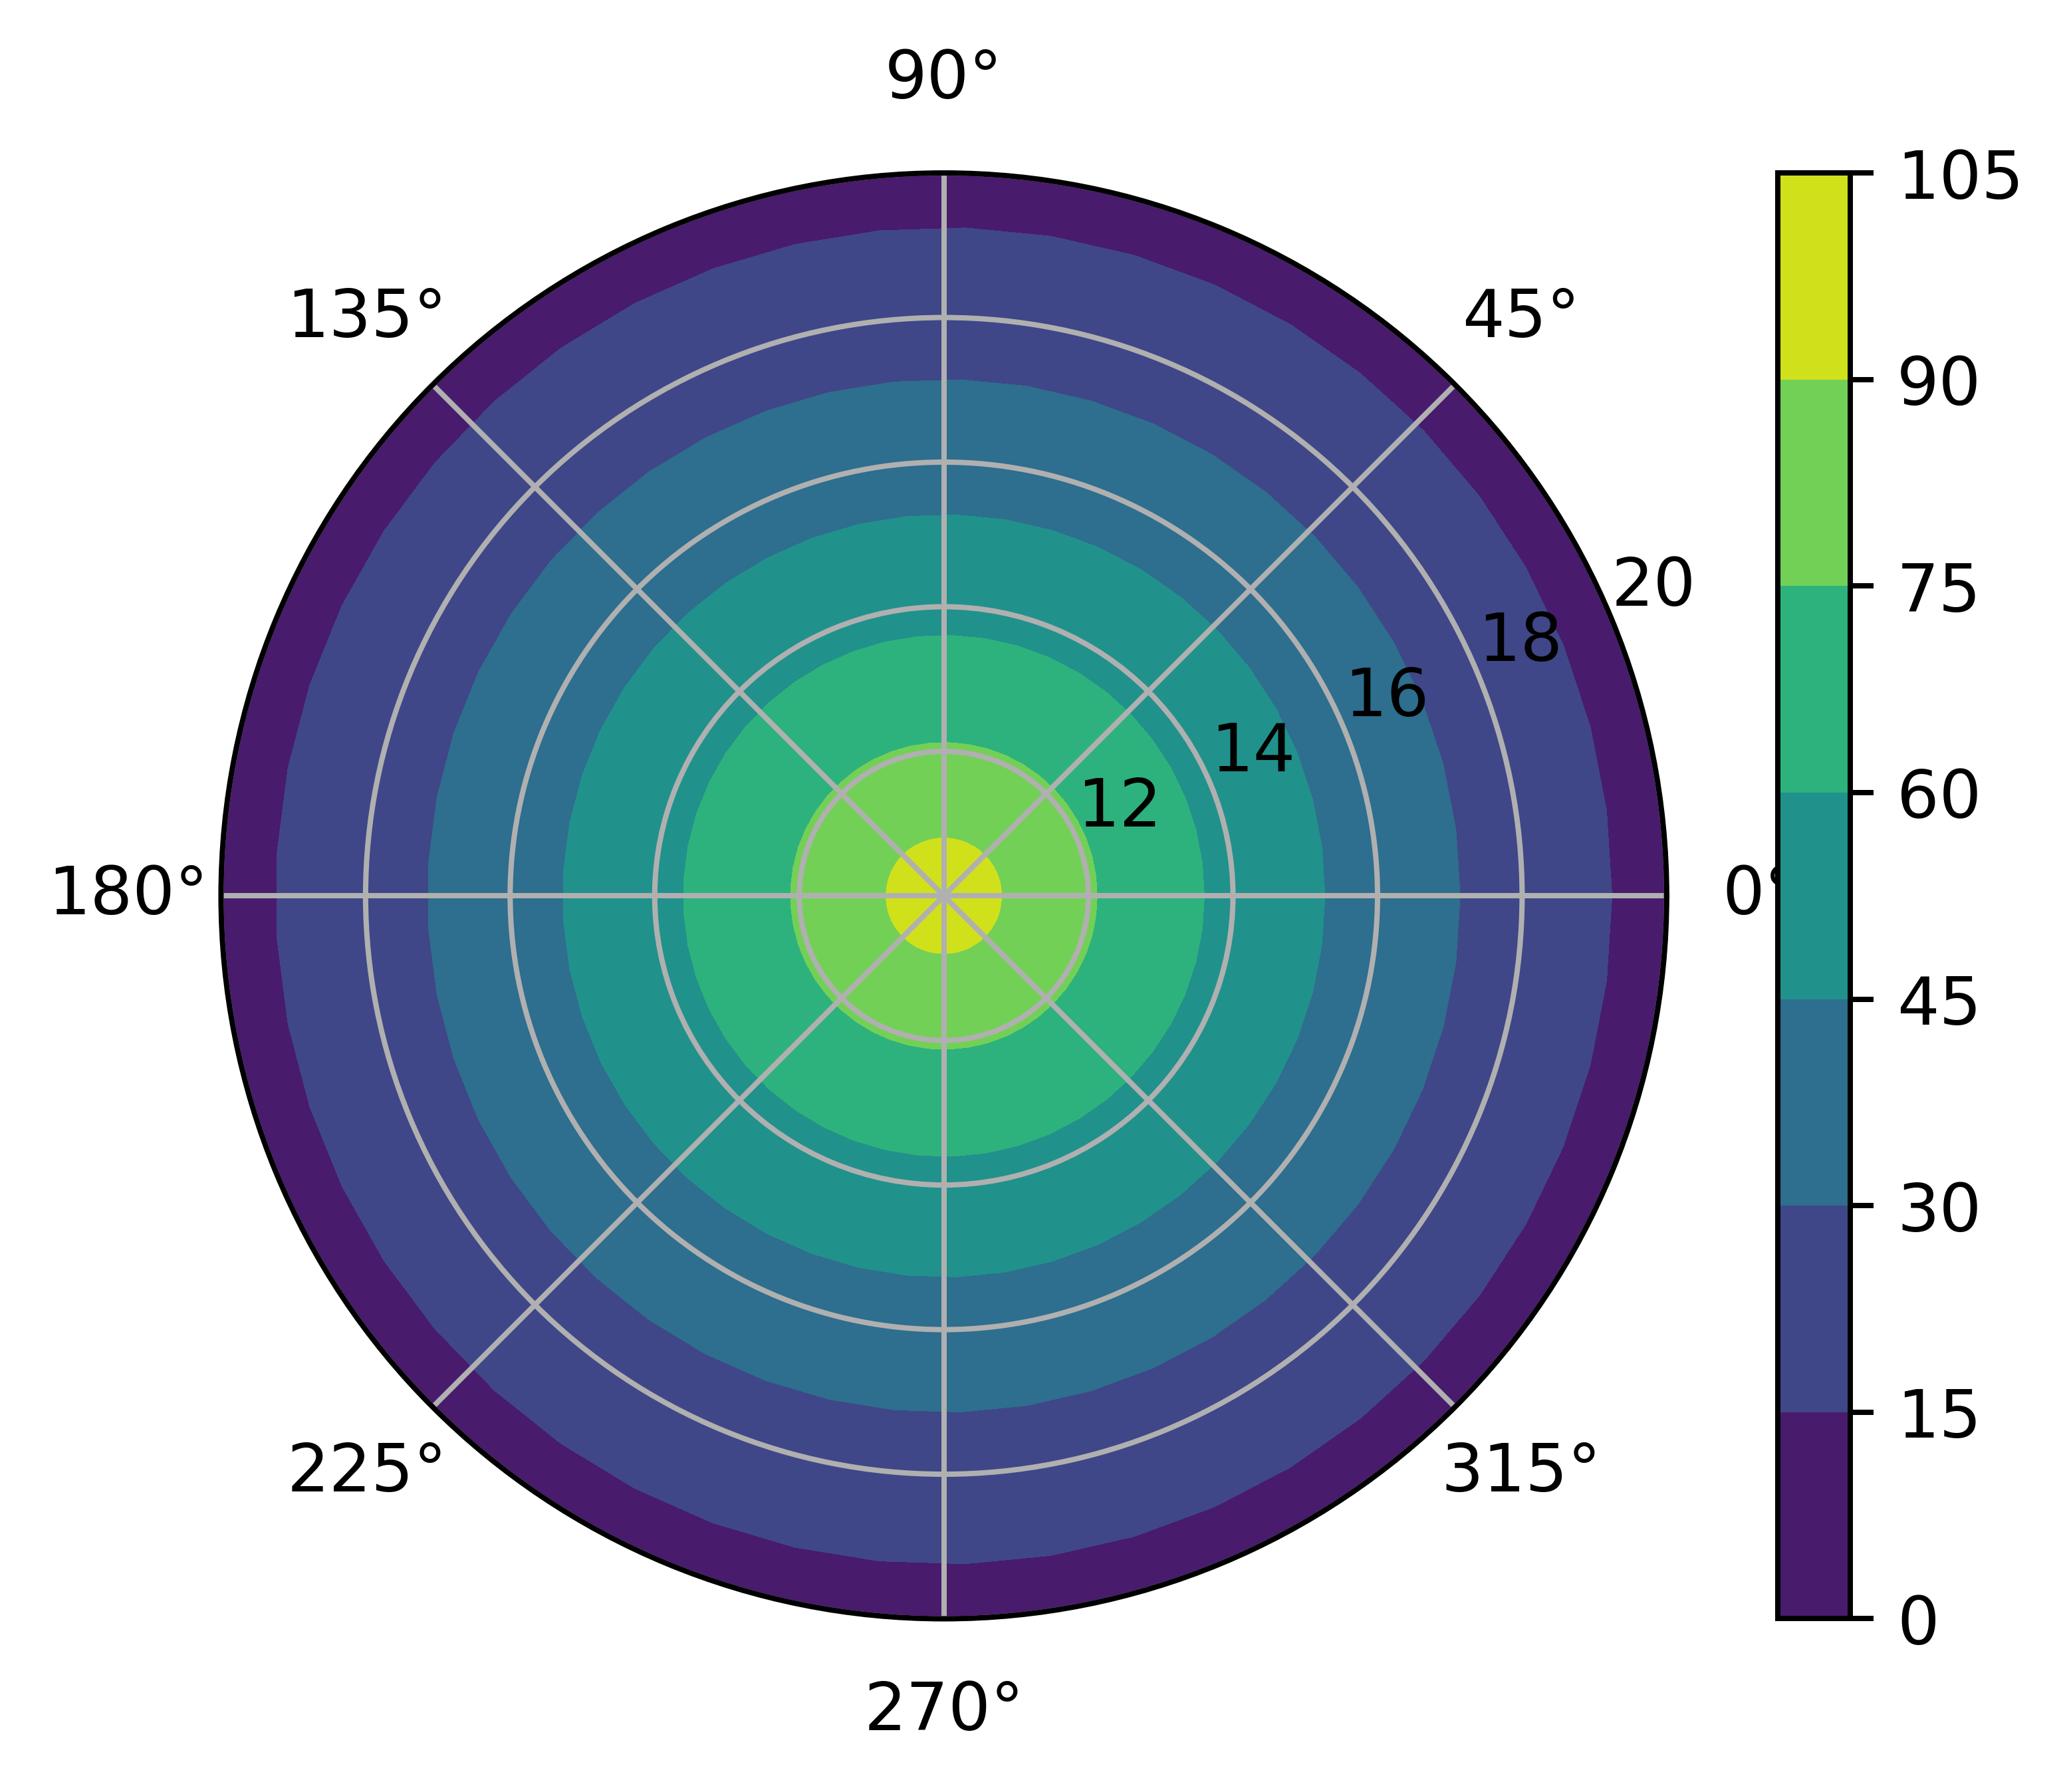

In [26]:
r, theta = np.meshgrid(r_points,np.radians(np.linspace(0, 360, n_cv_theta)))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),dpi=720)
cax=ax.contourf(theta,r, T)
fig.colorbar(cax)


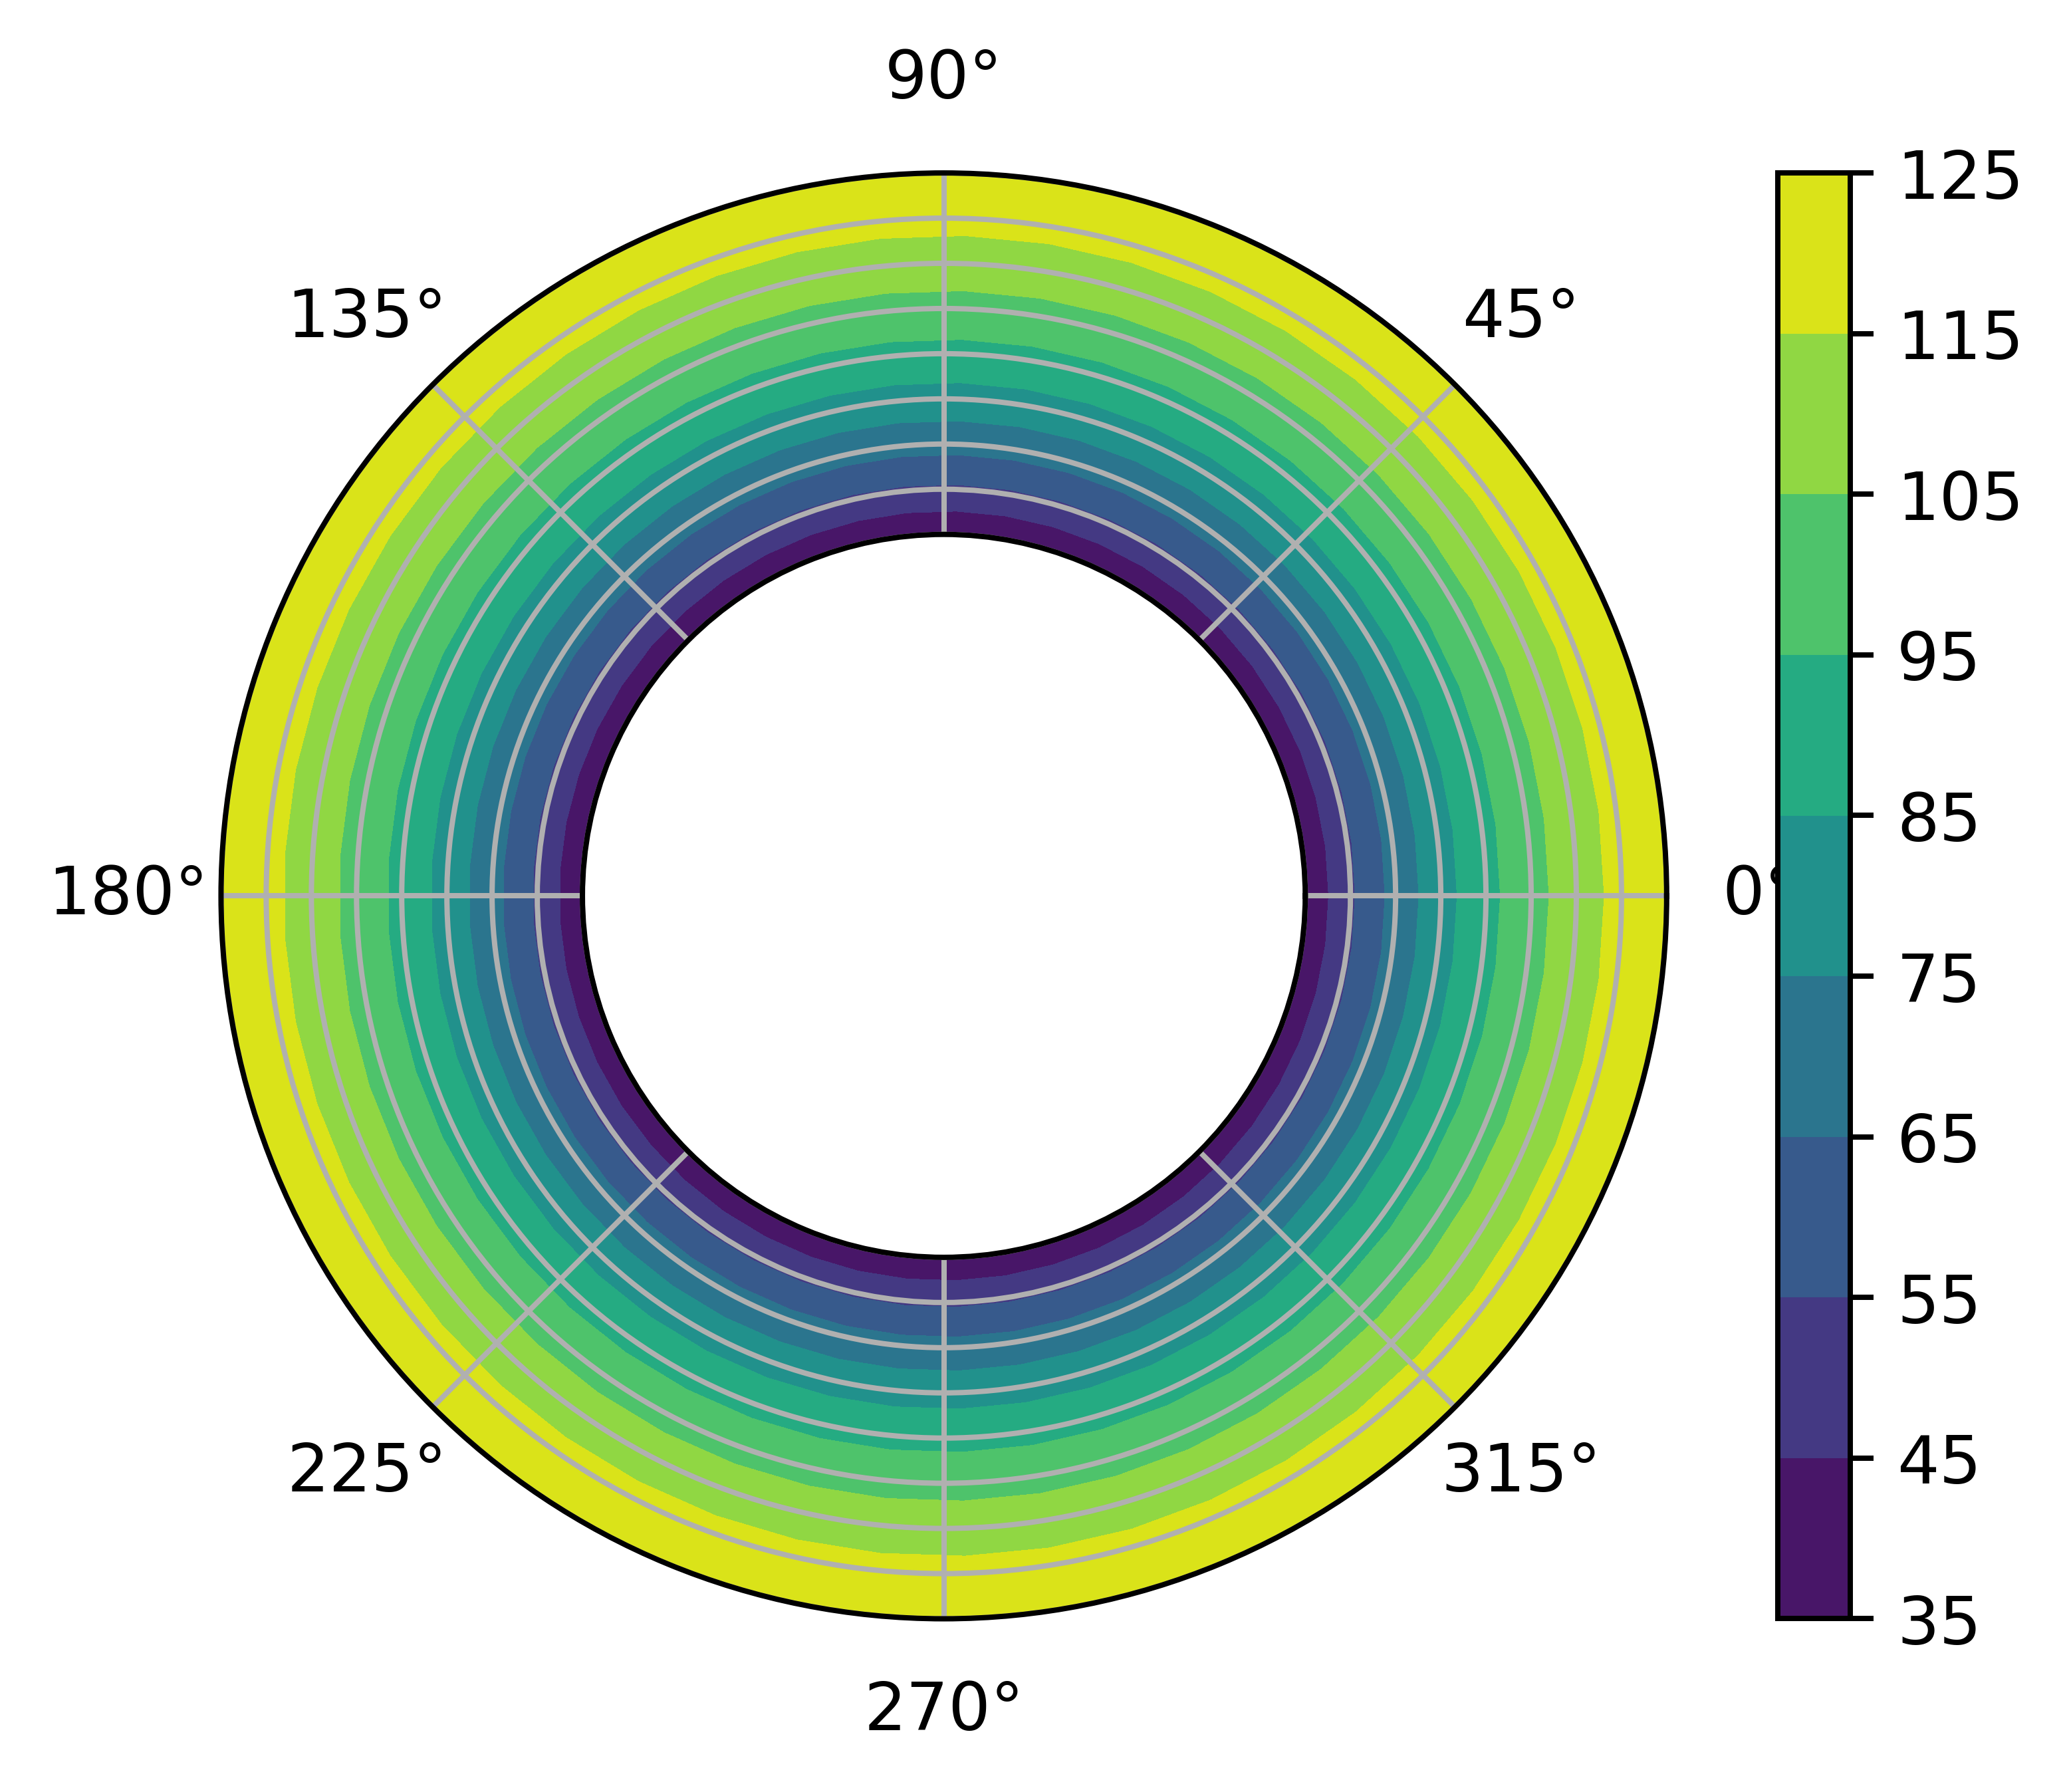

In [6]:
r, theta = np.meshgrid(r_points,np.radians(np.linspace(0, 360, n_cv_theta)))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),dpi=720)
ax.set_rorigin(-1)
levels = np.linspace(min(T_r_max,T_r_min), max(T_r_max,T_r_min), 10)
cax=ax.contourf(theta,r, T,levels=levels)
ax.set_yticklabels([])
fig.colorbar(cax)


In [22]:
r

array([[10.        , 10.33333333, 11.        , 11.66666667, 12.33333333,
        13.        , 13.66666667, 14.33333333, 15.        , 15.66666667,
        16.33333333, 17.        , 17.66666667, 18.33333333, 19.        ,
        19.66666667, 20.        ],
       [10.        , 10.33333333, 11.        , 11.66666667, 12.33333333,
        13.        , 13.66666667, 14.33333333, 15.        , 15.66666667,
        16.33333333, 17.        , 17.66666667, 18.33333333, 19.        ,
        19.66666667, 20.        ],
       [10.        , 10.33333333, 11.        , 11.66666667, 12.33333333,
        13.        , 13.66666667, 14.33333333, 15.        , 15.66666667,
        16.33333333, 17.        , 17.66666667, 18.33333333, 19.        ,
        19.66666667, 20.        ],
       [10.        , 10.33333333, 11.        , 11.66666667, 12.33333333,
        13.        , 13.66666667, 14.33333333, 15.        , 15.66666667,
        16.33333333, 17.        , 17.66666667, 18.33333333, 19.        ,
        19.66666667

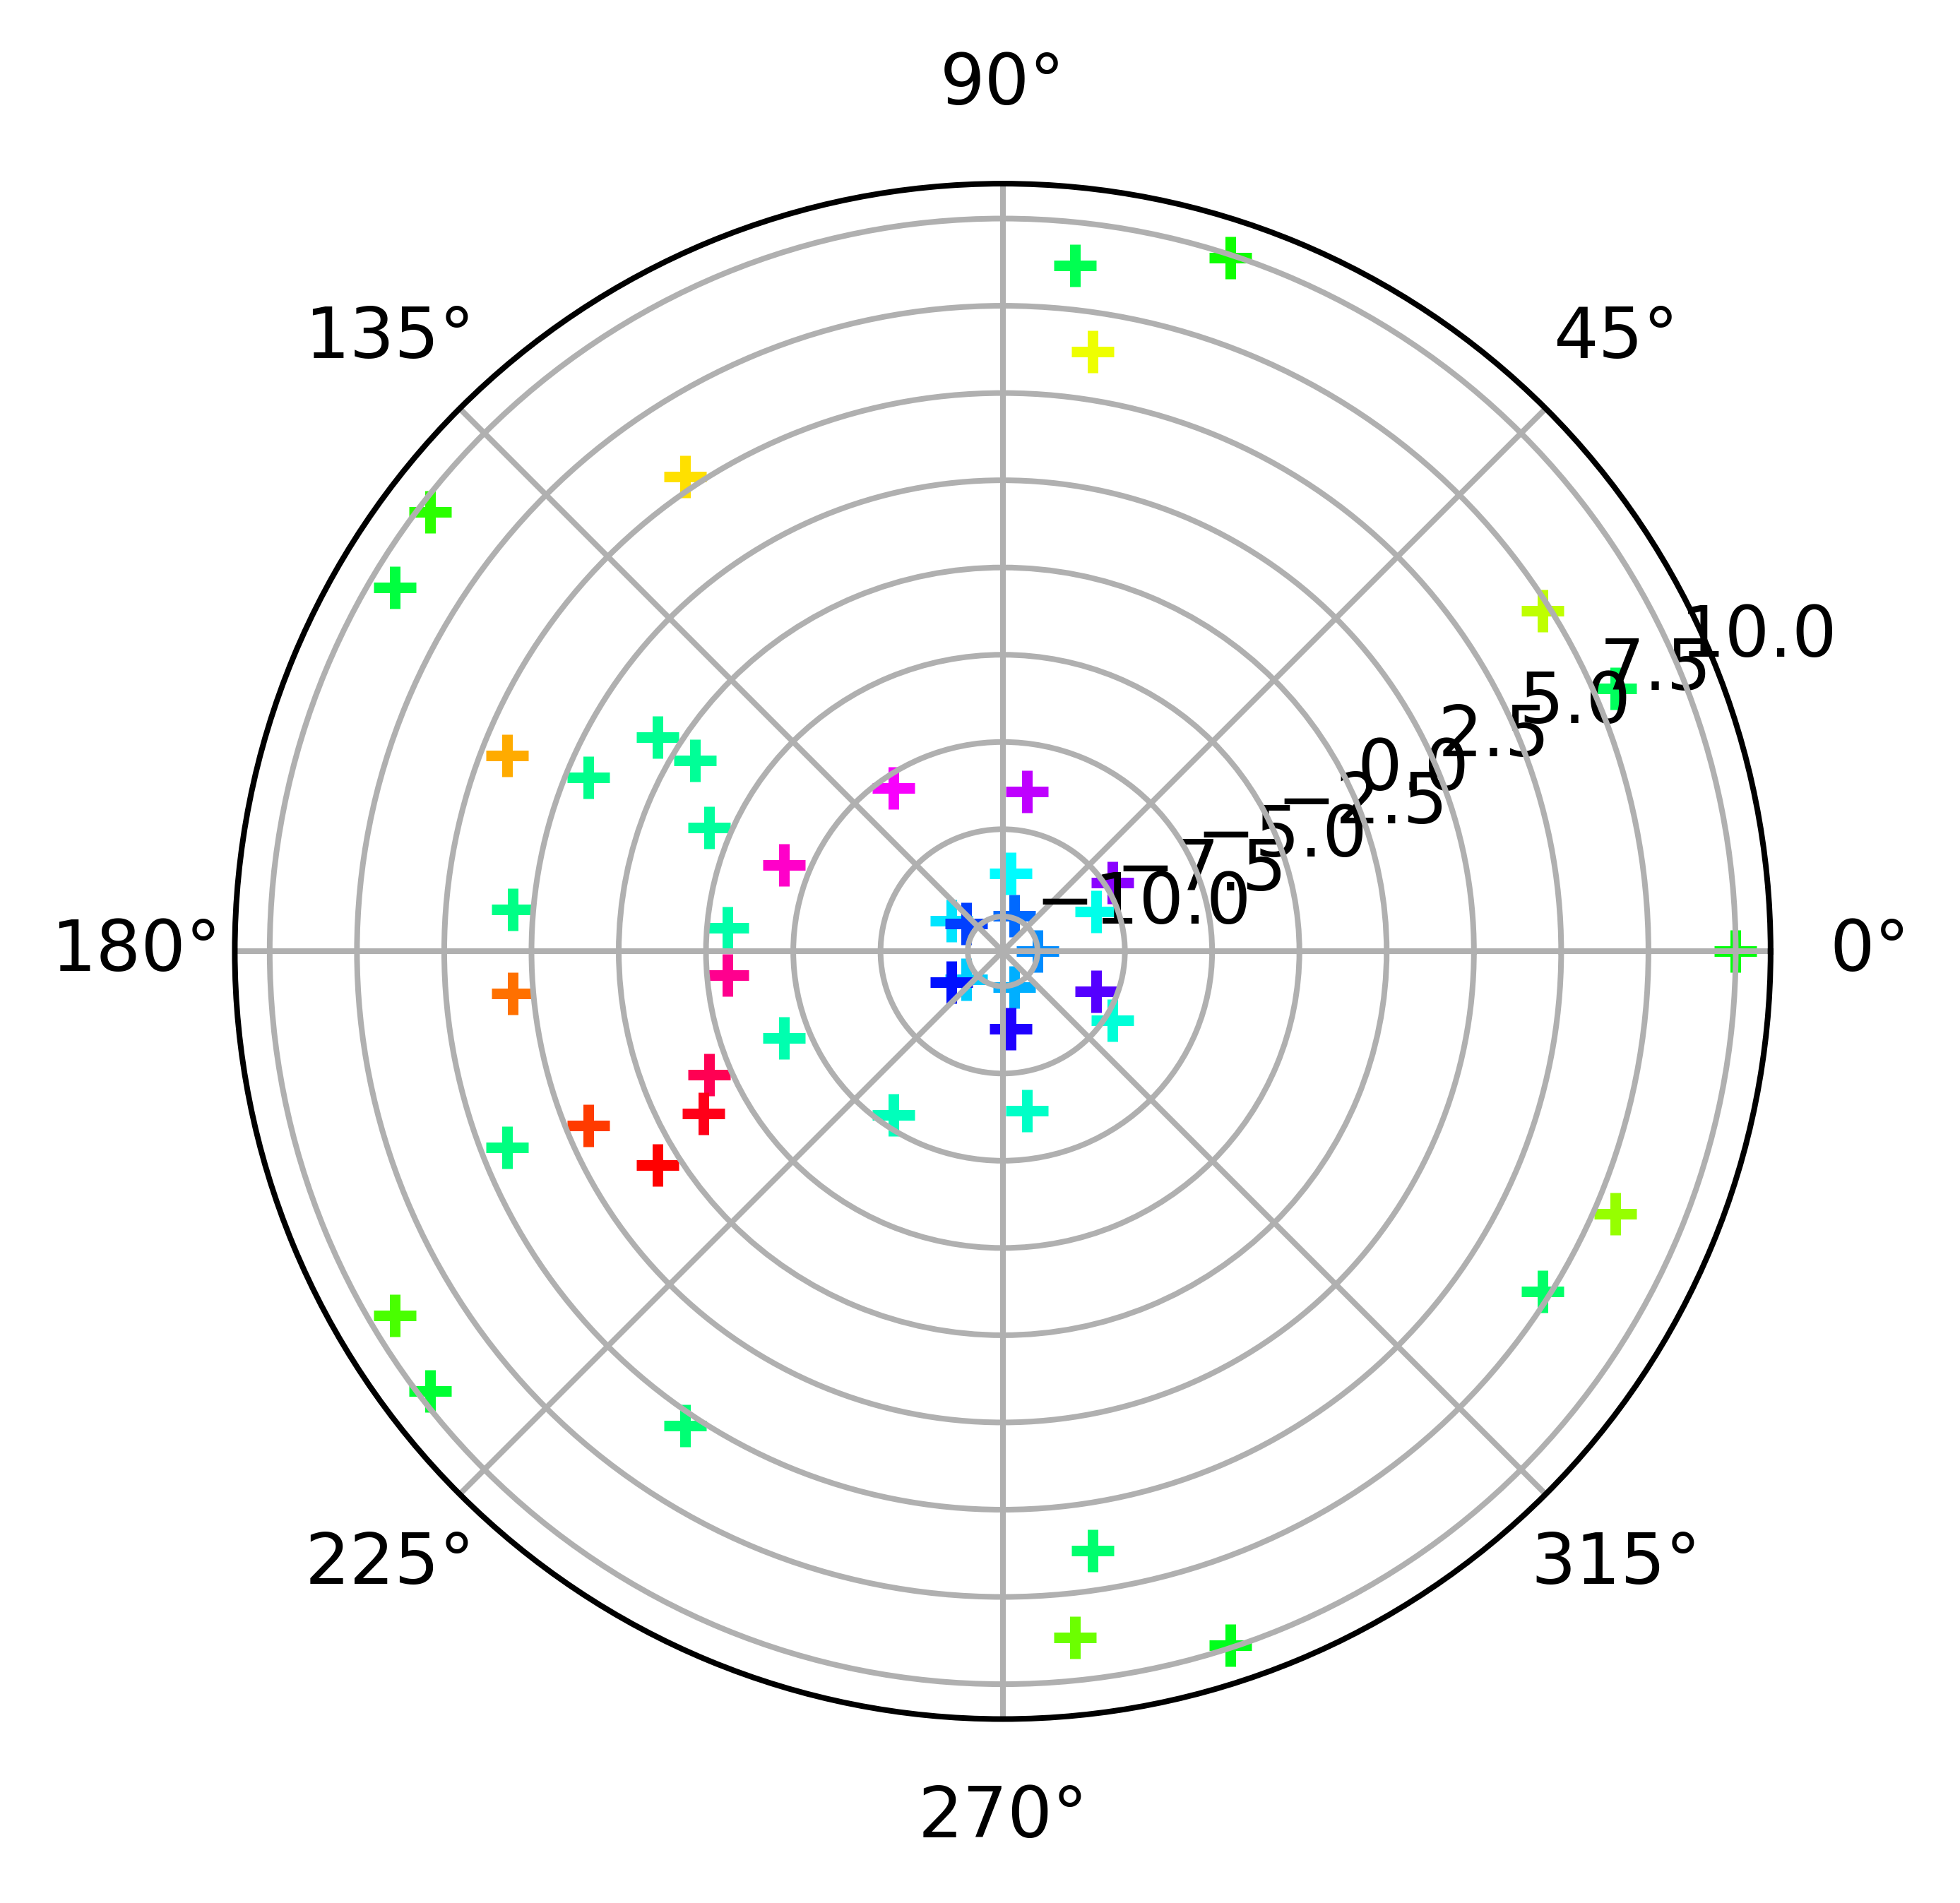

In [33]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),dpi=720)
# plot scatter
ax.scatter(10*np.cos(r_theta), 10*np.sin(r_theta), c=T[:,2], marker='+', cmap='hsv')


In [35]:
T[2,:]

array([100.        ,  95.67364733,  87.56173611,  79.92699621,
        72.71640862,  65.88532574,  59.39579711,  53.21529377,
        47.31572251,  41.67265444,  36.2647143 ,  31.07309185,
        26.08114724,  21.27408951,  16.63871243,  12.16317596,
        10.        ])

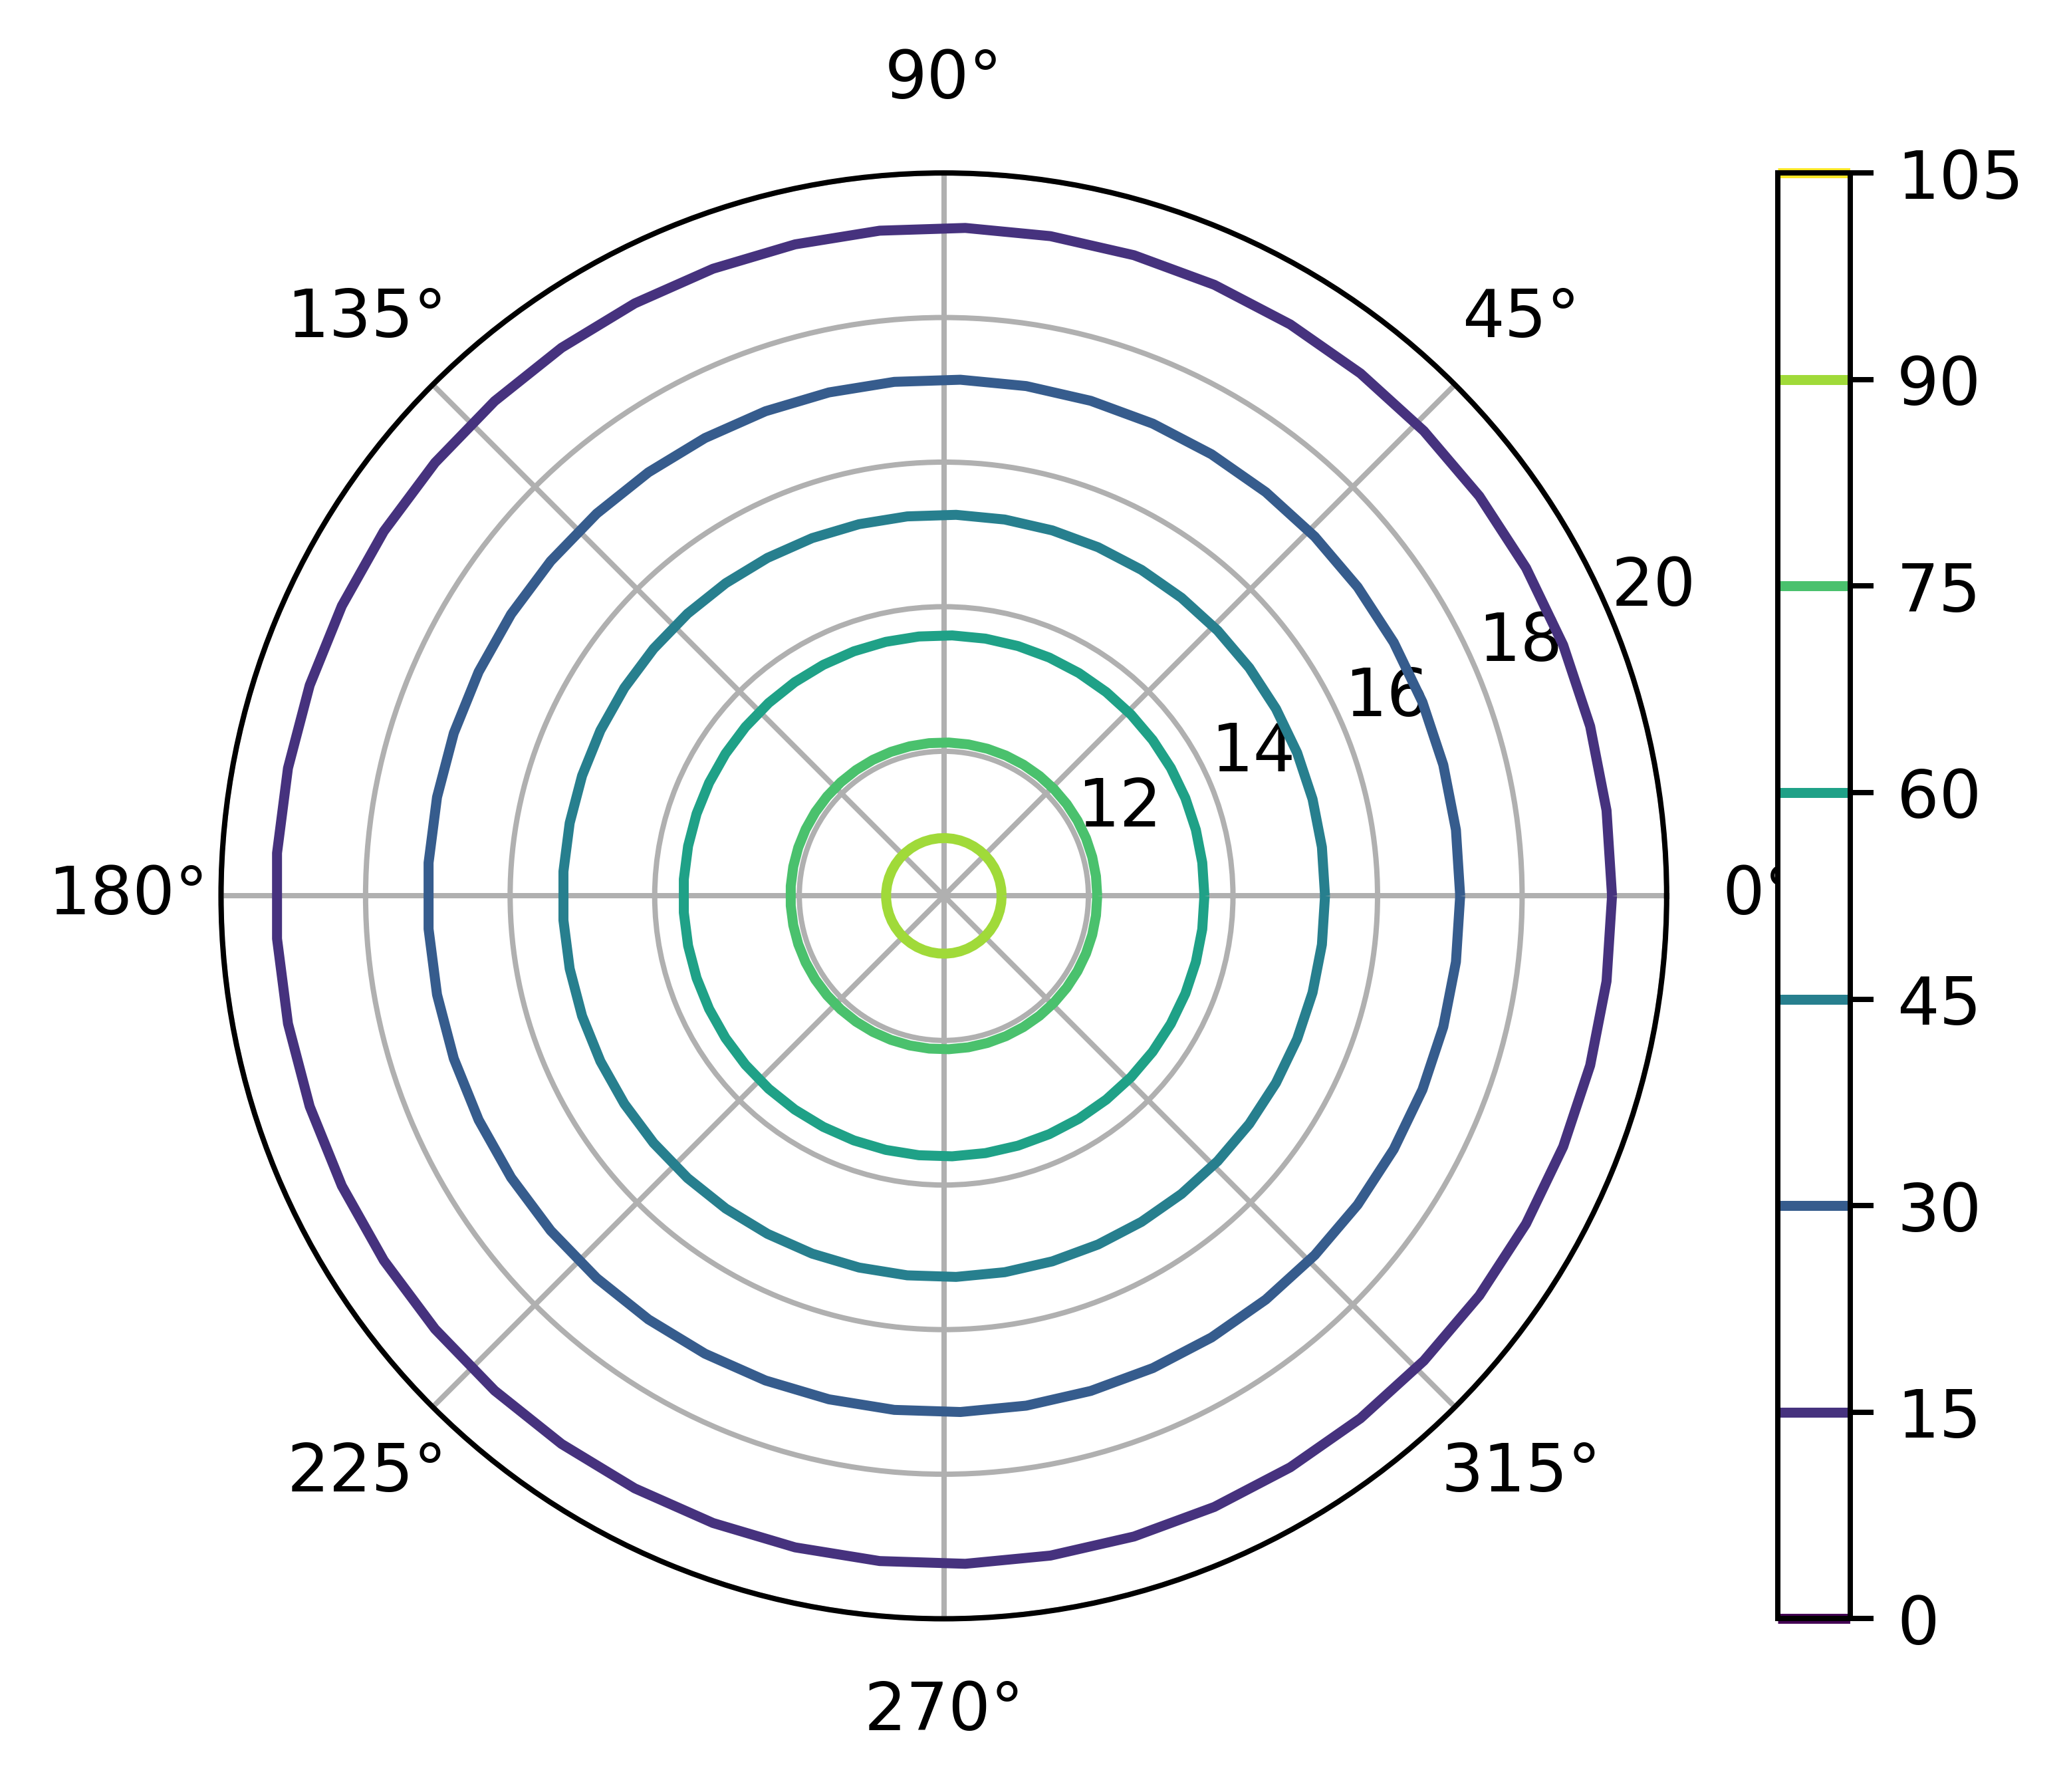

In [36]:
r, theta = np.meshgrid(r_points,np.radians(np.linspace(0, 360, n_cv_theta)))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),dpi=720)
cax=ax.contour(theta,r, T)
fig.colorbar(cax)

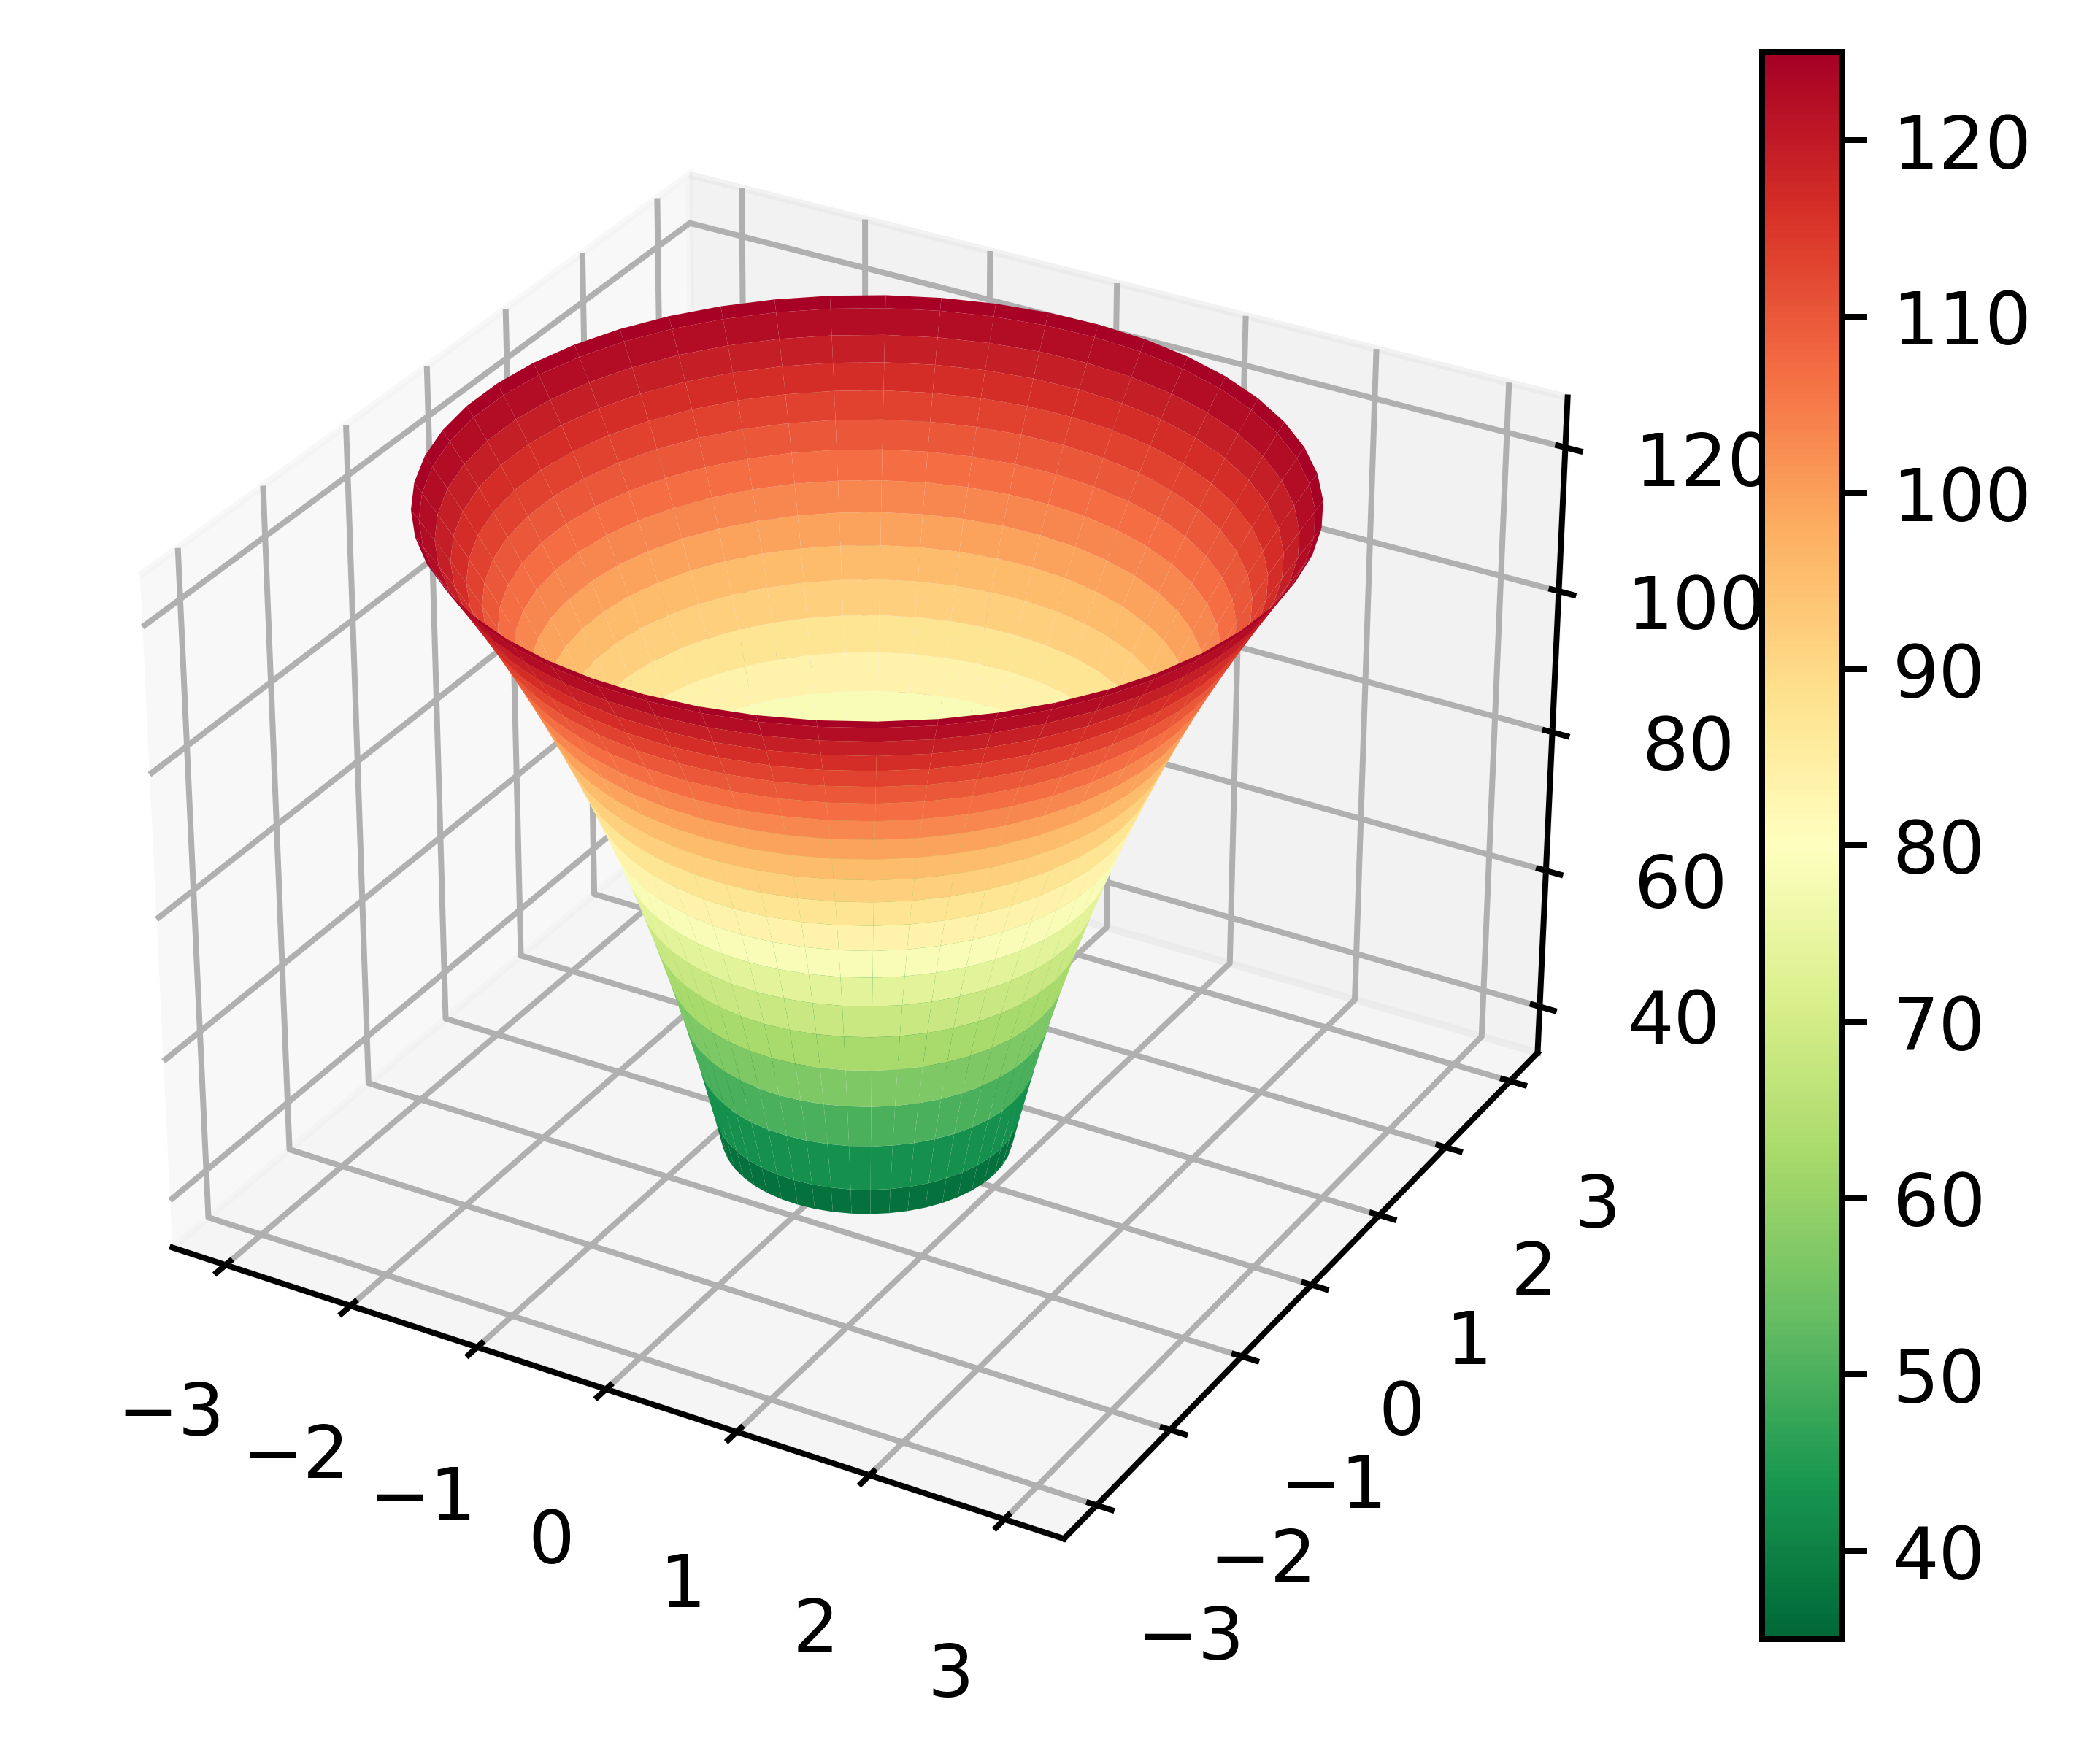

In [8]:
from mpl_toolkits.mplot3d import Axes3D 
 
 
 
fig = plt.figure(dpi=720)
ax = fig.add_subplot(111, projection='3d')
 
 
R, P = np.meshgrid(r_points, np.radians(np.linspace(0, 360, n_cv_theta)))
Z = ((R**2 - 0.5)**2)
 
X, Y = R*np.cos(P), R*np.sin(P)
 
cax=ax.plot_surface(X, Y, T, cmap=plt.cm.RdYlGn_r)
#ax.view_init(azim=0, elev=90)
fig.colorbar(cax)
cax.set_clim(35,125)
plt.grid(False)
plt.show()


## Ques 2

In [23]:
# radial limits of shell
r_min=0
r_max=2
# number of CV in thetaa and radial direction
n_cv_theta= 40 # number of nodes in theta direction will be similar to it ---> here we will define this for till pi only**** --> so that we have CV face at 0 and pi theta value
n_cv_r=18 # num of nodes in radial direction = CV in radial +2 --> need to incorporate the Boundary nodes
d_theta=np.pi/n_cv_theta
dr=(r_max - r_min)/n_cv_r
r_face=r_min*np.ones((n_cv_r+1,)) # in r direction for rn and rs
r_points=r_min*np.ones((n_cv_r+2,)) # for re and rw
for i in range(1,n_cv_r+1):
    r_face[i]=r_face[i-1]+dr
for i in range(1,n_cv_r+2):
    if ( i ==1 or i== (n_cv_r+1)):
        x=dr/2
    else:
        x=dr
    r_points[i]=r_points[i-1]+x

#defining aE aand aN
aE=np.zeros((2*n_cv_theta,n_cv_r+2))
aN=np.zeros((2*n_cv_theta,n_cv_r+1))
for j in range(1,n_cv_r+2):
    for i in range(0,2*n_cv_theta):
        aE[i,j]=dr/(r_points[j]*d_theta)
for i in range(0,2*n_cv_theta):
    for j in range(0,n_cv_r+1):
        aN[i,j]=r_face[j]*d_theta/(r_points[j+1]-r_points[j])
#defining aP
aP=np.zeros((2*n_cv_theta,n_cv_r+2))
for i in range(0,2*n_cv_theta):
    for j in range(1,n_cv_r+1):
        aP[i,j]=aE[i,j]+aE[i-1,j]+aN[i,j]+aN[i,j-1]

#BC for temperature
T_lower=0
T_upper=1

T=np.ones((2*n_cv_theta,n_cv_r+2))
T[0:n_cv_theta,n_cv_r+1]=T_upper
T[n_cv_theta:2*n_cv_theta,n_cv_r+1]=T_lower
T_old=T.copy()

error=1
convg=1e-7
iter=0
while (error>convg):
    for i in range(0,2*n_cv_theta):
        for j in range(1,n_cv_r+1):
            if(i==0):
                T[i,j]=(1/aP[i,j])*(aE[i+1,j]*T[i+1,j]+aE[i,j]*T[2*n_cv_theta-1,j]+aN[i,j]*T[i,j+1]+aN[i,j-1]*T[i,j-1])
            elif(i==(2*n_cv_theta-1)):
                T[i,j]=(1/aP[i,j])*(aE[0,j]*T[0,j]+aE[i,j]*T[i-1,j]+aN[i,j]*T[i,j+1]+aN[i,j-1]*T[i,j-1])
            else:
                T[i,j]=(1/aP[i,j])*(aE[i+1,j]*T[i+1,j]+aE[i,j]*T[i-1,j]+aN[i,j]*T[i,j+1]+aN[i,j-1]*T[i,j-1])
    sum=0
    for i in range(0,2*n_cv_theta):
        sum= sum + T[i,1]
    for i in range(0,2*n_cv_theta):
        T[i,0]=sum/(2*n_cv_theta)
    
    error = np.amax(np.abs(T-T_old))
    T_old=T.copy()
    iter=iter+1



In [25]:
T

array([[0.50015524, 0.50085124, 0.50222313, ..., 0.65217342, 0.80301558,
        1.        ],
       [0.50015524, 0.50223882, 0.50641007, ..., 0.7975897 , 0.92034613,
        1.        ],
       [0.50015524, 0.50361343, 0.51055594, ..., 0.86532621, 0.95340322,
        1.        ],
       ...,
       [0.50015524, 0.49669705, 0.48968956, ..., 0.13468363, 0.04659994,
        0.        ],
       [0.50015524, 0.49807166, 0.49383543, ..., 0.20242014, 0.07965703,
        0.        ],
       [0.50015524, 0.49945924, 0.49802237, ..., 0.34783642, 0.19698758,
        0.        ]])

In [26]:
r_points

array([0.        , 0.05555556, 0.16666667, 0.27777778, 0.38888889,
       0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ,
       1.61111111, 1.72222222, 1.83333333, 1.94444444, 2.        ])

In [27]:
d_theta/2

0.039269908169872414

In [24]:
anal= 0.5*(T_upper+T_lower) + (T_upper-T_lower)*sum((np.power(r,n))*(1-np.power(-1,n))*np.sin(n*(theta))/(n*pow(2,n)*np.pi) for n in range(1,1000))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),dpi=720)
cax=ax.contourf(theta,r, anal)
ax.set_yticklabels([])
fig.colorbar(cax)

TypeError: 'numpy.float64' object is not callable

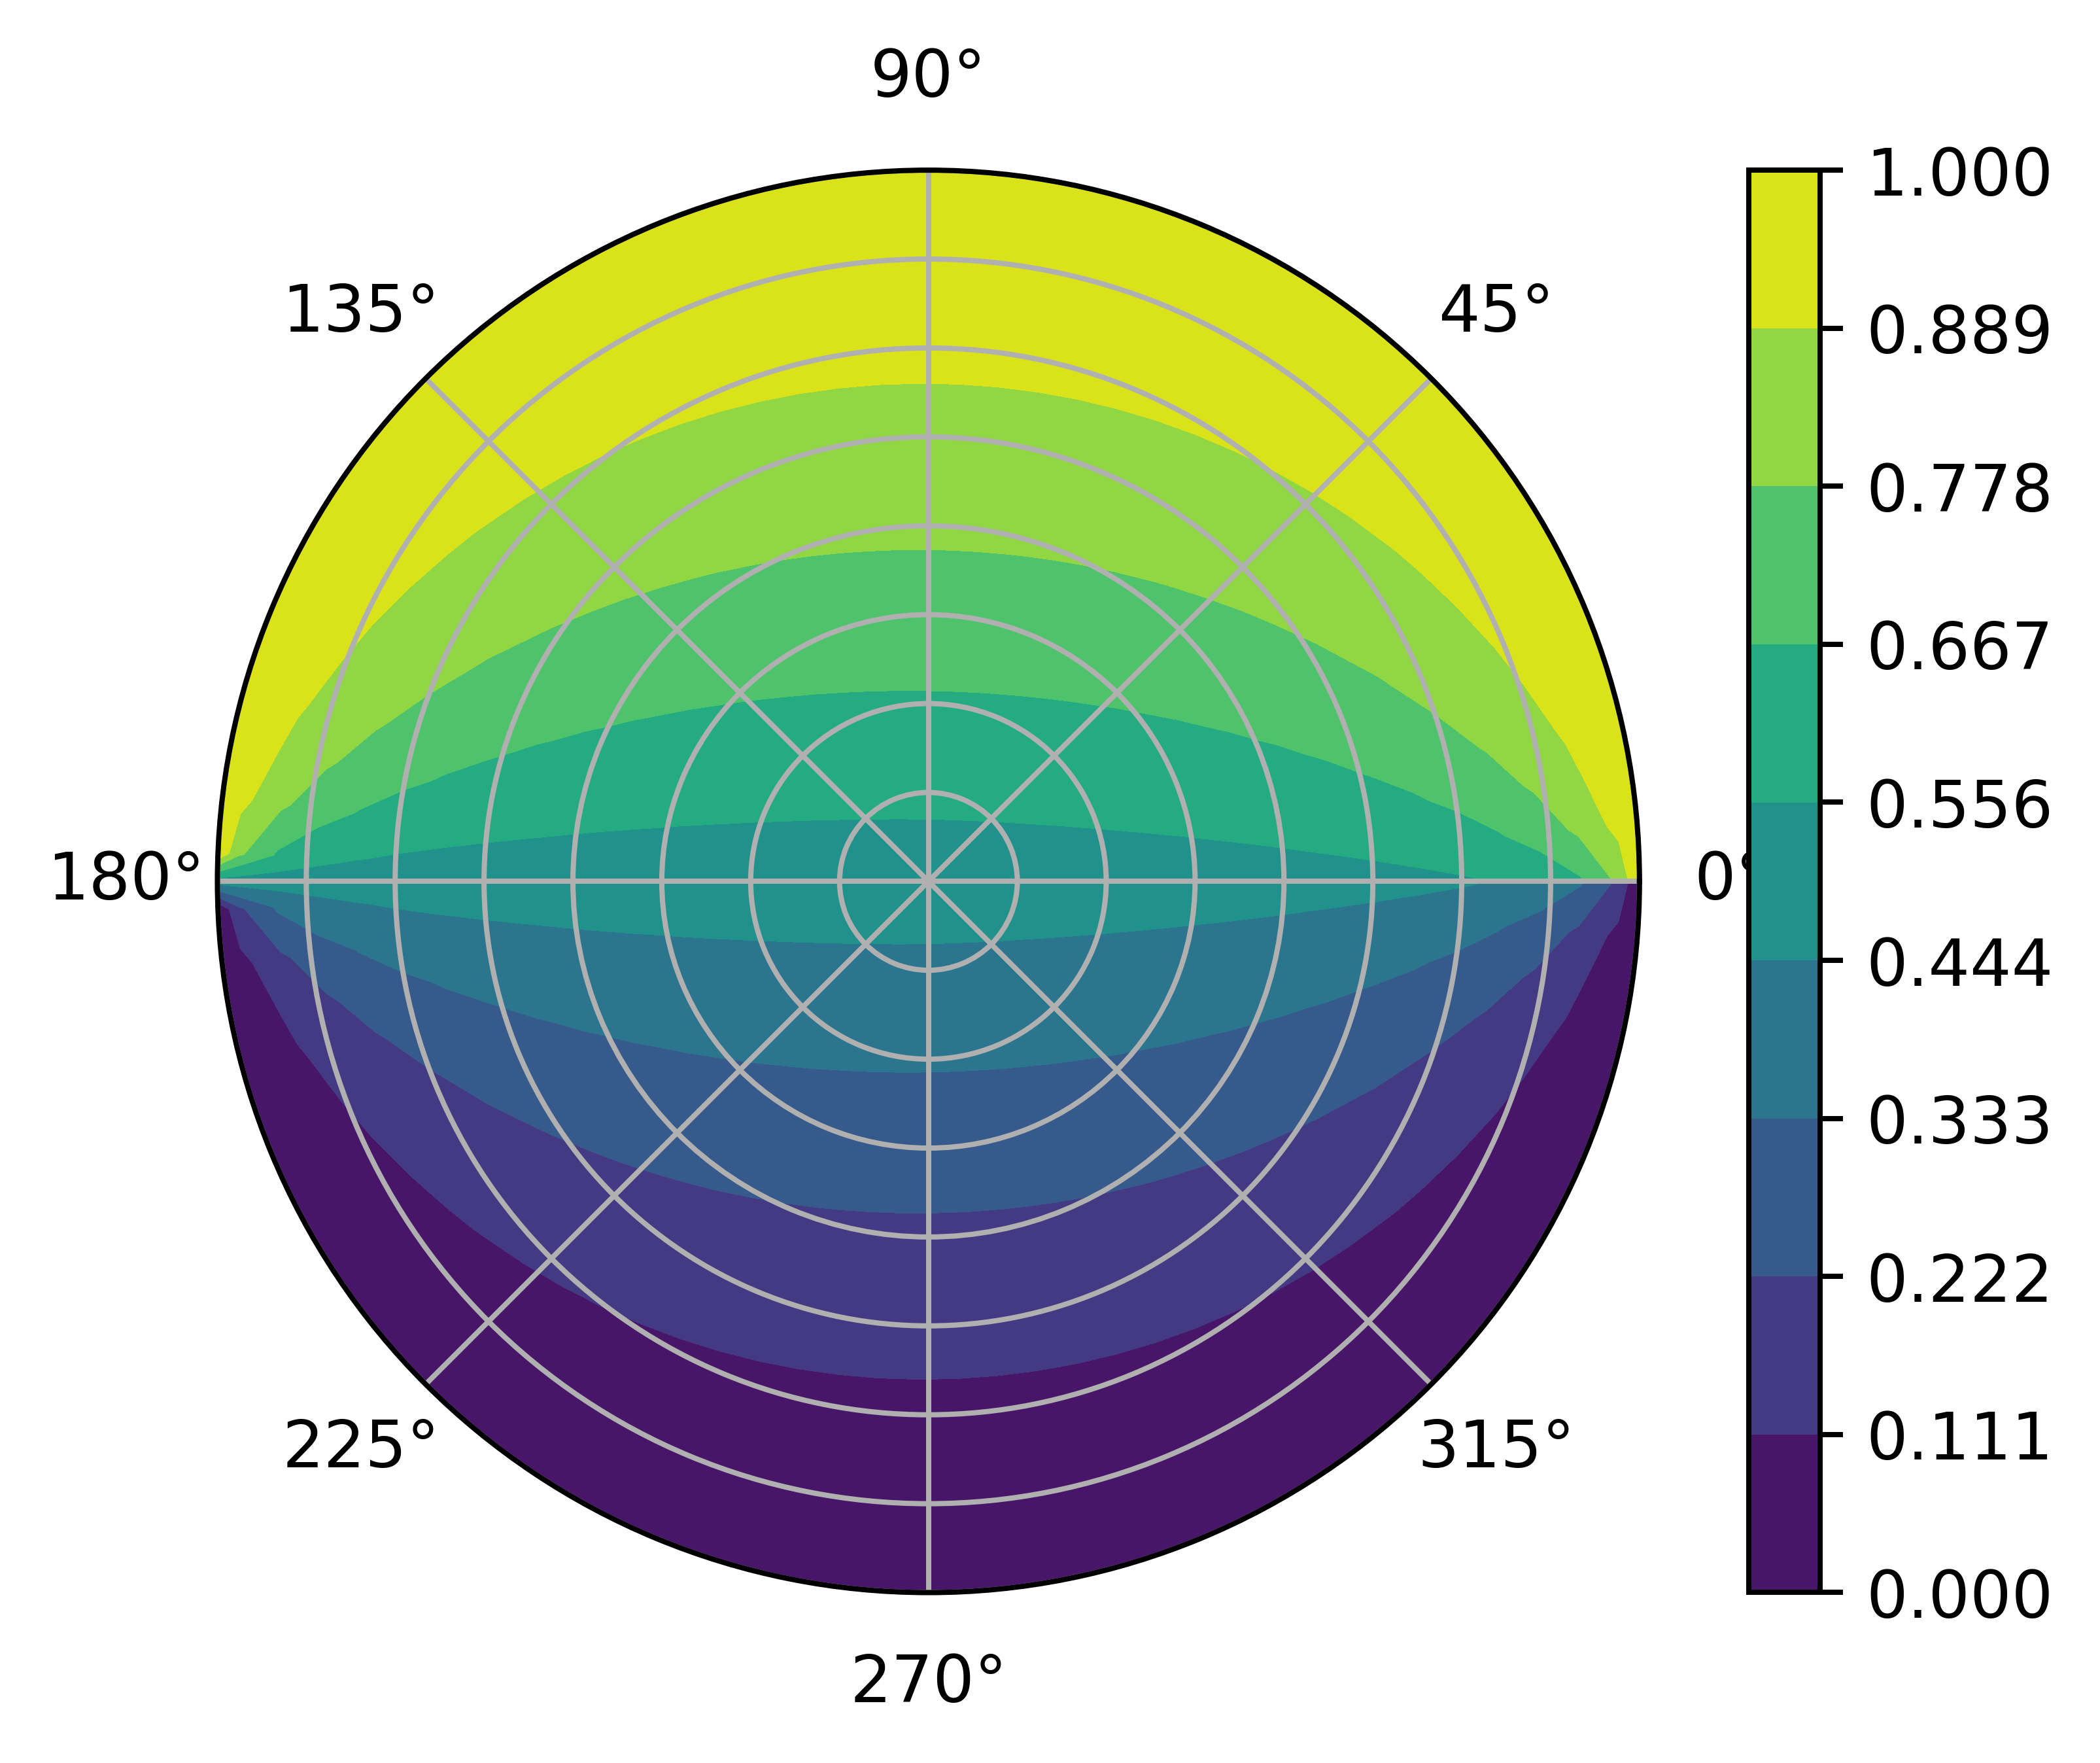

In [28]:
r, theta = np.meshgrid(r_points,np.radians(np.linspace(0, 360, 2*n_cv_theta)))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),dpi=720)
levels = np.linspace(min(T_upper,T_lower), max(T_upper,T_lower), 10)
cax=ax.contourf(theta,r, T,levels=levels)
ax.set_yticklabels([])
fig.colorbar(cax)
#ax.spines['polar'].set_visible(False)

In [ ]:
theta1=d_theta/2
anal= 0.5*(T_upper+T_lower) + (T_upper-T_lower)*sum((np.power(r_points,n))*(1-np.power(-1,n))*np.sin(n*(theta1))/(n*pow(r_max,n)*np.pi) for n in range(1,1000))
anal

TypeError: 'numpy.float64' object is not callable